## Capstone Project: NLP1 Group 4: Industrial safety. NLP based Chatbot

### Context:
The database comes from one of the biggest industry in Brazil and in the world. It is an urgent need for industries/companies around the
globe to understand why employees still suffer some injuries/accidents in plants. Sometimes they also die in such environment.

### Data Description:

This The database is basically records of accidents from 12 different plants in 03 different countries which every line in the data is an
occurrence of an accident.

Columns description:
- **Data**: timestamp or time/date information
- **Countries**: which country the accident occurred (anonymised)
- **Local**: the city where the manufacturing plant is located (anonymised)
- **Industry sector**: which sector the plant belongs to
- **Accident level**: from I to VI, it registers how severe was the accident (I means not severe but VI means very severe)
- **Potential Accident Level**: Depending on the Accident Level, the database also registers how severe the accident could have been (due to other factors
involved in the accident)
- **Genre**: if the person is male of female
- **Employee or Third Party**: if the injured person is an employee or a third party
- **Critical Risk**: some description of the risk involved in the accident
- **Description**: Detailed description of how the accident happened.

**Dataset** : https://www.kaggle.com/ihmstefanini/industrial-safety-and-health-analytics-database

In [ ]:
!pip install unidecode

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

pd.set_option('display.float_format', lambda x: '{:,.2f}'.format(x))
pd.set_option('display.max_columns', None)

sns.set(style="whitegrid", color_codes=True)

import warnings
warnings.filterwarnings('ignore')

import plotly.express as px

#from plotly.offline import iplot, plot
#import plotly.graph_objs as go
#import plotly.io as pio

from bs4 import BeautifulSoup

import re
import unidecode

# Helps to visualize the wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import Word2Vec, KeyedVectors

from nltk.tokenize import word_tokenize
import nltk


from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

import xgboost as xgb
from lightgbm import LGBMClassifier

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score, roc_auc_score

from sklearn.model_selection import GridSearchCV
from sklearn import svm
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

from gensim.models import Word2Vec

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Milestone 1

### Step 1: Import the Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Navigating to drive path where data source is
%cd '/content/drive/MyDrive/Colab Notebooks'

/content/drive/MyDrive/Colab Notebooks


In [ ]:
data=pd.read_csv('IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv')

In [ ]:
#viewing data
data.head()

Unnamed: 0                 Data   Countries     Local Industry Sector  \
0           0  2016-01-01 00:00:00  Country_01  Local_01          Mining   
1           1  2016-01-02 00:00:00  Country_02  Local_02          Mining   
2           2  2016-01-06 00:00:00  Country_01  Local_03          Mining   
3           3  2016-01-08 00:00:00  Country_01  Local_04          Mining   
4           4  2016-01-10 00:00:00  Country_01  Local_04          Mining   

  Accident Level Potential Accident Level Genre Employee or Third Party  \
0              I                       IV  Male             Third Party   
1              I                       IV  Male                Employee   
2              I                      III  Male    Third Party (Remote)   
3              I                        I  Male             Third Party   
4             IV                       IV  Male             Third Party   

         Critical Risk                                        Description  
0              Pressed  While removing the drill rod of the Jumbo 08 f...  
1  Pressurized Systems  During the activation of a sodium sulphide pum...  
2         Manual Tools  In the sub-station MILPO located at level +170...  
3               Others  Being 9:45 am. approximately in the Nv. 1880 C...  
4               Others  Approximately at 11:45 a.m. in circumstances t...

In [ ]:
#shape of data
data.shape

(425, 11)

In [ ]:
#lets check fields type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                425 non-null    int64 
 1   Data                      425 non-null    object
 2   Countries                 425 non-null    object
 3   Local                     425 non-null    object
 4   Industry Sector           425 non-null    object
 5   Accident Level            425 non-null    object
 6   Potential Accident Level  425 non-null    object
 7   Genre                     425 non-null    object
 8   Employee or Third Party   425 non-null    object
 9   Critical Risk             425 non-null    object
 10  Description               425 non-null    object
dtypes: int64(1), object(10)
memory usage: 36.6+ KB


In [ ]:
#checking is any data is null
data.isnull().sum()

Unnamed: 0                  0
Data                        0
Countries                   0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Genre                       0
Employee or Third Party     0
Critical Risk               0
Description                 0
dtype: int64

### Step 2: Data cleansing

In [ ]:
data.head(1)

Unnamed: 0                 Data   Countries     Local Industry Sector  \
0           0  2016-01-01 00:00:00  Country_01  Local_01          Mining   

  Accident Level Potential Accident Level Genre Employee or Third Party  \
0              I                       IV  Male             Third Party   

  Critical Risk                                        Description  
0       Pressed  While removing the drill rod of the Jumbo 08 f...

In [ ]:
# removing column Unnamed: 0
data.drop("Unnamed: 0", inplace=True, axis=1)

In [ ]:
#checking for duplicated data
data.duplicated().sum()

7

There are 7 duplicated data which we can drop

In [ ]:
#lets drop duplicated data
data.drop_duplicates(inplace=True)
data.reset_index(drop=True, inplace=True)

In [ ]:
data.shape

(418, 10)

**Important Data Summary**

- Need to remove first column unnamed
- Change column name to Date instead of Data
- Change column name to Gender instead of Genre
- Change column type to Date instead of Object
- We can rename column Employee or Third Party to Employees Type and Countries to Country
- Rest all columns of Object/categorical type
- No data is null
- removed 7 duplicated data
- We have 418 unique records

In [ ]:
data.head(1)

Data   Countries     Local Industry Sector Accident Level  \
0  2016-01-01 00:00:00  Country_01  Local_01          Mining              I   

  Potential Accident Level Genre Employee or Third Party Critical Risk  \
0                       IV  Male             Third Party       Pressed   

                                         Description  
0  While removing the drill rod of the Jumbo 08 f...

In [ ]:
#renaming column Data, Countries, Genre and Employee or Third Party
data.rename(columns={"Data":"Date",
                     "Countries":"Country",
                     "Genre":"Gender",
                     "Employee or Third Party":"Employee Type"
                     }, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date                      418 non-null    object
 1   Country                   418 non-null    object
 2   Local                     418 non-null    object
 3   Industry Sector           418 non-null    object
 4   Accident Level            418 non-null    object
 5   Potential Accident Level  418 non-null    object
 6   Gender                    418 non-null    object
 7   Employee Type             418 non-null    object
 8   Critical Risk             418 non-null    object
 9   Description               418 non-null    object
dtypes: object(10)
memory usage: 32.8+ KB


In [ ]:
data.columns

Index(['Date', 'Country', 'Local', 'Industry Sector', 'Accident Level',
       'Potential Accident Level', 'Gender', 'Employee Type', 'Critical Risk',
       'Description'],
      dtype='object')

In [ ]:
#lets check unique values for all columns

print('Unique values in each columns:')

for i in (['Date', 'Country', 'Local', 'Industry Sector', 'Accident Level',
       'Potential Accident Level', 'Gender', 'Employee Type', 'Critical Risk']):
  print('-'*100)
  print('Total Unique values in '+i+ " :"+ str(data[i].nunique()))
  print()
  print(data[i].unique())

Unique values in each columns:
----------------------------------------------------------------------------------------------------
Total Unique values in Date :287

['2016-01-01 00:00:00' '2016-01-02 00:00:00' '2016-01-06 00:00:00'
 '2016-01-08 00:00:00' '2016-01-10 00:00:00' '2016-01-12 00:00:00'
 '2016-01-16 00:00:00' '2016-01-17 00:00:00' '2016-01-19 00:00:00'
 '2016-01-26 00:00:00' '2016-01-28 00:00:00' '2016-01-30 00:00:00'
 '2016-02-01 00:00:00' '2016-02-02 00:00:00' '2016-02-04 00:00:00'
 '2016-02-06 00:00:00' '2016-02-07 00:00:00' '2016-02-08 00:00:00'
 '2016-02-21 00:00:00' '2016-02-25 00:00:00' '2016-02-09 00:00:00'
 '2016-02-10 00:00:00' '2016-02-15 00:00:00' '2016-02-14 00:00:00'
 '2016-02-13 00:00:00' '2016-02-16 00:00:00' '2016-02-17 00:00:00'
 '2016-02-19 00:00:00' '2016-02-20 00:00:00' '2016-02-18 00:00:00'
 '2016-02-22 00:00:00' '2016-02-24 00:00:00' '2016-02-29 00:00:00'
 '2016-02-26 00:00:00' '2016-02-27 00:00:00' '2016-03-02 00:00:00'
 '2016-03-03 00:00:00' '2016-0

In [ ]:
#lets check values distibution
print('Values distribution in each columns:')

for i in (['Country', 'Local', 'Industry Sector', 'Accident Level',
       'Potential Accident Level', 'Gender', 'Employee Type', 'Critical Risk']):
  print('-'*100)
  print('Value distribution for '+i+ " :")
  print()
  print(data[i].value_counts())
  print()
  print(data[i].value_counts(normalize=True))

Values distribution in each columns:
----------------------------------------------------------------------------------------------------
Value distribution for Country :

Country_01    248
Country_02    129
Country_03     41
Name: Country, dtype: int64

Country_01   0.59
Country_02   0.31
Country_03   0.10
Name: Country, dtype: float64
----------------------------------------------------------------------------------------------------
Value distribution for Local :

Local_03    89
Local_05    59
Local_01    56
Local_04    55
Local_06    46
Local_10    41
Local_08    27
Local_02    23
Local_07    14
Local_12     4
Local_09     2
Local_11     2
Name: Local, dtype: int64

Local_03   0.21
Local_05   0.14
Local_01   0.13
Local_04   0.13
Local_06   0.11
Local_10   0.10
Local_08   0.06
Local_02   0.06
Local_07   0.03
Local_12   0.01
Local_09   0.00
Local_11   0.00
Name: Local, dtype: float64
----------------------------------------------------------------------------------------------------


- Data is from 2016-01-01 to 2017-7-09, around 19 months of data
- Data is from three country, 60% data is from country 1m 30% from country 2
- Accidents are recorderd across 12 locality, local_9. local_11 and local_12 seems to have lowest accidents
- There are 3 industry sector, around 57% accident are from mining sector
- There are 5 types of accident and 6 types of potential accident. Most of accidents are of level II, III and IV around 80%
- Most of employees seems male, around 95%
- There are 3 categories of employees type. (Remote employees may not mean work from home)
- Most of critical risk are categorized as 'Others' around 55%, implying there could be too many types of risk categories or the data needs to be refined properly

In [ ]:
# lets convert Date column to date type and extract year, month, day, weekday, week_no

data['Date']= pd.to_datetime(data['Date'])

data['Year'] = data['Date'].apply(lambda x : x.year)
data['Month'] = data['Date'].apply(lambda x : x.month)
data['Day'] = data['Date'].apply(lambda x : x.day)
data['Weekday'] = data['Date'].apply(lambda x : x.day_name())
data['WeekofYear'] = data['Date'].apply(lambda x : x.weekofyear)

In [ ]:
data.head(1)

Date     Country     Local Industry Sector Accident Level  \
0 2016-01-01  Country_01  Local_01          Mining              I   

  Potential Accident Level Gender Employee Type Critical Risk  \
0                       IV   Male   Third Party       Pressed   

                                         Description  Year  Month  Day  \
0  While removing the drill rod of the Jumbo 08 f...  2016      1    1   

  Weekday  WeekofYear  
0  Friday          53

Lets create new feature Season to see if there is any connection of accidents and season

(source: https://www.acko.com/travel-tips/best-time-to-visit-brazil/)

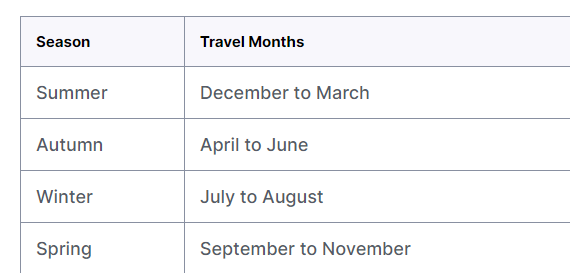

In [ ]:
month2seasons_lambda = lambda x: 'Spring' if x in [9, 10, 11] else ('Summer' if x in [12, 1, 2,3] else ('Autumn' if x in [4, 5, 6] else 'Winter'))

data['season']=data['Month'].apply(month2seasons_lambda)

In [ ]:
data.head(1)

Date     Country     Local Industry Sector Accident Level  \
0 2016-01-01  Country_01  Local_01          Mining              I   

  Potential Accident Level Gender Employee Type Critical Risk  \
0                       IV   Male   Third Party       Pressed   

                                         Description  Year  Month  Day  \
0  While removing the drill rod of the Jumbo 08 f...  2016      1    1   

  Weekday  WeekofYear  season  
0  Friday          53  Summer

Lets create one more feature of Holiday

In [ ]:
from holidays import country_holidays

In [ ]:
brazil_holidays = country_holidays('BR', years=[2016,2017])

holiday_list=[]

for date, holiday_name in brazil_holidays.items():
    print(f"{date}: {holiday_name}")
    holiday_list.append(date)

2016-01-01: Confraternização Universal
2016-03-25: Sexta-feira Santa
2016-04-21: Tiradentes
2016-05-01: Dia do Trabalhador
2016-09-07: Independência do Brasil
2016-10-12: Nossa Senhora Aparecida
2016-11-02: Finados
2016-11-15: Proclamação da República
2016-12-25: Natal
2017-01-01: Confraternização Universal
2017-04-14: Sexta-feira Santa
2017-04-21: Tiradentes
2017-05-01: Dia do Trabalhador
2017-09-07: Independência do Brasil
2017-10-12: Nossa Senhora Aparecida
2017-11-02: Finados
2017-11-15: Proclamação da República
2017-12-25: Natal


In [ ]:
data['is_holiday']=data['Date'].apply( lambda x: 1 if x in holiday_list else 0)

In [ ]:
data.head(2)

Date     Country     Local Industry Sector Accident Level  \
0 2016-01-01  Country_01  Local_01          Mining              I   
1 2016-01-02  Country_02  Local_02          Mining              I   

  Potential Accident Level Gender Employee Type        Critical Risk  \
0                       IV   Male   Third Party              Pressed   
1                       IV   Male      Employee  Pressurized Systems   

                                         Description  Year  Month  Day  \
0  While removing the drill rod of the Jumbo 08 f...  2016      1    1   
1  During the activation of a sodium sulphide pum...  2016      1    2   

    Weekday  WeekofYear  season  is_holiday  
0    Friday          53  Summer           1  
1  Saturday          53  Summer           0

In [ ]:
data['is_holiday'].value_counts()

0    414
1      4
Name: is_holiday, dtype: int64

In [ ]:
data[data['is_holiday']==1]['Date']

0     2016-01-01
68    2016-03-25
95    2016-04-21
105   2016-05-01
Name: Date, dtype: datetime64[ns]

It seems there are only 4 recors where accidents occured on holiday. So we can discard this new feature or add more dates of holidays

In [ ]:
data.head(1)

Date     Country     Local Industry Sector Accident Level  \
0 2016-01-01  Country_01  Local_01          Mining              I   

  Potential Accident Level Gender Employee Type Critical Risk  \
0                       IV   Male   Third Party       Pressed   

                                         Description  Year  Month  Day  \
0  While removing the drill rod of the Jumbo 08 f...  2016      1    1   

  Weekday  WeekofYear  season  is_holiday  
0  Friday          53  Summer           1

Lets Visualize the accident level for different features

In [ ]:
#Code to display plotly plot when exporting to HTML

#import plotly
#plotly.offline.init_notebook_mode(connected=True)

#!jupyter nbconvert  --to html capstone_step5_Tarang_Shah.ipynb

In [ ]:
# Calculate counts for each country
counts = data['Country'].value_counts().reset_index()
counts.columns = ['Country', 'Count']

# Create bar plot
fig = px.bar(counts, x='Country', y='Count', text='Count')

# Update layout
fig.update_layout(title='Accident per Country', xaxis_title='Country', yaxis_title='Count')

# Show plot
fig.show()

- Country 1 has highest accident count, could also meant that it has more industries

In [ ]:

# Calculate counts for each combination of Country and Accident Level
counts = data.groupby(['Country', 'Accident Level']).size().reset_index(name='Count')

# Create bar plot
fig = px.bar(counts, x='Country', y='Count', color='Accident Level',
             text='Count')

# Update layout
fig.update_layout(title='Accident per Country', xaxis_title='Country', yaxis_title='Count')

# Show plot
fig.show()

NameError: name 'data' is not defined

- Most of Accidents are of level I, followed by levle II and level III

In [ ]:
# Calculate counts for each country
counts = data['Local'].value_counts().reset_index()
counts.columns = ['Local', 'Count']

# Create bar plot
fig = px.bar(counts, x='Local', y='Count', text='Count')

# Update layout
fig.update_layout(title='Accident per Local', xaxis_title='Local', yaxis_title='Count')

# Show plot
fig.show()

- local 3 seems to have high number of accidents where as local 9,11 and 12 seems to have lowest no of accident

In [ ]:

counts = data['Industry Sector'].value_counts().reset_index()
counts.columns = ['Industry Sector', 'Count']

# Create bar plot
fig = px.bar(counts, x='Industry Sector', y='Count', text='Count')

# Update layout
fig.update_layout(title='Accident per Industry Sector', xaxis_title='Industry Sector', yaxis_title='Count')

# Show plot
fig.show()

In [ ]:
counts = data.groupby(['Industry Sector', 'Accident Level']).size().reset_index(name='Count')

# Create bar plot
fig = px.bar(counts, x='Industry Sector', y='Count', color='Accident Level',
             text='Count')

# Update layout
fig.update_layout(title='Accident per Industry Sector', xaxis_title='Industry Sector', yaxis_title='Count')

# Show plot
fig.show()

In [ ]:
counts = data['Accident Level'].value_counts().reset_index()
counts.columns = ['Accident Level', 'Count']

# Create bar plot
fig = px.bar(counts, x='Accident Level', y='Count', text='Count')

# Update layout
fig.update_layout(title='Accident per Accident Level', xaxis_title='Accident Level', yaxis_title='Count')

# Show plot
fig.show()

- As observer earlier, accident level I is most freqeuntly observed, could mean that more focus/governance is in place to ensure that severe level accident IV and V dont happen but less governance/focus is there for low level accident types.

In [ ]:
counts = data['Gender'].value_counts().reset_index()
counts.columns = ['Gender', 'Count']

# Create bar plot
fig = px.bar(counts, x='Gender', y='Count', text='Count')

# Update layout
fig.update_layout(title='Accident per Gender', xaxis_title='Gender', yaxis_title='Count')

# Show plot
fig.show()

- It seems males are employeed over task which has more potential to have accident as compared to female

In [ ]:
counts = data['Employee Type'].value_counts().reset_index()
counts.columns = ['Employee Type', 'Count']

# Create bar plot
fig = px.bar(counts, x='Employee Type', y='Count', text='Count')

# Update layout
fig.update_layout(title='Accident per Employee Type', xaxis_title='Employee Type', yaxis_title='Count')

# Show plot
fig.show()

In [ ]:
counts = data.groupby(['Employee Type', 'Accident Level']).size().reset_index(name='Count')

# Create bar plot
fig = px.bar(counts, x='Employee Type', y='Count', color='Accident Level',
             text='Count')

# Update layout
fig.update_layout(title='Accident per Employee Type', xaxis_title='Employee Type', yaxis_title='Count')

# Show plot
fig.show()

 - There seems to be no difference in count of employees and third party involved in accident, except for accident level V. However there aren't much accident of level V to make any conclusion. But it can be seen that only contractual staff are injured in accident level V

In [ ]:
counts = data['Critical Risk'].value_counts().reset_index()
counts.columns = ['Critical Risk', 'Count']

# Create bar plot
fig = px.bar(counts, x='Critical Risk', y='Count', text='Count')

# Update layout
fig.update_layout(title='Accident per Critical Risk', xaxis_title='Critical Risk', yaxis_title='Count')

# Show plot
fig.show()

In [ ]:
# Concatenate 'Year' and 'Month' columns into a single column
data['YearMonth'] = data['Year'].astype(str) + '-' + data['Month'].astype(str)

# Calculate counts for each combination of YearMonth
counts = data['YearMonth'].value_counts().reset_index()
counts.columns = ['YearMonth', 'Count']

# Create bar plot
fig = px.bar(counts, x='YearMonth', y='Count', text='Count')

# Update layout
fig.update_layout(title='Accident per Year-Month', xaxis_title='Year-Month', yaxis_title='Count',
                  xaxis=dict(tickmode='linear', dtick=1))  # Display all Year-Month combinations

# Show plot
fig.show()

- Data is inadequate to comment on any trend.
- For both year, it seems February has high number of accidents
- For 2016, we can say that no of accident in first 6 month seems to be more than last 6 months

In [ ]:
counts = data['Year'].value_counts().reset_index()
counts.columns = ['Year', 'Count']

# Create bar plot
fig = px.bar(counts, x='Year', y='Count', text='Count')

# Update layout
fig.update_layout(title='Accident per Year', xaxis_title='Year', yaxis_title='Count', xaxis=dict(tickmode='linear', dtick=1))

# Show plot
fig.show()

- No of accident seems to be more in 2016, but note that data for 2016 is of 12 month but for 2017 it is only of first 6 months

In [ ]:
counts = data['Day'].value_counts().reset_index()
counts.columns = ['Day', 'Count']

# Create bar plot
fig = px.bar(counts, x='Day', y='Count', text='Count')

# Update layout
fig.update_layout(title='Accident per Day', xaxis_title='Day', yaxis_title='Count', xaxis=dict(tickmode='linear', dtick=1))

# Show plot
fig.show()

 - It seems that on 4, 8, 11 , 16,22,23 and 24 of month no of accident seems to be high

In [ ]:
counts = data['Weekday'].value_counts().reset_index()
counts.columns = ['Weekday', 'Count']

# Define the desired order of weekdays
weekday_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Create bar plot
fig = px.bar(counts, x='Weekday', y='Count', text='Count')

# Update layout and specify category order for weekdays
fig.update_layout(title='Accident per Weekday', xaxis_title='Weekday', yaxis_title='Count',
                  xaxis=dict(categoryorder='array', categoryarray=weekday_order))

# Show plot
fig.show()

 - It seems that no of accident seems to be more on Tuesday and Thursday and relatively low on Sunday and Monday

In [ ]:
counts = data['season'].value_counts().reset_index()
counts.columns = ['season', 'Count']

# Create bar plot
fig = px.bar(counts, x='season', y='Count', text='Count')

# Update layout
fig.update_layout(title='Accident per season', xaxis_title='season', yaxis_title='Count')

# Show plot
fig.show()

- seems more no of accidents in summer and autumn, i.e, first half of year

Note: data for 2017 is for only first 6 month

In [ ]:
# Concatenate 'Year' and 'Season' columns into a single column
data['YearSeason'] = data['Year'].astype(str) + '-' + data['season']

# Calculate counts for each combination of YearSeason
counts = data['YearSeason'].value_counts().reset_index()
counts.columns = ['YearSeason', 'Count']

# Sort by Year
counts['Year'] = counts['YearSeason'].str.split('-').str[0].astype(int)
counts = counts.sort_values(by='Year')

# Create bar plot
fig = px.bar(counts, x='YearSeason', y='Count', text='Count')

# Update layout
fig.update_layout(title='Accident per Year-Season', xaxis_title='Year-Season', yaxis_title='Count')

# Show plot
fig.show()

- Spearating based on year and season, we can conclude that it seems that first 6 month of year seems to be having more accident compared to last 6 month
- we can see that accident seem to be decreasing from summer to winter and then increasing from winter to summer

In [ ]:
data.head(1)

Date     Country     Local Industry Sector Accident Level  \
0 2016-01-01  Country_01  Local_01          Mining              I   

  Potential Accident Level Gender Employee Type Critical Risk  \
0                       IV   Male   Third Party       Pressed   

                                         Description  Year  Month  Day  \
0  While removing the drill rod of the Jumbo 08 f...  2016      1    1   

  Weekday  WeekofYear  season  is_holiday YearMonth   YearSeason  
0  Friday          53  Summer           1    2016-1  2016-Summer

In [ ]:
#removing YearMonth and YearSeason

data.drop(columns=['YearMonth','YearSeason'], inplace=True, axis=1)

### Step 3: Data preprocessing (NLP Preprocessing techniques)

In [ ]:
data.head(1)

Date     Country     Local Industry Sector Accident Level  \
0 2016-01-01  Country_01  Local_01          Mining              I   

  Potential Accident Level Gender Employee Type Critical Risk  \
0                       IV   Male   Third Party       Pressed   

                                         Description  Year  Month  Day  \
0  While removing the drill rod of the Jumbo 08 f...  2016      1    1   

  Weekday  WeekofYear  season  is_holiday  
0  Friday          53  Summer           1

Lets check few samples

In [ ]:
import random
import textwrap

In [ ]:
for i in range(0,5):
  j=random.randint(0,data.shape[0])
  print('-'*50)
  print("Accident Level: ",data['Accident Level'][j])
  print('Description:')
  print(textwrap.fill(data['Description'][j], width=120))


--------------------------------------------------
Accident Level:  I
Description:
When the mechanical technician proceeded to perform the maintenance of motor supports of a tipper, he decided to bring a
wooden block, for which he moved to the temporary storage of materials - located at 10 m. of the tipper - in
circumstances in which he sought the cue; the camera of a tire burst suddenly (it was on the right and 2 m. of the
involved); the thunderous sound affected the right ear of the worker. The tire that exploded has 110 psi of pressure
approximately, at the time of the event they were stacked 3 pneumatic, the second was the one that exploded (presented
cut - place where the energy was released). The tire that was in the upper part was not projected. The tires were left
by the previous guard (night shift), the storage area does not have a roof. In the place of the event only the affected
mechanic was located (at 2m.) And at a distance of 70m. there were other workers. In the area 5 t

- It seems there are accented character

In [ ]:
word_length=data['Description'].apply(lambda x: len(x.split()))

print('Maximum words in description :', max(word_length))
print('Minimum words in description :', min(word_length))
print('Average words in description :', np.mean(word_length))

Maximum words in description : 183
Minimum words in description : 16
Average words in description : 65.06459330143541


In [ ]:
sentence_length=data['Description'].str.len()
print('Maximum sentence length in description :', max(sentence_length))
print('Minimum sentence length in description :', min(sentence_length))
print('Average sentence length in description :', np.mean(sentence_length))

Maximum sentence length in description : 1029
Minimum sentence length in description : 94
Average sentence length in description : 365.4138755980861


In [ ]:
data['Description'].str.len()

0      457
1      307
2      314
3      562
4      487
      ... 
413    220
414    219
415    251
416    187
417    208
Name: Description, Length: 418, dtype: int64

 Performing following preprocessing steps
  - removing accented characters
  - converting to lower case (can be covered during tokenization part)
  - removing punctuations
  - removing HTML characters
  - removing numbers as well

Please note- Deliberately **not removing stop words and lemmatizing** as we want to preserve the sequence for LSTM. Not doing spell check as we are working on a domain specifc data and there maybe jargon/specifc terms that might get affected using spell check

In [ ]:
#taking backup of dataframe
data1=data.copy()

In [ ]:
clean_description=[]

for i in range(0, data.shape[0]):

  #removing HTMl characters
  soup = BeautifulSoup(data['Description'][i], "html.parser")
  desc = soup.get_text()

  #removing anything besides a-zA-Z and single space
  desc=  re.sub('[^a-zA-Z\s]', '', desc)

  #lowering the text
  desc=desc.lower()

  #removing accented characters
  desc= ' '.join(unidecode.unidecode(word) for word in desc.split())

  #removing extra new lines
  desc = re.sub('[\r|\n|\r\n]+', ' ',desc)

  # remove extra whitespace
  desc = re.sub(' +', ' ', desc)

  clean_description.append(desc)

In [ ]:
len(clean_description)

418

In [ ]:
data['clean_description']=clean_description

In [ ]:
data.head(1)

Date     Country     Local Industry Sector Accident Level  \
0 2016-01-01  Country_01  Local_01          Mining              I   

  Potential Accident Level Gender Employee Type Critical Risk  \
0                       IV   Male   Third Party       Pressed   

                                         Description  Year  Month  Day  \
0  While removing the drill rod of the Jumbo 08 f...  2016      1    1   

  Weekday  WeekofYear  season  is_holiday  \
0  Friday          53  Summer           1   

                                   clean_description  
0  while removing the drill rod of the jumbo for ...

In [ ]:
#lets check 5 random samples again

for i in range(0,5):
  j=random.randint(0,data.shape[0])
  print('-'*50)
  print("Accident Level: ",data['Accident Level'][j])
  print('Description:')
  print(textwrap.fill(data['clean_description'][j], width=120))


--------------------------------------------------
Accident Level:  I
Description:
during the execution of the soil sampling task in the potions area around pm pablo was moving on the bite and was bitten
by a right elbow wasp over the sleeve uniform he was using at the time of the incident all the ppe needed for the
activity the employee was evaluated by the team who found it to be a mild injury with localized swelling the employee
reported that he did not feel any pain and that he could continue the activity
--------------------------------------------------
Accident Level:  I
Description:
at level access a the operator of the scissor performed the support of the crown at which time a piece of rock cmxcmxcm
g passes between the cocada of the support mesh from a height of meters towards the platform of the team breaking into
particles one of which reaches his right eye causing the injury
--------------------------------------------------
Accident Level:  I
Description:
being approximat

In [ ]:
#Lets check word and sentences length again after cleaning

word_length=data['clean_description'].apply(lambda x: len(x.split()))

print('Maximum words in description :', max(word_length))
print('Minimum words in description :', min(word_length))
print('Average words in description :', np.mean(word_length))


sentence_length=data['clean_description'].str.len()
print('Maximum sentence length in description :', max(sentence_length))
print('Minimum sentence length in description :', min(sentence_length))
print('Average sentence length in description :', np.mean(sentence_length))

Maximum words in description : 180
Minimum words in description : 16
Average words in description : 63.23205741626794
Maximum sentence length in description : 998
Minimum sentence length in description : 92
Average sentence length in description : 350.39234449760767


There isn't much diffrence in word and sentence length after cleaning

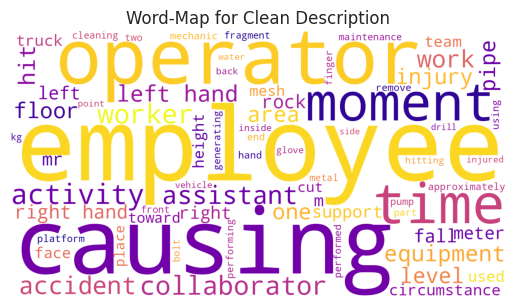

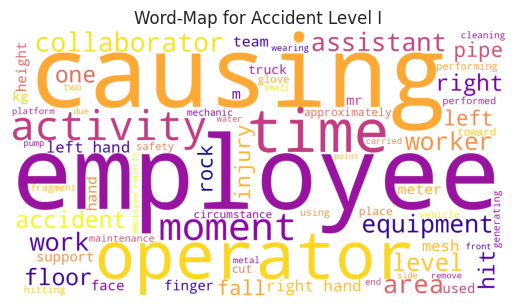

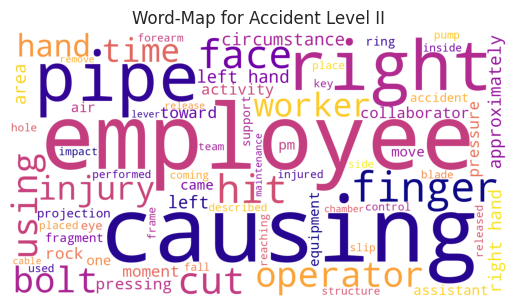

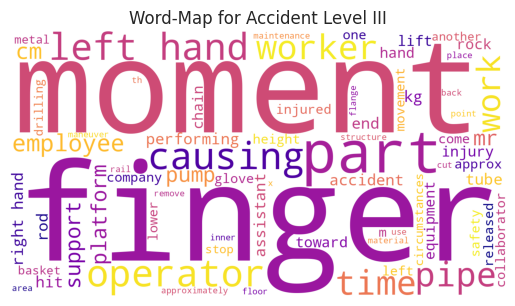

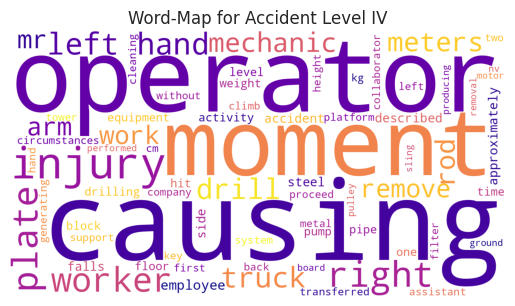

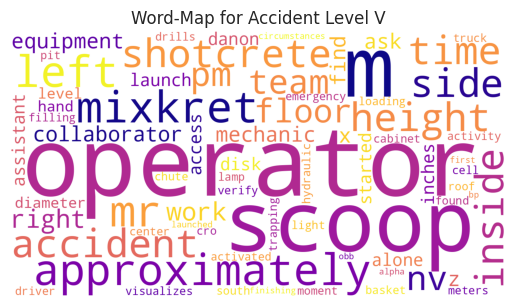

In [ ]:
#lets check word cloud for different accident levels
plt.imshow(
    WordCloud(max_words = 70,
              stopwords=STOPWORDS,
              width=1500,
              height=800,
              background_color = 'white',
              colormap='plasma',
               min_font_size=10,
              ).generate(" ".join(data['clean_description']))
    )
plt.title('Word-Map for Clean Description')
plt.axis('off')
plt.show()


plt.imshow(
    WordCloud(max_words = 70,
              stopwords=STOPWORDS,
              width=1500,
              height=800,
              background_color = 'white',
              colormap='plasma',
               min_font_size=10,
              ).generate(" ".join(data[data['Accident Level'] == 'I']['clean_description']))
    )
plt.title('Word-Map for Accident Level I')
plt.axis('off')
plt.show()

plt.imshow(
    WordCloud(max_words = 70,
              stopwords=STOPWORDS,
              width=1500,
              height=800,
              background_color = 'white',
              colormap='plasma',
               min_font_size=10,
              ).generate(" ".join(data[data['Accident Level'] == 'II']['clean_description']))
    )
plt.title('Word-Map for Accident Level II')
plt.axis('off')
plt.show()

plt.imshow(
    WordCloud(max_words = 70,
              stopwords=STOPWORDS,
              width=1500,
              height=800,
              background_color = 'white',
              colormap='plasma',
               min_font_size=10,
              ).generate(" ".join(data[data['Accident Level'] == 'III']['clean_description']))
    )
plt.title('Word-Map for Accident Level III')
plt.axis('off')
plt.show()

plt.imshow(
    WordCloud(max_words = 70,
              stopwords=STOPWORDS,
              width=1500,
              height=800,
              background_color = 'white',
              colormap='plasma',
               min_font_size=10,
              ).generate(" ".join(data[data['Accident Level'] == 'IV']['clean_description']))
    )
plt.title('Word-Map for Accident Level IV')
plt.axis('off')
plt.show()

plt.imshow(
    WordCloud(max_words = 70,
              stopwords=STOPWORDS,
              width=1500,
              height=800,
              background_color = 'white',
              colormap='plasma',
               min_font_size=10,
              ).generate(" ".join(data[data['Accident Level'] == 'V']['clean_description']))
    )
plt.title('Word-Map for Accident Level V')
plt.axis('off')
plt.show()

- Wordmap of all accidents and that of level 1 accident seems similar since there are high number of level I accident
- Most common words across all accident description seems to be : operator, employee, left hand, floor, causing, injury, worker, drill, rod

In [ ]:
#removing date field as we have extracted month, year and day

data.drop(columns='Date', axis=1, inplace=True)

In [ ]:
#removing description field as we have clean_description

data.drop(columns='Description', axis=1, inplace=True)

In [ ]:
data.head(1)

Country     Local Industry Sector Accident Level  \
0  Country_01  Local_01          Mining              I   

  Potential Accident Level Gender Employee Type Critical Risk  Year  Month  \
0                       IV   Male   Third Party       Pressed  2016      1   

   Day Weekday  WeekofYear  season  is_holiday  \
0    1  Friday          53  Summer           1   

                                   clean_description  
0  while removing the drill rod of the jumbo for ...

### Step 4: Data preparation - Cleansed data in .xlsx or .csv file

In [ ]:
data.shape

(418, 16)

In [ ]:
#lets save the clean data

data.to_csv('cleaned_IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv',
            index=False)

### Step 5: Design train and test basic machine learning classifiers

In [ ]:
#lets read the clean data from CSV
cleaned_data=pd.read_csv('cleaned_IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv')

In [ ]:
#lets validate shape
cleaned_data.shape

(418, 16)

In [ ]:
cleaned_data.head(1)

Country     Local Industry Sector Accident Level  \
0  Country_01  Local_01          Mining              I   

  Potential Accident Level Gender Employee Type Critical Risk  Year  Month  \
0                       IV   Male   Third Party       Pressed  2016      1   

   Day Weekday  WeekofYear  season  is_holiday  \
0    1  Friday          53  Summer           1   

                                   clean_description  
0  while removing the drill rod of the jumbo for ...

 We need to convert categorical data to numerical data for using in model

In [ ]:
#converting Accident Level and Potential Accident Level to Labels
basic_model_data=pd.DataFrame()

label_encoder=LabelEncoder()

basic_model_data['Accident Level']=label_encoder.fit_transform(cleaned_data['Accident Level'])
basic_model_data['Potential Accident Level']=label_encoder.fit_transform(cleaned_data['Potential Accident Level'])


In [ ]:
cleaned_data.columns

Index(['Country', 'Local', 'Industry Sector', 'Accident Level',
       'Potential Accident Level', 'Gender', 'Employee Type', 'Critical Risk',
       'Year', 'Month', 'Day', 'Weekday', 'WeekofYear', 'season', 'is_holiday',
       'clean_description'],
      dtype='object')

In [ ]:
#creating dummy variables for rest of category
dummy_cols= pd.get_dummies(cleaned_data[['Country','Local','Industry Sector', 'Gender', 'Employee Type', 'Critical Risk'
,'Weekday','season']], drop_first=True)

dummy_cols.shape

(418, 59)

In [ ]:
dummy_cols.head(1)

Country_Country_02  Country_Country_03  Local_Local_02  Local_Local_03  \
0                   0                   0               0               0   

   Local_Local_04  Local_Local_05  Local_Local_06  Local_Local_07  \
0               0               0               0               0   

   Local_Local_08  Local_Local_09  Local_Local_10  Local_Local_11  \
0               0               0               0               0   

   Local_Local_12  Industry Sector_Mining  Industry Sector_Others  \
0               0                       1                       0   

   Gender_Male  Employee Type_Third Party  Employee Type_Third Party (Remote)  \
0            1                          1                                   0   

   Critical Risk_Bees  Critical Risk_Blocking and isolation of energies  \
0                   0                                                 0   

   Critical Risk_Burn  Critical Risk_Chemical substances  \
0                   0                                  0   

   Critical Risk_Confined space  Critical Risk_Cut  \
0                             0                  0   

   Critical Risk_Electrical Shock  Critical Risk_Electrical installation  \
0                               0                                      0   

   Critical Risk_Fall  Critical Risk_Fall prevention  \
0                   0                              0   

   Critical Risk_Fall prevention (same level)  \
0                                           0   

   Critical Risk_Individual protection equipment  Critical Risk_Liquid Metal  \
0                                              0                           0   

   Critical Risk_Machine Protection  Critical Risk_Manual Tools  \
0                                 0                           0   

   Critical Risk_Others  Critical Risk_Plates  Critical Risk_Poll  \
0                     0                     0                   0   

   Critical Risk_Power lock  Critical Risk_Pressed  \
0                         0                      1   

   Critical Risk_Pressurized Systems  \
0                                  0   

   Critical Risk_Pressurized Systems / Chemical Substances  \
0                                                  0         

   Critical Risk_Projection  Critical Risk_Projection of fragments  \
0                         0                                      0   

   Critical Risk_Projection/Burning  Critical Risk_Projection/Choco  \
0                                 0                               0   

   Critical Risk_Projection/Manual Tools  Critical Risk_Suspended Loads  \
0                                      0                              0   

   Critical Risk_Traffic  Critical Risk_Vehicles and Mobile Equipment  \
0                      0                                            0   

   Critical Risk_Venomous Animals  Critical Risk_remains of choco  \
0                               0                               0   

   Weekday_Monday  Weekday_Saturday  Weekday_Sunday  Weekday_Thursday  \
0               0                 0               0                 0   

   Weekday_Tuesday  Weekday_Wednesday  season_Spring  season_Summer  \
0                0                  0              0              1   

   season_Winter  
0              0

In [ ]:
basic_model_data=pd.concat([basic_model_data, cleaned_data[['Year', 'Month', 'Day','WeekofYear', 'is_holiday']], dummy_cols ], axis=1)

In [ ]:
basic_model_data.shape

(418, 66)

Download Glove model

In [ ]:
!wget https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip

--2024-03-03 06:51:41--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.2’

glove.6B.zip.2      100%[===================>] 822.24M  5.02MB/s    in 2m 39s  

2024-03-03 06:54:20 (5.18 MB/s) - ‘glove.6B.zip.2’ saved [862182613/862182613]



In [ ]:
!unzip -o glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [ ]:
embeddings_index = {}
EMBEDDING_FILE = 'glove.6B.200d.txt'
f = open(EMBEDDING_FILE)
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [ ]:
# Function to create a normalized vector for whole sentence
def sent2vec(s):
    words = word_tokenize(s)
    N = []
    for w in words:
        try:
            N.append(embeddings_index[w])
        except:
            continue
    N = np.array(N)
    v = N.sum(axis=0)
    if type(v) != np.ndarray:
        return np.zeros(200)
    return v

In [ ]:
# Create sentence vectors using the above function for training and validation set
description_glove = [sent2vec(x) for x in cleaned_data['clean_description']]

In [ ]:
len(description_glove)

418

In [ ]:
basic_model_data=pd.concat([basic_model_data, pd.DataFrame(description_glove)], axis=1)

In [ ]:
basic_model_data.columns = basic_model_data.columns.astype(str)

In [ ]:
basic_model_data.head(1)

Accident Level  Potential Accident Level  Year  Month  Day  WeekofYear  \
0               0                         3  2016      1    1          53   

   is_holiday  Country_Country_02  Country_Country_03  Local_Local_02  \
0           1                   0                   0               0   

   Local_Local_03  Local_Local_04  Local_Local_05  Local_Local_06  \
0               0               0               0               0   

   Local_Local_07  Local_Local_08  Local_Local_09  Local_Local_10  \
0               0               0               0               0   

   Local_Local_11  Local_Local_12  Industry Sector_Mining  \
0               0               0                       1   

   Industry Sector_Others  Gender_Male  Employee Type_Third Party  \
0                       0            1                          1   

   Employee Type_Third Party (Remote)  Critical Risk_Bees  \
0                                   0                   0   

   Critical Risk_Blocking and isolation of energies  Critical Risk_Burn  \
0                                                 0                   0   

   Critical Risk_Chemical substances  Critical Risk_Confined space  \
0                                  0                             0   

   Critical Risk_Cut  Critical Risk_Electrical Shock  \
0                  0                               0   

   Critical Risk_Electrical installation  Critical Risk_Fall  \
0                                      0                   0   

   Critical Risk_Fall prevention  Critical Risk_Fall prevention (same level)  \
0                              0                                           0   

   Critical Risk_Individual protection equipment  Critical Risk_Liquid Metal  \
0                                              0                           0   

   Critical Risk_Machine Protection  Critical Risk_Manual Tools  \
0                                 0                           0   

   Critical Risk_Others  Critical Risk_Plates  Critical Risk_Poll  \
0                     0                     0                   0   

   Critical Risk_Power lock  Critical Risk_Pressed  \
0                         0                      1   

   Critical Risk_Pressurized Systems  \
0                                  0   

   Critical Risk_Pressurized Systems / Chemical Substances  \
0                                                  0         

   Critical Risk_Projection  Critical Risk_Projection of fragments  \
0                         0                                      0   

   Critical Risk_Projection/Burning  Critical Risk_Projection/Choco  \
0                                 0                               0   

   Critical Risk_Projection/Manual Tools  Critical Risk_Suspended Loads  \
0                                      0                              0   

   Critical Risk_Traffic  Critical Risk_Vehicles and Mobile Equipment  \
0                      0                                            0   

   Critical Risk_Venomous Animals  Critical Risk_remains of choco  \
0                               0                               0   

   Weekday_Monday  Weekday_Saturday  Weekday_Sunday  Weekday_Thursday  \
0               0                 0               0                 0   

   Weekday_Tuesday  Weekday_Wednesday  season_Spring  season_Summer  \
0                0                  0              0              1   

   season_Winter    0     1     2      3    4     5      6     7     8    9  \
0              0 2.67 19.93 -0.02 -11.31 4.04 18.14 -20.14 -6.10 -8.21 4.63   

    10    11    12   13    14    15   16   17    18    19    20     21   22  \
0 3.11 15.66 10.79 6.70 26.09 -4.53 1.19 9.09 -2.72 -3.46 12.15 190.84 9.77   

     23   24   25     26   27    28   29   30     31    32   33    34    35  \
0 -0.78 7.47 6.58 -11.65 6.54 -0.95 0.20 7.98 -12.03 -0.97 0.98 -2.10 -9.37   

      36     37     38    39   40     41   42    43    44    45    46   47  \
0 -41.08 -20.13 -11.45 -5.3

In [ ]:
basic_model_data.shape

(418, 266)

In [ ]:
X=basic_model_data.drop(columns=['Accident Level','Potential Accident Level'])
y=basic_model_data[['Accident Level']]

In [ ]:
X.shape, y.shape

((418, 264), (418, 1))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, stratify = y)

In [ ]:
X_train.shape, y_train.shape

((334, 264), (334, 1))

In [ ]:
X_test.shape, y_test.shape

((84, 264), (84, 1))

In [ ]:
y_train.value_counts()

Accident Level
0                 247
1                  32
2                  25
3                  24
4                   6
dtype: int64

In [ ]:
y_train.value_counts(normalize=True)

Accident Level
0                0.74
1                0.10
2                0.07
3                0.07
4                0.02
dtype: float64

In [ ]:
y_test.value_counts(normalize=True)

Accident Level
0                0.74
1                0.10
2                0.07
3                0.07
4                0.02
dtype: float64

Normalizing the data

In [ ]:
ss = StandardScaler()

X_train_std= ss.fit_transform(X_train)

X_test_std = ss.transform(X_test)

In [ ]:
X_train_std=pd.DataFrame(X_train_std, columns= X_train.columns)
X_test_std=pd.DataFrame(X_test_std, columns= X_test.columns)

In [ ]:
X_train_std

Year  Month   Day  WeekofYear  is_holiday  Country_Country_02  \
0   -0.68   0.23 -0.61        0.14       -0.10                1.52   
1   -0.68   0.85 -1.65        0.72       -0.10               -0.66   
2   -0.68   0.85 -1.54        0.72       -0.10               -0.66   
3   -0.68   1.79  1.46        1.93       -0.10               -0.66   
4   -0.68  -0.09  1.11        0.00       -0.10               -0.66   
..    ...    ...   ...         ...         ...                 ...   
329 -0.68   0.54 -0.61        0.43       -0.10               -0.66   
330 -0.68  -1.02 -0.73       -1.07       -0.10               -0.66   
331 -0.68  -0.71  0.08       -0.71       -0.10               -0.66   
332 -0.68   2.11 -0.61        2.00       -0.10               -0.66   
333 -0.68   0.85 -0.04        0.86       -0.10               -0.66   

     Country_Country_03  Local_Local_02  Local_Local_03  Local_Local_04  \
0                 -0.33           -0.24           -0.53           -0.37   
1                 -0.33           -0.24           -0.53            2.67   
2                  3.02           -0.24           -0.53           -0.37   
3                 -0.33           -0.24            1.87           -0.37   
4                 -0.33           -0.24           -0.53            2.67   
..                  ...             ...             ...             ...   
329               -0.33           -0.24           -0.53            2.67   
330               -0.33           -0.24            1.87           -0.37   
331               -0.33           -0.24           -0.53            2.67   
332               -0.33           -0.24           -0.53            2.67   
333               -0.33           -0.24           -0.53           -0.37   

     Local_Local_05  Local_Local_06  Local_Local_07  Local_Local_08  \
0              2.50           -0.36           -0.18           -0.26   
1             -0.40           -0.36           -0.18           -0.26   
2             -0.40           -0.36           -0.18           -0.26   
3             -0.40           -0.36           -0.18           -0.26   
4             -0.40           -0.36           -0.18           -0.26   
..              ...             ...             ...             ...   
329           -0.40           -0.36           -0.18           -0.26   
330           -0.40           -0.36           -0.18           -0.26   
331           -0.40           -0.36           -0.18           -0.26   
332           -0.40           -0.36           -0.18           -0.26   
333           -0.40           -0.36           -0.18           -0.26   

     Local_Local_09  Local_Local_10  Local_Local_11  Local_Local_12  \
0             -0.08           -0.33           -0.05           -0.11   
1             -0.08           -0.33           -0.05           -0.11   
2             -0.08            3.02           -0.05           -0.11   
3             -0.08           -0.33           -0.05           -0.11   
4             -0.08           -0.33           -0.05           -0.11   
..              ...             ...             ...             ...   
329           -0.08           -0.33           -0.05           -0.11   
330           -0.08           -0.33           -0.05           -0.11   
331           -0.08           -0.33           -0.05           -0.11   
332           -0.08           -0.33           -0.05           -0.11   
333           -0.08           -0.33           -0.05           -0.11   

     Industry Sector_Mining  Industry Sector_Others  Gender_Male  \
0                     -1.14                   -0.36         0.24   
1                      0.88                   -0.36         0.24   
2                     -1.14                    2.79         0.24   
3                      0.88                   -0.36         0.24   
4                      0.88                   -0.36         0.24   
..                      ...                     ...          ...   
329                    0.88                   -0.36         0.24   
330          

In [ ]:
X_test_std

Year  Month   Day  WeekofYear  is_holiday  Country_Country_02  \
0  -0.68  -0.09  1.23        0.00       -0.10               -0.66   
1   1.48  -1.02 -0.15       -1.00       -0.10               -0.66   
2  -0.68   1.79  1.11        1.86       -0.10                1.52   
3  -0.68   1.79  0.65        1.86       -0.10               -0.66   
4  -0.68   1.17  0.54        1.22       -0.10                1.52   
..   ...    ...   ...         ...         ...                 ...   
79  1.48  -1.34 -1.07       -1.43       -0.10                1.52   
80  1.48  -1.02 -0.84       -1.07       -0.10               -0.66   
81 -0.68   1.79  0.88        1.86       -0.10               -0.66   
82 -0.68   0.54 -0.84        0.43       -0.10               -0.66   
83 -0.68  -0.71  0.42       -0.71       -0.10               -0.66   

    Country_Country_03  Local_Local_02  Local_Local_03  Local_Local_04  \
0                 3.02           -0.24           -0.53           -0.37   
1                -0.33           -0.24            1.87           -0.37   
2                -0.33           -0.24           -0.53           -0.37   
3                 3.02           -0.24           -0.53           -0.37   
4                -0.33           -0.24           -0.53           -0.37   
..                 ...             ...             ...             ...   
79               -0.33           -0.24           -0.53           -0.37   
80               -0.33           -0.24            1.87           -0.37   
81               -0.33           -0.24           -0.53            2.67   
82               -0.33           -0.24           -0.53           -0.37   
83               -0.33           -0.24           -0.53           -0.37   

    Local_Local_05  Local_Local_06  Local_Local_07  Local_Local_08  \
0            -0.40           -0.36           -0.18           -0.26   
1            -0.40           -0.36           -0.18           -0.26   
2            -0.40           -0.36            5.69           -0.26   
3            -0.40           -0.36           -0.18           -0.26   
4             2.50           -0.36           -0.18           -0.26   
..             ...             ...             ...             ...   
79           -0.40           -0.36           -0.18            3.86   
80           -0.40           -0.36           -0.18           -0.26   
81           -0.40           -0.36           -0.18           -0.26   
82           -0.40           -0.36           -0.18           -0.26   
83           -0.40           -0.36           -0.18           -0.26   

    Local_Local_09  Local_Local_10  Local_Local_11  Local_Local_12  \
0            -0.08            3.02           -0.05           -0.11   
1            -0.08           -0.33           -0.05           -0.11   
2            -0.08           -0.33           -0.05           -0.11   
3            -0.08            3.02           -0.05           -0.11   
4            -0.08           -0.33           -0.05           -0.11   
..             ...             ...             ...             ...   
79           -0.08           -0.33           -0.05           -0.11   
80           -0.08           -0.33           -0.05           -0.11   
81           -0.08           -0.33           -0.05           -0.11   
82           -0.08           -0.33           -0.05           -0.11   
83           -0.08           -0.33           -0.05           -0.11   

    Industry Sector_Mining  Industry Sector_Others  Gender_Male  \
0                    -1.14                    2.79         0.24   
1                     0.88                   -0.36         0.24   
2                     0.88                   -0.36         0.24   
3                    -1.14                    2.79         0.24   
4                    -1.14                   -0.36         0.24   
..                     ...                     ...          ...   
79                   -1.14                   -0.36         0.24   
80                    0.88                   -0.36         0.24   
8

In [ ]:
def function_model(model_name,model, x_train, y_train, x_test, y_test):
  print('Model: ', model_name)

  model.fit(x_train, y_train)
  y_pred=model.predict(x_test)

  train_accuracy_score= model.score(x_train, y_train)
  test_accuracy_score= model.score(x_test, y_test)

  print('Train Accuracy score: ', train_accuracy_score)
  print('Test Accuracy score: ', test_accuracy_score)

  cm=metrics.confusion_matrix(y_test, y_pred)
  cm=pd.DataFrame(cm)
  sns.heatmap(cm.T, annot=True, fmt='g', cbar=False);
  plt.title('Test Confusion Matrix')
  plt.xlabel('Actual')
  plt.ylabel('Predicted')
  plt.show()

  print('Classification report')
  print(classification_report(y_test, y_pred))

  precision=precision_score(y_test, y_pred, average='weighted')
  recall=recall_score(y_test, y_pred, average='weighted')
  f1=f1_score(y_test, y_pred, average='weighted')

  result=pd.DataFrame({ 'Model' : [model_name],
                 'Train Accuracy' : train_accuracy_score,
                 'Test Accuracy': test_accuracy_score,
                 'Precision': precision,
                 'recall' : recall,
                 'f1 score':f1
                })

  return result

In [ ]:
#creating a Dataframe to keep track of metrics of all Models
all_model_summary=  pd.DataFrame()

### Trying Basic ML Model on original data

Model 1 Logistic regression Model

In [ ]:
logreg = LogisticRegression()


param_grid = {
    'C': [.01,0.1, 1.0],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [100, 200, 300],
    'random_state': [42],
    'multi_class': ['multinomial']
}

# Perform grid search
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train_std, y_train)

# Get the best hyperparameter values and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test data
accuracy = best_model.score(X_test_std, y_test)

# Print the best hyperparameters and accuracy
print("Best Hyperparameters:", best_params)
print("Best Accuracy:", accuracy)

Best Hyperparameters: {'C': 0.01, 'max_iter': 100, 'multi_class': 'multinomial', 'random_state': 42, 'solver': 'lbfgs'}
Best Accuracy: 0.75


Model:  Logistic Regression
Train Accuracy score:  0.7934131736526946
Test Accuracy score:  0.75


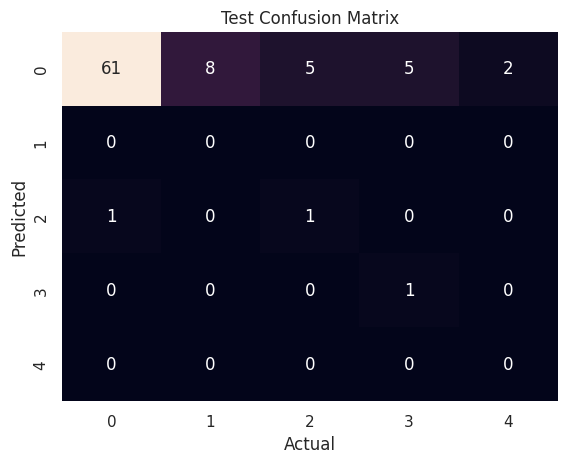

Classification report
              precision    recall  f1-score   support

           0       0.75      0.98      0.85        62
           1       0.00      0.00      0.00         8
           2       0.50      0.17      0.25         6
           3       1.00      0.17      0.29         6
           4       0.00      0.00      0.00         2

    accuracy                           0.75        84
   macro avg       0.45      0.26      0.28        84
weighted avg       0.66      0.75      0.67        84



In [ ]:
lr= LogisticRegression(C=.01,solver='lbfgs', multi_class='multinomial', random_state = 42)

lr_result=function_model("Logistic Regression",lr, X_train_std, y_train, X_test_std, y_test)

In [ ]:
all_model_summary=all_model_summary.append(lr_result)
all_model_summary

Model  Train Accuracy  Test Accuracy  Precision  recall  \
0  Logistic Regression            0.79           0.75       0.66    0.75   

   f1 score  
0      0.67

Model 2 KNN classifier

In [ ]:
#lets find best param for KNN
knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7,9,11,13,15,7,19],
    'weights': ['uniform', 'distance'],
    'p': [1, 2,3,4],
    'metric': ['minkowski','euclidean', 'manhattan']
}

# Perform grid search
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train_std, y_train)

# Get the best hyperparameter values and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test data
accuracy = best_model.score(X_test_std, y_test)

# Print the best hyperparameters and accuracy
print("Best Hyperparameters:", best_params)
print("Best Accuracy:", accuracy)

Best Hyperparameters: {'metric': 'minkowski', 'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}
Best Accuracy: 0.75


Model:  K Nearest Neighbour
Train Accuracy score:  0.7425149700598802
Test Accuracy score:  0.75


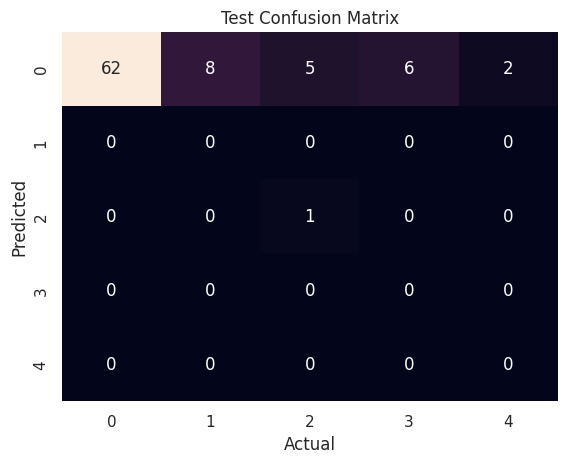

Classification report
              precision    recall  f1-score   support

           0       0.75      1.00      0.86        62
           1       0.00      0.00      0.00         8
           2       1.00      0.17      0.29         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.75        84
   macro avg       0.35      0.23      0.23        84
weighted avg       0.62      0.75      0.65        84



In [ ]:
knn=KNeighborsClassifier(n_neighbors=9, metric='minkowski', p=1, weights='uniform', n_jobs=-1)

knn_result=function_model("K Nearest Neighbour",knn, X_train_std, y_train, X_test_std, y_test)

In [ ]:
all_model_summary=all_model_summary.append(knn_result)
all_model_summary

Model  Train Accuracy  Test Accuracy  Precision  recall  \
0  Logistic Regression            0.79           0.75       0.66    0.75   
0  K Nearest Neighbour            0.74           0.75       0.62    0.75   

   f1 score  
0      0.67  
0      0.65

Model 3 SVC

In [ ]:
#lets do grid search for SVC
mod_svm = svm.SVC()

param_grid = {
    'C': [0.1,1,10,100],
    'kernel': ['rbf', 'linear', 'poly'],
    'gamma': [.01,0.1,1,10],
    #'degree':[2,3,4],
    'random_state':[42]
}

# Perform grid search
grid_search = GridSearchCV(mod_svm, param_grid, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train_std, y_train)

# Get the best hyperparameter values and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test data
accuracy = best_model.score(X_test_std, y_test)

# Print the best hyperparameters and accuracy
print("Best Hyperparameters:", best_params)
print("Best Accuracy:", accuracy)

Best Hyperparameters: {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf', 'random_state': 42}
Best Accuracy: 0.7380952380952381


Model:  SVC
Train Accuracy score:  0.7395209580838323
Test Accuracy score:  0.7380952380952381


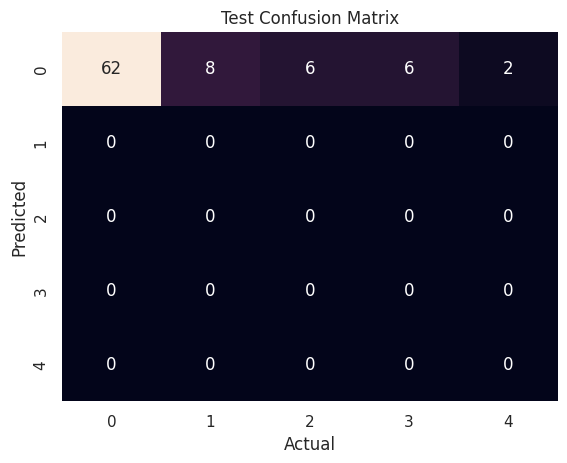

Classification report
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.74        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.54      0.74      0.63        84



In [ ]:
svc=svm.SVC(C=.1, degree=2, gamma=.01, kernel='rbf', random_state=42)

svc_result=function_model("SVC",svc, X_train_std, y_train, X_test_std, y_test)

In [ ]:
all_model_summary=all_model_summary.append(svc_result)
all_model_summary.reset_index(drop=True, inplace=True)

In [ ]:
all_model_summary

Model  Train Accuracy  Test Accuracy  Precision  recall  \
0  Logistic Regression            0.79           0.75       0.66    0.75   
1  K Nearest Neighbour            0.74           0.75       0.62    0.75   
2                  SVC            0.74           0.74       0.54    0.74   

   f1 score  
0      0.67  
1      0.65  
2      0.63

Model 4- Decision Trees

In [ ]:
#lets do grid search for Decision trees
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3,4,5,6,7,8],
    'min_samples_split': [3,5,7,9],
    'random_state': [42],
    'min_samples_leaf': [3,5,10,15,20],
}


clf = DecisionTreeClassifier()

# Perform grid search
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train_std, y_train)

# Get the best hyperparameter values and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test data
accuracy = best_model.score(X_test_std, y_test)

# Print the best hyperparameters and accuracy
print("Best Hyperparameters:", best_params)
print("Best Accuracy:", accuracy)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 15, 'min_samples_split': 3, 'random_state': 42}
Best Accuracy: 0.7380952380952381


Model:  Decision Tree
Train Accuracy score:  0.7514970059880239
Test Accuracy score:  0.7261904761904762


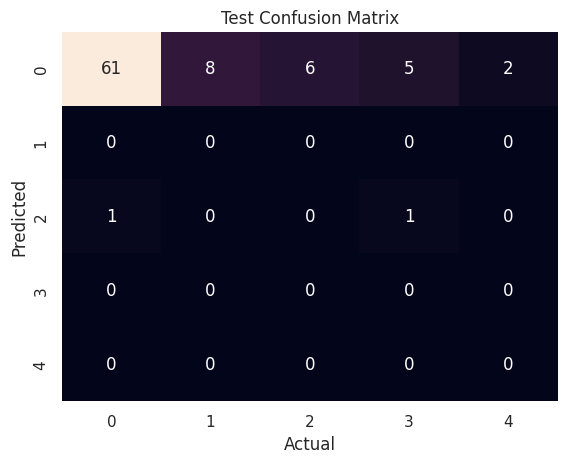

Classification report
              precision    recall  f1-score   support

           0       0.74      0.98      0.85        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.73        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.55      0.73      0.63        84



In [ ]:
dt=DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=3, min_samples_leaf=10, min_samples_split=3)

dt_result=function_model("Decision Tree",dt, X_train_std, y_train, X_test_std, y_test)

In [ ]:
all_model_summary=all_model_summary.append(dt_result)
all_model_summary.reset_index(drop=True, inplace=True)
all_model_summary

Model  Train Accuracy  Test Accuracy  Precision  recall  \
0  Logistic Regression            0.79           0.75       0.66    0.75   
1  K Nearest Neighbour            0.74           0.75       0.62    0.75   
2                  SVC            0.74           0.74       0.54    0.74   
3        Decision Tree            0.75           0.73       0.55    0.73   

   f1 score  
0      0.67  
1      0.65  
2      0.63  
3      0.63

Model 5- Random Forest

In [ ]:
#lets do grid search for random forest
param_grid = {
    'n_estimators': [50,100,150],
    'criterion': ['gini'],
    'max_depth': [4,5,6,7,8],
    'min_samples_split': [15,20,25,30],
    'random_state': [42],
    'min_samples_leaf': [3,4,5,6],
    'max_features': ['sqrt', 'log2']
}

# Create a decision tree classifier
rf = RandomForestClassifier()


# Perform grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train_std, y_train)

# Get the best hyperparameter values and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test data
accuracy = best_model.score(X_test_std, y_test)

# Print the best hyperparameters and accuracy
print("Best Hyperparameters:", best_params)
print("Best Accuracy:", accuracy)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 15, 'n_estimators': 50, 'random_state': 42}
Best Accuracy: 0.7380952380952381


Model:  Random Forest
Train Accuracy score:  0.7395209580838323
Test Accuracy score:  0.7380952380952381


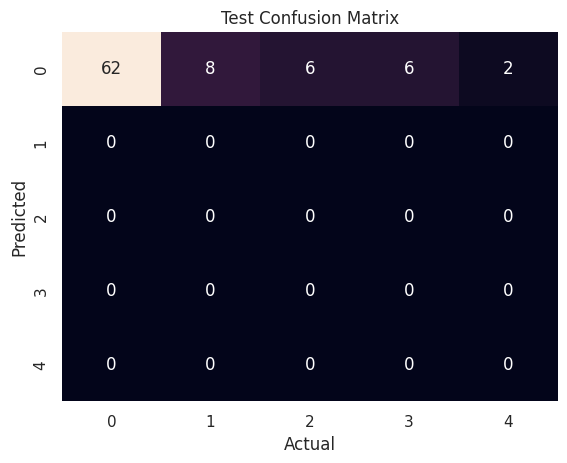

Classification report
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.74        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.54      0.74      0.63        84



In [ ]:
rf=RandomForestClassifier(criterion='gini', random_state=42, max_depth=4, min_samples_leaf=3, min_samples_split=15,
                                  n_estimators=100, max_features='sqrt')

rf_result=function_model("Random Forest",rf, X_train_std, y_train, X_test_std, y_test)

In [ ]:
all_model_summary=all_model_summary.append(rf_result)
all_model_summary.reset_index(drop=True, inplace=True)
all_model_summary

Model  Train Accuracy  Test Accuracy  Precision  recall  \
0  Logistic Regression            0.79           0.75       0.66    0.75   
1  K Nearest Neighbour            0.74           0.75       0.62    0.75   
2                  SVC            0.74           0.74       0.54    0.74   
3        Decision Tree            0.75           0.73       0.55    0.73   
4        Random Forest            0.74           0.74       0.54    0.74   

   f1 score  
0      0.67  
1      0.65  
2      0.63  
3      0.63  
4      0.63

Model 6- Adaboost

In [ ]:
#grid search for Adaboost
param_grid = {
    'n_estimators': [50,75,150,175],
    'learning_rate': [.001,.05,0.1,.5,.75,1],
    'random_state': [42]
}

# Create a decision tree classifier
adab = AdaBoostClassifier()

# Perform grid search
grid_search = GridSearchCV(estimator=adab, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train_std, y_train)

# Get the best hyperparameter values and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test data
accuracy = best_model.score(X_test_std, y_test)

# Print the best hyperparameters and accuracy
print("Best Hyperparameters:", best_params)
print("Best Accuracy:", accuracy)

Best Hyperparameters: {'learning_rate': 0.001, 'n_estimators': 50, 'random_state': 42}
Best Accuracy: 0.7380952380952381


Model:  Ada Boost
Train Accuracy score:  0.7395209580838323
Test Accuracy score:  0.7380952380952381


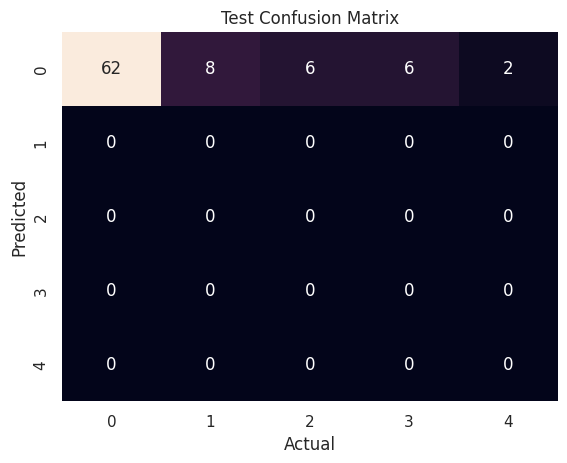

Classification report
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.74        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.54      0.74      0.63        84



In [ ]:
ada_boost= AdaBoostClassifier(random_state=42, n_estimators=75, learning_rate=.1)

ada_result=function_model("Ada Boost",ada_boost, X_train_std, y_train, X_test_std, y_test)

In [ ]:
all_model_summary=all_model_summary.append(ada_result)
all_model_summary.reset_index(drop=True, inplace=True)
all_model_summary

Model  Train Accuracy  Test Accuracy  Precision  recall  \
0  Logistic Regression            0.79           0.75       0.66    0.75   
1  K Nearest Neighbour            0.74           0.75       0.62    0.75   
2                  SVC            0.74           0.74       0.54    0.74   
3        Decision Tree            0.75           0.73       0.55    0.73   
4        Random Forest            0.74           0.74       0.54    0.74   
5            Ada Boost            0.74           0.74       0.54    0.74   

   f1 score  
0      0.67  
1      0.65  
2      0.63  
3      0.63  
4      0.63  
5      0.63

Model 7- Gradient Boosting

In [ ]:
#grid search for Gradient boosting
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.1,.01],
    'max_depth': [3, 4,7],
    'random_state': [42],
    'subsample': [.5,.7,.9],
    #'min_samples_split': [3,4,5,6,10],
    #'min_samples_leaf': [2, 3,5,10],
    'max_features': ['auto', 'sqrt']
}

# Create a decision tree classifier
gradB = GradientBoostingClassifier()


# Perform grid search
grid_search = GridSearchCV(estimator=gradB, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train_std, y_train)

# Get the best hyperparameter values and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test data
accuracy = best_model.score(X_test_std, y_test)

# Print the best hyperparameters and accuracy
print("Best Hyperparameters:", best_params)
print("Best Accuracy:", accuracy)

Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'max_features': 'auto', 'n_estimators': 50, 'random_state': 42, 'subsample': 0.5}
Best Accuracy: 0.7380952380952381


Model:  Gradient Boosting
Train Accuracy score:  0.7395209580838323
Test Accuracy score:  0.7380952380952381


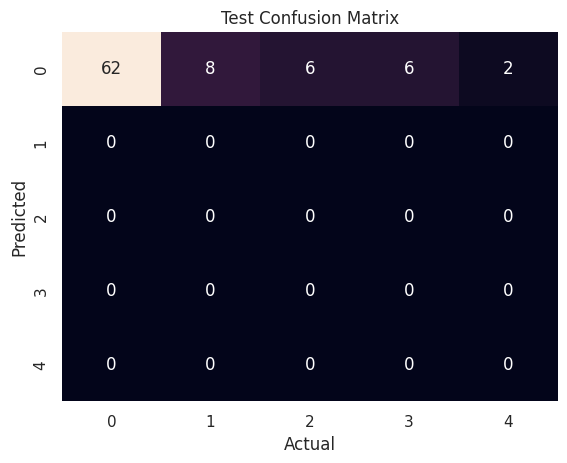

Classification report
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.74        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.54      0.74      0.63        84



In [ ]:
grad_boost= GradientBoostingClassifier(random_state=42, n_estimators=50, learning_rate=.01, max_depth=3, max_features='auto', subsample=.5)

gb_result=function_model("Gradient Boosting",grad_boost, X_train_std, y_train, X_test_std, y_test)

In [ ]:
all_model_summary=all_model_summary.append(gb_result)
all_model_summary.reset_index(drop=True, inplace=True)
all_model_summary

Model  Train Accuracy  Test Accuracy  Precision  recall  \
0  Logistic Regression            0.79           0.75       0.66    0.75   
1  K Nearest Neighbour            0.74           0.75       0.62    0.75   
2                  SVC            0.74           0.74       0.54    0.74   
3        Decision Tree            0.75           0.73       0.55    0.73   
4        Random Forest            0.74           0.74       0.54    0.74   
5            Ada Boost            0.74           0.74       0.54    0.74   
6    Gradient Boosting            0.74           0.74       0.54    0.74   

   f1 score  
0      0.67  
1      0.65  
2      0.63  
3      0.63  
4      0.63  
5      0.63  
6      0.63

In [ ]:
all_model_summary.to_pickle('dataframe.pickle')

Model 8- XGboost

In [ ]:
#lets try Grid search for XGboost
param_grid = {
    'booster': ['gbtree'], #, 'gblinear', 'dart'],
    'n_estimators': [30,50],
    'learning_rate': [0.01, 0.1], # , 0.5],
    'max_depth':  [5,6],
    'sampling_method': ['uniform'], #, 'gradient_based'],
    'reg_alpha': [0.1, 0.3],
    'reg_lambda': [0.1, 0.3]
}

xgb_clf = xgb.XGBClassifier()


# Perform grid search
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train_std, y_train)

# Get the best hyperparameter values and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test data
accuracy = best_model.score(X_test_std, y_test)

# Print the best hyperparameters and accuracy
print("Best Hyperparameters:", best_params)
print("Best Accuracy:", accuracy)

Best Hyperparameters: {'booster': 'gbtree', 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 50, 'reg_alpha': 0.1, 'reg_lambda': 0.1, 'sampling_method': 'uniform'}
Best Accuracy: 0.7380952380952381


Model:  XGB
Train Accuracy score:  0.9970059880239521
Test Accuracy score:  0.75


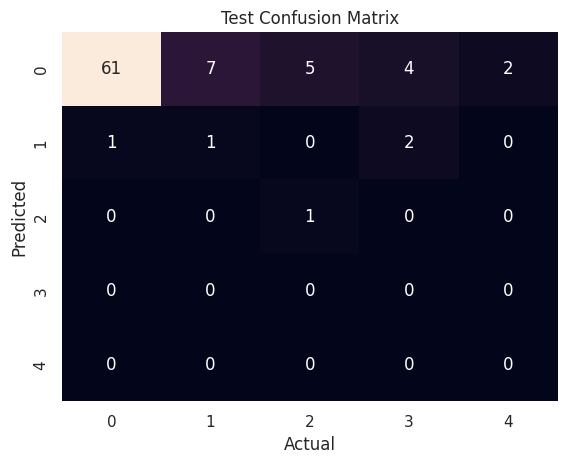

Classification report
              precision    recall  f1-score   support

           0       0.77      0.98      0.87        62
           1       0.25      0.12      0.17         8
           2       1.00      0.17      0.29         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.75        84
   macro avg       0.40      0.26      0.26        84
weighted avg       0.67      0.75      0.67        84



In [ ]:
xgb_clf = xgb.XGBClassifier(booster='gbtree', learning_rate=.1, max_depth=6, n_estimator=50, sampling_method='uniform', reg_alpha=.7, reg_lambda=.7)

xgb_result=function_model("XGB",xgb_clf, X_train_std, y_train, X_test_std, y_test)

In [ ]:
all_model_summary=all_model_summary.append(xgb_result)
all_model_summary.reset_index(drop=True, inplace=True)
all_model_summary

Model  Train Accuracy  Test Accuracy  Precision  recall  \
0  Logistic Regression            0.79           0.75       0.66    0.75   
1  K Nearest Neighbour            0.74           0.75       0.62    0.75   
2                  SVC            0.74           0.74       0.54    0.74   
3        Decision Tree            0.75           0.73       0.55    0.73   
4        Random Forest            0.74           0.74       0.54    0.74   
5            Ada Boost            0.74           0.74       0.54    0.74   
6    Gradient Boosting            0.74           0.74       0.54    0.74   
7                  XGB            1.00           0.75       0.67    0.75   

   f1 score  
0      0.67  
1      0.65  
2      0.63  
3      0.63  
4      0.63  
5      0.63  
6      0.63  
7      0.67

In [ ]:
all_model_summary.to_pickle('dataframe.pickle')

 Model 9- Lightgbm

In [ ]:
# Define the parameter grid for grid search
param_grid = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [50, 100],
    'max_depth': [3, 4, 5],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0.5, 0.3],
    'reg_lambda': [0.5, 0.3]
}

# Initialize the LGBMClassifier
lgbm_clf = LGBMClassifier()


# Perform grid search
grid_search = GridSearchCV(estimator=lgbm_clf, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train_std, y_train)

# Get the best hyperparameter values and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test data
accuracy = best_model.score(X_test_std, y_test)

# Print the best hyperparameters and accuracy
print("Best Hyperparameters:", best_params)
print("Best Accuracy:", accuracy)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001107 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22572
[LightGBM] [Info] Number of data points in the train set: 334, number of used features: 226
[LightGBM] [Info] Start training from score -0.301753
[LightGBM] [Info] Start training from score -2.345405
[LightGBM] [Info] Start training from score -2.592265
[LightGBM] [Info] Start training from score -2.633087
[LightGBM] [Info] Start training from score -4.019382
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

Model:  Light GBM
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001123 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22572
[LightGBM] [Info] Number of data points in the train set: 334, number of used features: 226
[LightGBM] [Info] Start training from score -0.301753
[LightGBM] [Info] Start training from score -2.345405
[LightGBM] [Info] Start training from score -2.592265
[LightGBM] [Info] Start training from score -2.633087
[LightGBM] [Info] Start training from score -4.019382
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

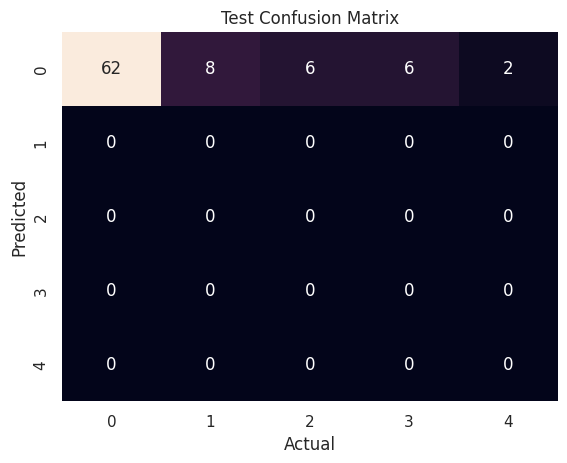

Classification report
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.74        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.54      0.74      0.63        84



In [ ]:
lgbm = LGBMClassifier(colsample_bytree=.8, learning_rate=.01, max_depth=3, n_estimators=50, reg_alpha=.5, reg_lambda=.5)

lgbm_result=function_model("Light GBM",lgbm, X_train_std, y_train, X_test_std, y_test)

In [ ]:
all_model_summary=all_model_summary.append(lgbm_result)
all_model_summary.reset_index(drop=True, inplace=True)
all_model_summary

Model  Train Accuracy  Test Accuracy  Precision  recall  \
0  Logistic Regression            0.79           0.75       0.66    0.75   
1  K Nearest Neighbour            0.74           0.75       0.62    0.75   
2                  SVC            0.74           0.74       0.54    0.74   
3        Decision Tree            0.75           0.73       0.55    0.73   
4        Random Forest            0.74           0.74       0.54    0.74   
5            Ada Boost            0.74           0.74       0.54    0.74   
6    Gradient Boosting            0.74           0.74       0.54    0.74   
7                  XGB            1.00           0.75       0.67    0.75   
8            Light GBM            0.74           0.74       0.54    0.74   

   f1 score  
0      0.67  
1      0.65  
2      0.63  
3      0.63  
4      0.63  
5      0.63  
6      0.63  
7      0.67  
8      0.63

In [ ]:
all_model_summary.to_pickle('dataframe.pickle')
all_model_summary.to_pickle('dataframe_original_data.pickle')

### Trying Basic Models on Upsampled data

In [ ]:
X.shape, y.shape

((418, 264), (418, 1))

In [ ]:
X.head(1)

Year  Month  Day  WeekofYear  is_holiday  Country_Country_02  \
0  2016      1    1          53           1                   0   

   Country_Country_03  Local_Local_02  Local_Local_03  Local_Local_04  \
0                   0               0               0               0   

   Local_Local_05  Local_Local_06  Local_Local_07  Local_Local_08  \
0               0               0               0               0   

   Local_Local_09  Local_Local_10  Local_Local_11  Local_Local_12  \
0               0               0               0               0   

   Industry Sector_Mining  Industry Sector_Others  Gender_Male  \
0                       1                       0            1   

   Employee Type_Third Party  Employee Type_Third Party (Remote)  \
0                          1                                   0   

   Critical Risk_Bees  Critical Risk_Blocking and isolation of energies  \
0                   0                                                 0   

   Critical Risk_Burn  Critical Risk_Chemical substances  \
0                   0                                  0   

   Critical Risk_Confined space  Critical Risk_Cut  \
0                             0                  0   

   Critical Risk_Electrical Shock  Critical Risk_Electrical installation  \
0                               0                                      0   

   Critical Risk_Fall  Critical Risk_Fall prevention  \
0                   0                              0   

   Critical Risk_Fall prevention (same level)  \
0                                           0   

   Critical Risk_Individual protection equipment  Critical Risk_Liquid Metal  \
0                                              0                           0   

   Critical Risk_Machine Protection  Critical Risk_Manual Tools  \
0                                 0                           0   

   Critical Risk_Others  Critical Risk_Plates  Critical Risk_Poll  \
0                     0                     0                   0   

   Critical Risk_Power lock  Critical Risk_Pressed  \
0                         0                      1   

   Critical Risk_Pressurized Systems  \
0                                  0   

   Critical Risk_Pressurized Systems / Chemical Substances  \
0                                                  0         

   Critical Risk_Projection  Critical Risk_Projection of fragments  \
0                         0                                      0   

   Critical Risk_Projection/Burning  Critical Risk_Projection/Choco  \
0                                 0                               0   

   Critical Risk_Projection/Manual Tools  Critical Risk_Suspended Loads  \
0                                      0                              0   

   Critical Risk_Traffic  Critical Risk_Vehicles and Mobile Equipment  \
0                      0                                            0   

   Critical Risk_Venomous Animals  Critical Risk_remains of choco  \
0                               0                               0   

   Weekday_Monday  Weekday_Saturday  Weekday_Sunday  Weekday_Thursday  \
0               0                 0               0                 0   

   Weekday_Tuesday  Weekday_Wednesday  season_Spring  season_Summer  \
0                0                  0              0              1   

   season_Winter    0     1     2      3    4     5      6     7     8    9  \
0              0 2.67 19.93 -0.02 -11.31 4.04 18.14 -20.14 -6.10 -8.21 4.63   

    10    11    12   13    14    15   16   17    18    19    20     21   22  \
0 3.11 15.66 10.79 6.70 26.09 -4.53 1.19 9.09 -2.72 -3.46 12.15 190.84 9.77   

     23   24   25     26   27    28   29   30     31    32   33    34    35  \
0 -0.78 7.47 6.58 -11.65 6.54 -0.95 0.20 7.98 -12.03 -0.97 0.98 -2.10 -9.37   

      36     37     38    39   40     41   42    43    44    45    46   47  \
0 -41.08 -20.13 -11.45 -5.36 7.23 -10.80 4.97 21.31 -2.24 20.89 18.45 8.54   

    48    49    50   51   52    

In [ ]:
smote=SMOTE(random_state=42)
X_train_smote,y_train_smote= smote.fit_resample(X_train, y_train)

In [ ]:
X_train_smote.head(1)

Year  Month  Day  WeekofYear  is_holiday  Country_Country_02  \
0  2016      6   10          23           0                   1   

   Country_Country_03  Local_Local_02  Local_Local_03  Local_Local_04  \
0                   0               0               0               0   

   Local_Local_05  Local_Local_06  Local_Local_07  Local_Local_08  \
0               1               0               0               0   

   Local_Local_09  Local_Local_10  Local_Local_11  Local_Local_12  \
0               0               0               0               0   

   Industry Sector_Mining  Industry Sector_Others  Gender_Male  \
0                       0                       0            1   

   Employee Type_Third Party  Employee Type_Third Party (Remote)  \
0                          0                                   1   

   Critical Risk_Bees  Critical Risk_Blocking and isolation of energies  \
0                   0                                                 0   

   Critical Risk_Burn  Critical Risk_Chemical substances  \
0                   0                                  0   

   Critical Risk_Confined space  Critical Risk_Cut  \
0                             0                  0   

   Critical Risk_Electrical Shock  Critical Risk_Electrical installation  \
0                               0                                      0   

   Critical Risk_Fall  Critical Risk_Fall prevention  \
0                   0                              0   

   Critical Risk_Fall prevention (same level)  \
0                                           0   

   Critical Risk_Individual protection equipment  Critical Risk_Liquid Metal  \
0                                              0                           0   

   Critical Risk_Machine Protection  Critical Risk_Manual Tools  \
0                                 0                           1   

   Critical Risk_Others  Critical Risk_Plates  Critical Risk_Poll  \
0                     0                     0                   0   

   Critical Risk_Power lock  Critical Risk_Pressed  \
0                         0                      0   

   Critical Risk_Pressurized Systems  \
0                                  0   

   Critical Risk_Pressurized Systems / Chemical Substances  \
0                                                  0         

   Critical Risk_Projection  Critical Risk_Projection of fragments  \
0                         0                                      0   

   Critical Risk_Projection/Burning  Critical Risk_Projection/Choco  \
0                                 0                               0   

   Critical Risk_Projection/Manual Tools  Critical Risk_Suspended Loads  \
0                                      0                              0   

   Critical Risk_Traffic  Critical Risk_Vehicles and Mobile Equipment  \
0                      0                                            0   

   Critical Risk_Venomous Animals  Critical Risk_remains of choco  \
0                               0                               0   

   Weekday_Monday  Weekday_Saturday  Weekday_Sunday  Weekday_Thursday  \
0               0                 0               0                 0   

   Weekday_Tuesday  Weekday_Wednesday  season_Spring  season_Summer  \
0                0                  0              0              0   

   season_Winter     0     1     2     3     4    5     6     7    8    9  \
0              0 -2.81 -1.65 -5.14 -9.69 -0.15 4.13 -9.99 -5.60 3.87 0.63   

    10   11   12   13    14    15    16   17    18    19    20    21   22  \
0 3.83 8.38 2.95 5.02 11.75 -2.51 -1.94 8.50 -1.15 -4.10 10.89 90.24 4.39   

     23   24   25    26    27    28    29    30   31    32   33   34    35  \
0 -1.64 2.86 6.08 -5.36 -0.27 -3.11 -2.12 -0.63 0.71 -2.20 2.31 0.19 -4.43   

      36     37    38    39    40    41    42    43    44   45   46   47   48  \
0 -20.56 -13.03 -8.78 -0.57 -0.45 -4.41 -1.48 12.82 -2.84 3.83 4.87 2.94 0.82   

    49   50   51    52   53   54   5

In [ ]:
X_train_smote.shape, y_train_smote.shape

((1235, 264), (1235, 1))

In [ ]:
y_train_smote.value_counts()

Accident Level
0                 247
1                 247
2                 247
3                 247
4                 247
dtype: int64

In [ ]:
y_train_smote.value_counts(normalize=True)

Accident Level
0                0.20
1                0.20
2                0.20
3                0.20
4                0.20
dtype: float64

In [ ]:
y_test.value_counts(normalize=True)

Accident Level
0                0.74
1                0.10
2                0.07
3                0.07
4                0.02
dtype: float64

In [ ]:
ss_smote = StandardScaler()

X_train_smote_std= ss_smote.fit_transform(X_train_smote)

X_test_smote_std = ss_smote.transform(X_test)

X_train_smote_std=pd.DataFrame(X_train_smote_std, columns= X_train_smote.columns)
X_test_smote_std=pd.DataFrame(X_test_smote_std, columns= X_test.columns)

In [ ]:
X_train_smote_std.head(1)

Year  Month   Day  WeekofYear  is_holiday  Country_Country_02  \
0 -0.51   0.36 -0.56        0.20       -0.05                2.27   

   Country_Country_03  Local_Local_02  Local_Local_03  Local_Local_04  \
0               -0.18           -0.13           -0.34           -0.27   

   Local_Local_05  Local_Local_06  Local_Local_07  Local_Local_08  \
0            5.08           -0.19           -0.09           -0.14   

   Local_Local_09  Local_Local_10  Local_Local_11  Local_Local_12  \
0           -0.04           -0.18           -0.03           -0.06   

   Industry Sector_Mining  Industry Sector_Others  Gender_Male  \
0                   -1.01                   -0.19         0.19   

   Employee Type_Third Party  Employee Type_Third Party (Remote)  \
0                      -0.74                                3.80   

   Critical Risk_Bees  Critical Risk_Blocking and isolation of energies  \
0               -0.08                                             -0.04   

   Critical Risk_Burn  Critical Risk_Chemical substances  \
0               -0.03                              -0.11   

   Critical Risk_Confined space  Critical Risk_Cut  \
0                         -0.03              -0.09   

   Critical Risk_Electrical Shock  Critical Risk_Electrical installation  \
0                           -0.03                                  -0.03   

   Critical Risk_Fall  Critical Risk_Fall prevention  \
0               -0.09                          -0.07   

   Critical Risk_Fall prevention (same level)  \
0                                       -0.06   

   Critical Risk_Individual protection equipment  Critical Risk_Liquid Metal  \
0                                          -0.03                       -0.04   

   Critical Risk_Machine Protection  Critical Risk_Manual Tools  \
0                             -0.03                        9.02   

   Critical Risk_Others  Critical Risk_Plates  Critical Risk_Poll  \
0                 -0.76                  0.00               -0.03   

   Critical Risk_Power lock  Critical Risk_Pressed  \
0                     -0.15                  -0.11   

   Critical Risk_Pressurized Systems  \
0                              -0.07   

   Critical Risk_Pressurized Systems / Chemical Substances  \
0                                              -0.05         

   Critical Risk_Projection  Critical Risk_Projection of fragments  \
0                     -0.09                                  -0.03   

   Critical Risk_Projection/Burning  Critical Risk_Projection/Choco  \
0                             -0.03                           -0.03   

   Critical Risk_Projection/Manual Tools  Critical Risk_Suspended Loads  \
0                                   0.00                          -0.07   

   Critical Risk_Traffic  Critical Risk_Vehicles and Mobile Equipment  \
0                  -0.03                                        -0.08   

   Critical Risk_Venomous Animals  Critical Risk_remains of choco  \
0                           -0.09                           -0.06   

   Weekday_Monday  Weekday_Saturday  Weekday_Sunday  Weekday_Thursday  \
0           -0.22             -0.30           -0.19             -0.24   

   Weekday_Tuesday  Weekday_Wednesday  season_Spring  season_Summer  \
0            -0.24              -0.30          -0.27          -0.61   

   season_Winter     0     1    2    3     4     5    6    7    8    9    10  \
0          -0.20 -1.16 -1.97 0.24 0.69 -0.36 -1.22 0.97 0.58 0.95 0.23 -0.67   

     11    12    13    14    15   16    17   18   19    20    21    22   23  \
0 -0.51 -0.83 -1.16 -1.07 -0.27 0.10 -0.60 0.19 0.97 -0.30 -1.09 -0.07 1.08   

     24   25   26    27   28    29    30   31    32   33   34   35   36   37  \
0 -1.13 1.39 0.95 -1.38 0.04 -1.51 -1.38 1.78 -0.39 0.64 0.19 0.83 0.91 0.82   

     38   39   40   41    42    43   44    45    46    47    48    49   50  \
0 -0.49 0.90 0.32 1.30 -1.03 -0.76 0.64 -1.35 -1.28 -0.26 -1.11 -1.34 1.32   

    51    52    53    54  

In [ ]:
X_train_smote_std.shape, y_train_smote.shape

((1235, 264), (1235, 1))

In [ ]:
X_test_smote_std.shape, y_test.shape

((84, 264), (84, 1))

Logistic regression Smote

Model:  Logistic Regression SMOTE
Train Accuracy score:  0.962753036437247
Test Accuracy score:  0.6666666666666666


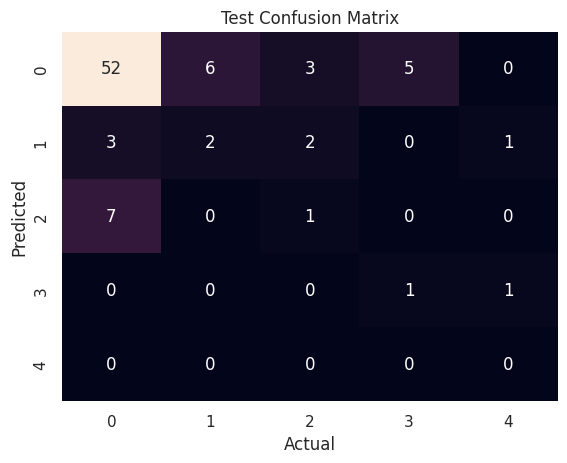

Classification report
              precision    recall  f1-score   support

           0       0.79      0.84      0.81        62
           1       0.25      0.25      0.25         8
           2       0.12      0.17      0.14         6
           3       0.50      0.17      0.25         6
           4       0.00      0.00      0.00         2

    accuracy                           0.67        84
   macro avg       0.33      0.28      0.29        84
weighted avg       0.65      0.67      0.65        84



In [ ]:
lr_smote_result=function_model("Logistic Regression SMOTE",lr, X_train_smote_std, y_train_smote, X_test_smote_std, y_test)

KNN Smote

Model:  K Nearest Neighbour SMOTE
Train Accuracy score:  0.8242914979757086
Test Accuracy score:  0.13095238095238096


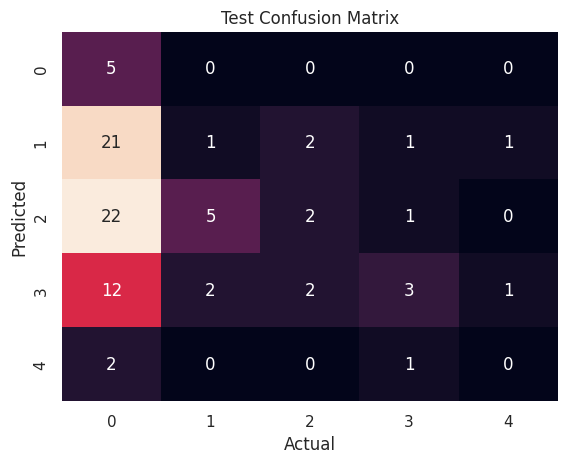

Classification report
              precision    recall  f1-score   support

           0       1.00      0.08      0.15        62
           1       0.04      0.12      0.06         8
           2       0.07      0.33      0.11         6
           3       0.15      0.50      0.23         6
           4       0.00      0.00      0.00         2

    accuracy                           0.13        84
   macro avg       0.25      0.21      0.11        84
weighted avg       0.76      0.13      0.14        84



In [ ]:
knn_smote_result=function_model("K Nearest Neighbour SMOTE",knn,X_train_smote_std, y_train_smote, X_test_smote_std, y_test)

SVC Smote

Model:  SVC SMOTE
Train Accuracy score:  0.8696356275303644
Test Accuracy score:  0.7142857142857143


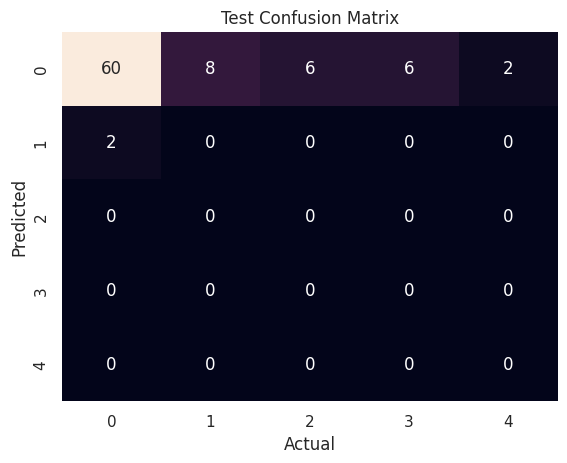

Classification report
              precision    recall  f1-score   support

           0       0.73      0.97      0.83        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.71        84
   macro avg       0.15      0.19      0.17        84
weighted avg       0.54      0.71      0.62        84



In [ ]:
svc_smote_result=function_model("SVC SMOTE",svc, X_train_smote_std, y_train_smote, X_test_smote_std, y_test)

Decision Trees Smote

Model:  Decision Tree SMOTE
Train Accuracy score:  0.5797570850202429
Test Accuracy score:  0.07142857142857142


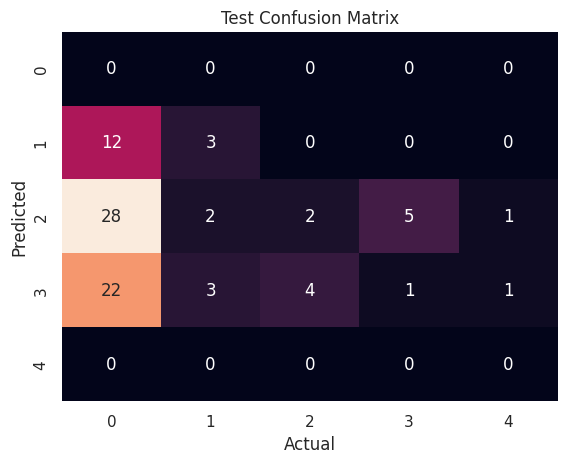

Classification report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        62
           1       0.20      0.38      0.26         8
           2       0.05      0.33      0.09         6
           3       0.03      0.17      0.05         6
           4       0.00      0.00      0.00         2

    accuracy                           0.07        84
   macro avg       0.06      0.17      0.08        84
weighted avg       0.03      0.07      0.04        84



In [ ]:
dt_smote_result=function_model("Decision Tree SMOTE",dt, X_train_smote_std, y_train_smote, X_test_smote_std, y_test)

Random Forest Smote

Model:  Random Forest SMOTE
Train Accuracy score:  0.8817813765182186
Test Accuracy score:  0.4166666666666667


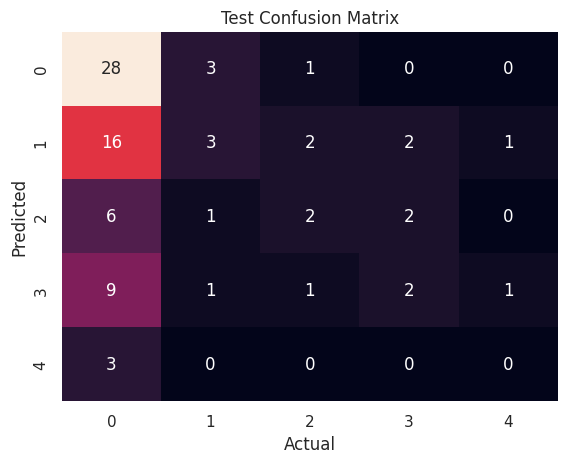

Classification report
              precision    recall  f1-score   support

           0       0.88      0.45      0.60        62
           1       0.12      0.38      0.19         8
           2       0.18      0.33      0.24         6
           3       0.14      0.33      0.20         6
           4       0.00      0.00      0.00         2

    accuracy                           0.42        84
   macro avg       0.26      0.30      0.24        84
weighted avg       0.68      0.42      0.49        84



In [ ]:
rf_smote_result=function_model("Random Forest SMOTE",rf, X_train_smote_std, y_train_smote, X_test_smote_std, y_test)

Ada Boost Smote

Model:  Ada Boost SMOTE
Train Accuracy score:  0.6380566801619433
Test Accuracy score:  0.4880952380952381


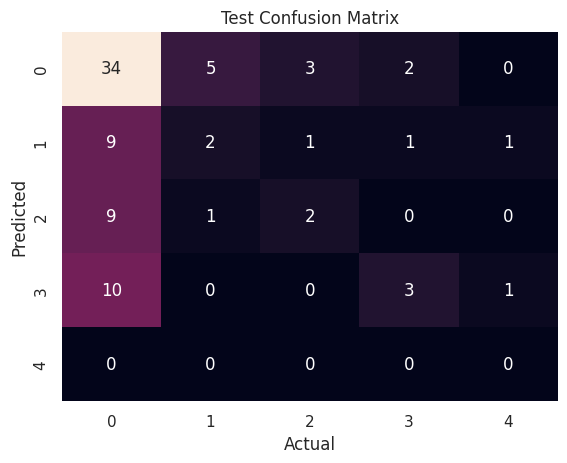

Classification report
              precision    recall  f1-score   support

           0       0.77      0.55      0.64        62
           1       0.14      0.25      0.18         8
           2       0.17      0.33      0.22         6
           3       0.21      0.50      0.30         6
           4       0.00      0.00      0.00         2

    accuracy                           0.49        84
   macro avg       0.26      0.33      0.27        84
weighted avg       0.61      0.49      0.53        84



In [ ]:
ada_smote_result=function_model("Ada Boost SMOTE",ada_boost, X_train_smote_std, y_train_smote, X_test_smote_std, y_test)

Model:  Gradient Boosting SMOTE
Train Accuracy score:  0.9441295546558705
Test Accuracy score:  0.5119047619047619


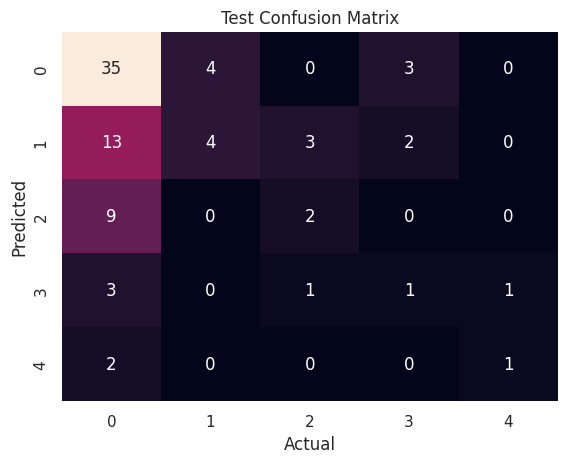

Classification report
              precision    recall  f1-score   support

           0       0.83      0.56      0.67        62
           1       0.18      0.50      0.27         8
           2       0.18      0.33      0.24         6
           3       0.17      0.17      0.17         6
           4       0.33      0.50      0.40         2

    accuracy                           0.51        84
   macro avg       0.34      0.41      0.35        84
weighted avg       0.67      0.51      0.56        84



In [ ]:
gb_smote_result=function_model("Gradient Boosting SMOTE",grad_boost, X_train_smote_std, y_train_smote, X_test_smote_std, y_test)

XGB Smote

Model:  XGB SMOTE
Train Accuracy score:  0.9991902834008097
Test Accuracy score:  0.7142857142857143


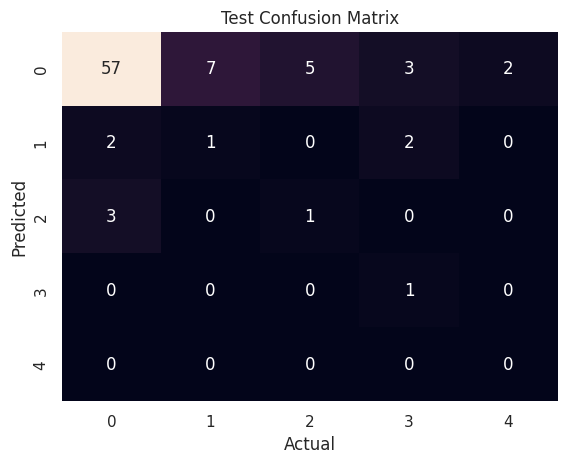

Classification report
              precision    recall  f1-score   support

           0       0.77      0.92      0.84        62
           1       0.20      0.12      0.15         8
           2       0.25      0.17      0.20         6
           3       1.00      0.17      0.29         6
           4       0.00      0.00      0.00         2

    accuracy                           0.71        84
   macro avg       0.44      0.28      0.30        84
weighted avg       0.68      0.71      0.67        84



In [ ]:
xgb_smote_result=function_model("XGB SMOTE",xgb_clf, X_train_smote_std, y_train_smote, X_test_smote_std, y_test)

LGBM Smote

Model:  Light GBM SMOTE
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006040 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 51177
[LightGBM] [Info] Number of data points in the train set: 1235, number of used features: 229
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

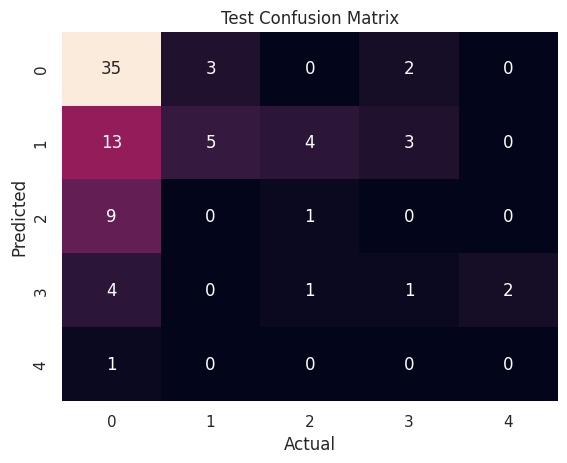

Classification report
              precision    recall  f1-score   support

           0       0.88      0.56      0.69        62
           1       0.20      0.62      0.30         8
           2       0.10      0.17      0.12         6
           3       0.12      0.17      0.14         6
           4       0.00      0.00      0.00         2

    accuracy                           0.50        84
   macro avg       0.26      0.30      0.25        84
weighted avg       0.68      0.50      0.55        84



In [ ]:
lgbm_smote_result=function_model("Light GBM SMOTE",lgbm, X_train_smote_std, y_train_smote, X_test_smote_std, y_test)

In [ ]:
all_model_summary=all_model_summary.append(lr_smote_result)
all_model_summary=all_model_summary.append(knn_smote_result)
all_model_summary=all_model_summary.append(svc_smote_result)
all_model_summary=all_model_summary.append(dt_smote_result)
all_model_summary=all_model_summary.append(rf_smote_result)
all_model_summary=all_model_summary.append(ada_smote_result)
all_model_summary=all_model_summary.append(gb_smote_result)
all_model_summary=all_model_summary.append(xgb_smote_result)
all_model_summary=all_model_summary.append(lgbm_smote_result)


all_model_summary.reset_index(drop=True, inplace=True)
all_model_summary

Model  Train Accuracy  Test Accuracy  Precision  \
0         Logistic Regression            0.79           0.75       0.66   
1         K Nearest Neighbour            0.74           0.75       0.62   
2                         SVC            0.74           0.74       0.54   
3               Decision Tree            0.75           0.73       0.55   
4               Random Forest            0.74           0.74       0.54   
5                   Ada Boost            0.74           0.74       0.54   
6           Gradient Boosting            0.74           0.74       0.54   
7                         XGB            1.00           0.75       0.67   
8                   Light GBM            0.74           0.74       0.54   
9   Logistic Regression SMOTE            0.96           0.67       0.65   
10  K Nearest Neighbour SMOTE            0.82           0.13       0.76   
11                  SVC SMOTE            0.87           0.71       0.54   
12        Decision Tree SMOTE            0.58           0.07       0.03   
13        Random Forest SMOTE            0.88           0.42       0.68   
14            Ada Boost SMOTE            0.64           0.49       0.61   
15    Gradient Boosting SMOTE            0.94           0.51       0.67   
16                  XGB SMOTE            1.00           0.71       0.68   
17            Light GBM SMOTE            0.93           0.50       0.68   

    recall  f1 score  
0     0.75      0.67  
1     0.75      0.65  
2     0.74      0.63  
3     0.73      0.63  
4     0.74      0.63  
5     0.74      0.63  
6     0.74      0.63  
7     0.75      0.67  
8     0.74      0.63  
9     0.67      0.65  
10    0.13      0.14  
11    0.71      0.62  
12    0.07      0.04  
13    0.42      0.49  
14    0.49      0.53  
15    0.51      0.56  
16    0.71      0.67  
17    0.50      0.55

In [ ]:
all_model_summary.to_pickle('dataframe.pickle')
all_model_summary.to_pickle('dataframe_original_smote.pickle')

### Try Basic models on Downsampled data

In [ ]:
X.shape, y.shape

((418, 264), (418, 1))

In [ ]:
X.head(1)

Year  Month  Day  WeekofYear  is_holiday  Country_Country_02  \
0  2016      1    1          53           1                   0   

   Country_Country_03  Local_Local_02  Local_Local_03  Local_Local_04  \
0                   0               0               0               0   

   Local_Local_05  Local_Local_06  Local_Local_07  Local_Local_08  \
0               0               0               0               0   

   Local_Local_09  Local_Local_10  Local_Local_11  Local_Local_12  \
0               0               0               0               0   

   Industry Sector_Mining  Industry Sector_Others  Gender_Male  \
0                       1                       0            1   

   Employee Type_Third Party  Employee Type_Third Party (Remote)  \
0                          1                                   0   

   Critical Risk_Bees  Critical Risk_Blocking and isolation of energies  \
0                   0                                                 0   

   Critical Risk_Burn  Critical Risk_Chemical substances  \
0                   0                                  0   

   Critical Risk_Confined space  Critical Risk_Cut  \
0                             0                  0   

   Critical Risk_Electrical Shock  Critical Risk_Electrical installation  \
0                               0                                      0   

   Critical Risk_Fall  Critical Risk_Fall prevention  \
0                   0                              0   

   Critical Risk_Fall prevention (same level)  \
0                                           0   

   Critical Risk_Individual protection equipment  Critical Risk_Liquid Metal  \
0                                              0                           0   

   Critical Risk_Machine Protection  Critical Risk_Manual Tools  \
0                                 0                           0   

   Critical Risk_Others  Critical Risk_Plates  Critical Risk_Poll  \
0                     0                     0                   0   

   Critical Risk_Power lock  Critical Risk_Pressed  \
0                         0                      1   

   Critical Risk_Pressurized Systems  \
0                                  0   

   Critical Risk_Pressurized Systems / Chemical Substances  \
0                                                  0         

   Critical Risk_Projection  Critical Risk_Projection of fragments  \
0                         0                                      0   

   Critical Risk_Projection/Burning  Critical Risk_Projection/Choco  \
0                                 0                               0   

   Critical Risk_Projection/Manual Tools  Critical Risk_Suspended Loads  \
0                                      0                              0   

   Critical Risk_Traffic  Critical Risk_Vehicles and Mobile Equipment  \
0                      0                                            0   

   Critical Risk_Venomous Animals  Critical Risk_remains of choco  \
0                               0                               0   

   Weekday_Monday  Weekday_Saturday  Weekday_Sunday  Weekday_Thursday  \
0               0                 0               0                 0   

   Weekday_Tuesday  Weekday_Wednesday  season_Spring  season_Summer  \
0                0                  0              0              1   

   season_Winter    0     1     2      3    4     5      6     7     8    9  \
0              0 2.67 19.93 -0.02 -11.31 4.04 18.14 -20.14 -6.10 -8.21 4.63   

    10    11    12   13    14    15   16   17    18    19    20     21   22  \
0 3.11 15.66 10.79 6.70 26.09 -4.53 1.19 9.09 -2.72 -3.46 12.15 190.84 9.77   

     23   24   25     26   27    28   29   30     31    32   33    34    35  \
0 -0.78 7.47 6.58 -11.65 6.54 -0.95 0.20 7.98 -12.03 -0.97 0.98 -2.10 -9.37   

      36     37     38    39   40     41   42    43    44    45    46   47  \
0 -41.08 -20.13 -11.45 -5.36 7.23 -10.80 4.97 21.31 -2.24 20.89 18.45 8.54   

    48    49    50   51   52    

In [ ]:
tomek = TomekLinks(sampling_strategy='majority')

In [ ]:
X_train_tomek, y_train_tomek = tomek.fit_resample(X_train, y_train)

In [ ]:
X_train.shape, y_train.shape

((334, 264), (334, 1))

In [ ]:
X_train_tomek.shape, y_train_tomek.shape

((312, 264), (312, 1))

In [ ]:
y_train_tomek.value_counts()

Accident Level
0                 225
1                  32
2                  25
3                  24
4                   6
dtype: int64

In [ ]:
y_train_tomek.value_counts(normalize=True)

Accident Level
0                0.72
1                0.10
2                0.08
3                0.08
4                0.02
dtype: float64

In [ ]:
y_test.value_counts(normalize=True)

Accident Level
0                0.74
1                0.10
2                0.07
3                0.07
4                0.02
dtype: float64

In [ ]:
ss_tomek = StandardScaler()

X_train_tomek_std= ss_tomek.fit_transform(X_train_tomek)
X_test_tomek_std = ss_tomek.transform(X_test)

In [ ]:
X_train_tomek_std=pd.DataFrame(X_train_tomek_std, columns= X_train_tomek.columns)
X_test_tomek_std=pd.DataFrame(X_test_tomek_std, columns= X_test.columns)


In [ ]:
X_train_tomek_std.head(1)

Year  Month   Day  WeekofYear  is_holiday  Country_Country_02  \
0 -0.66   0.21 -0.61        0.13       -0.10                1.55   

   Country_Country_03  Local_Local_02  Local_Local_03  Local_Local_04  \
0               -0.33           -0.25           -0.53           -0.39   

   Local_Local_05  Local_Local_06  Local_Local_07  Local_Local_08  \
0            2.61           -0.36           -0.16           -0.27   

   Local_Local_09  Local_Local_10  Local_Local_11  Local_Local_12  \
0           -0.08           -0.33           -0.06           -0.10   

   Industry Sector_Mining  Industry Sector_Others  Gender_Male  \
0                   -1.15                   -0.36         0.24   

   Employee Type_Third Party  Employee Type_Third Party (Remote)  \
0                      -0.93                                2.54   

   Critical Risk_Bees  Critical Risk_Blocking and isolation of energies  \
0               -0.16                                             -0.08   

   Critical Risk_Burn  Critical Risk_Chemical substances  \
0               -0.06                              -0.22   

   Critical Risk_Confined space  Critical Risk_Cut  \
0                          0.00              -0.17   

   Critical Risk_Electrical Shock  Critical Risk_Electrical installation  \
0                           -0.06                                  -0.06   

   Critical Risk_Fall  Critical Risk_Fall prevention  \
0               -0.15                          -0.11   

   Critical Risk_Fall prevention (same level)  \
0                                       -0.13   

   Critical Risk_Individual protection equipment  Critical Risk_Liquid Metal  \
0                                          -0.06                       -0.08   

   Critical Risk_Machine Protection  Critical Risk_Manual Tools  \
0                             -0.06                        4.61   

   Critical Risk_Others  Critical Risk_Plates  Critical Risk_Poll  \
0                 -1.15                  0.00               -0.06   

   Critical Risk_Power lock  Critical Risk_Pressed  \
0                     -0.10                  -0.20   

   Critical Risk_Pressurized Systems  \
0                              -0.14   

   Critical Risk_Pressurized Systems / Chemical Substances  \
0                                              -0.10         

   Critical Risk_Projection  Critical Risk_Projection of fragments  \
0                     -0.17                                  -0.06   

   Critical Risk_Projection/Burning  Critical Risk_Projection/Choco  \
0                             -0.06                           -0.06   

   Critical Risk_Projection/Manual Tools  Critical Risk_Suspended Loads  \
0                                   0.00                          -0.13   

   Critical Risk_Traffic  Critical Risk_Vehicles and Mobile Equipment  \
0                  -0.06                                        -0.16   

   Critical Risk_Venomous Animals  Critical Risk_remains of choco  \
0                           -0.16                           -0.11   

   Weekday_Monday  Weekday_Saturday  Weekday_Sunday  Weekday_Thursday  \
0           -0.36             -0.40           -0.33             -0.47   

   Weekday_Tuesday  Weekday_Wednesday  season_Spring  season_Summer  \
0            -0.46              -0.43          -0.39          -0.84   

   season_Winter     0     1    2    3     4     5    6    7    8    9    10  \
0          -0.36 -1.14 -1.74 0.11 0.48 -0.19 -0.82 0.70 0.29 1.04 0.23 -0.43   

     11    12    13    14    15   16    17   18   19    20    21    22   23  \
0 -0.35 -0.57 -0.67 -0.77 -0.51 0.12 -0.43 0.20 0.69 -0.12 -0.82 -0.15 0.80   

     24   25   26    27    28    29    30   31    32   33   34   35   36   37  \
0 -0.84 1.53 0.76 -1.09 -0.01 -1.05 -1.09 1.55 -0.42 0.47 0.07 0.77 0.65 0.52   

     38   39   40   41    42    43   44    45    46    47    48    49   50  \
0 -0.68 0.78 0.04 0.92 -0.90 -0.51 0.38 -1.11 -1.12 -0.14 -0.72 -1.01 1.11   

    51    52    53   54 

In [ ]:
X_train_tomek_std.shape, y_train_tomek.shape


((312, 264), (312, 1))

In [ ]:
X_test_tomek_std.shape, y_test.shape

((84, 264), (84, 1))

Logistic Regression Tomek (Undersampling)

Model:  Logistic Regression tomek (Undersampling)
Train Accuracy score:  0.7916666666666666
Test Accuracy score:  0.75


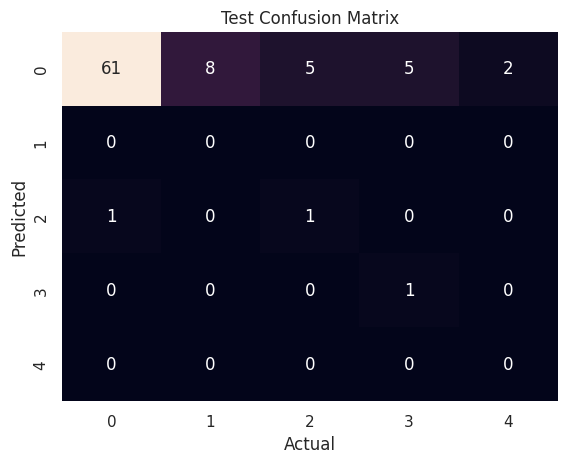

Classification report
              precision    recall  f1-score   support

           0       0.75      0.98      0.85        62
           1       0.00      0.00      0.00         8
           2       0.50      0.17      0.25         6
           3       1.00      0.17      0.29         6
           4       0.00      0.00      0.00         2

    accuracy                           0.75        84
   macro avg       0.45      0.26      0.28        84
weighted avg       0.66      0.75      0.67        84



In [ ]:
lr_tomek_result=function_model("Logistic Regression tomek (Undersampling)",lr, X_train_tomek_std, y_train_tomek, X_test_tomek_std, y_test)

KNN Tomek (Undersampling)

Model:  K Nearest Neighbour tomek(Undersampling)
Train Accuracy score:  0.7339743589743589
Test Accuracy score:  0.75


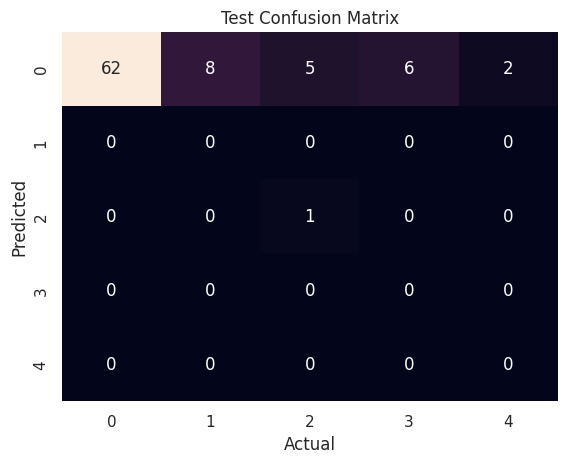

Classification report
              precision    recall  f1-score   support

           0       0.75      1.00      0.86        62
           1       0.00      0.00      0.00         8
           2       1.00      0.17      0.29         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.75        84
   macro avg       0.35      0.23      0.23        84
weighted avg       0.62      0.75      0.65        84



In [ ]:
knn_tomek_result=function_model("K Nearest Neighbour tomek(Undersampling)",knn,X_train_tomek_std, y_train_tomek, X_test_tomek_std, y_test)

SVC Tomek (Undersampling)

Model:  SVC tomek (Undersampling)
Train Accuracy score:  0.7211538461538461
Test Accuracy score:  0.7380952380952381


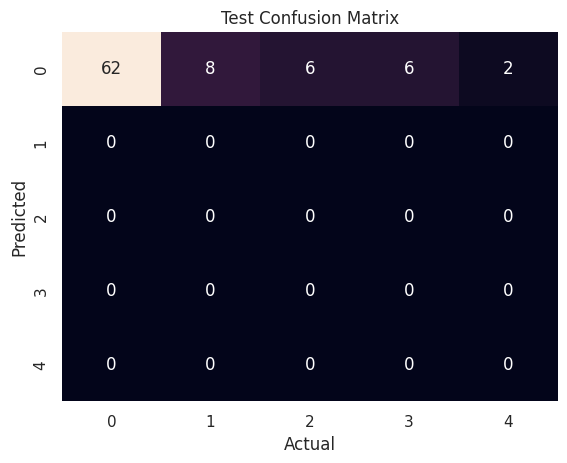

Classification report
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.74        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.54      0.74      0.63        84



In [ ]:
svc_tomek_result=function_model("SVC tomek (Undersampling)",svc, X_train_tomek_std, y_train_tomek, X_test_tomek_std, y_test)

Decision Trees Tomek (Undersampling)

Model:  Decision Tree tomek (Undersampling)
Train Accuracy score:  0.7371794871794872
Test Accuracy score:  0.7142857142857143


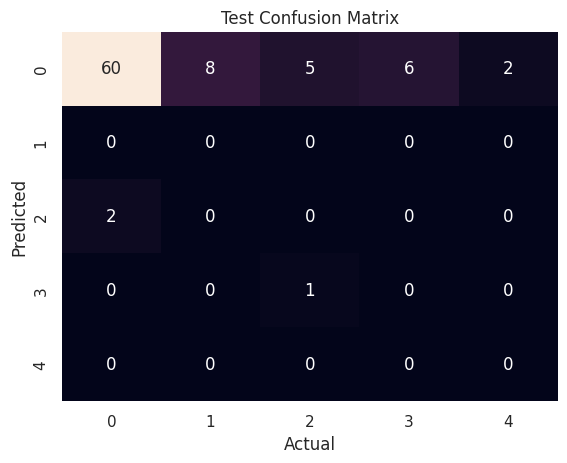

Classification report
              precision    recall  f1-score   support

           0       0.74      0.97      0.84        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.71        84
   macro avg       0.15      0.19      0.17        84
weighted avg       0.55      0.71      0.62        84



In [ ]:
dt_tomek_result=function_model("Decision Tree tomek (Undersampling)",dt, X_train_tomek_std, y_train_tomek, X_test_tomek_std, y_test)

Random Forest (Undersampling)

Model:  Random Forest tomek (Undersampling)
Train Accuracy score:  0.7211538461538461
Test Accuracy score:  0.7380952380952381


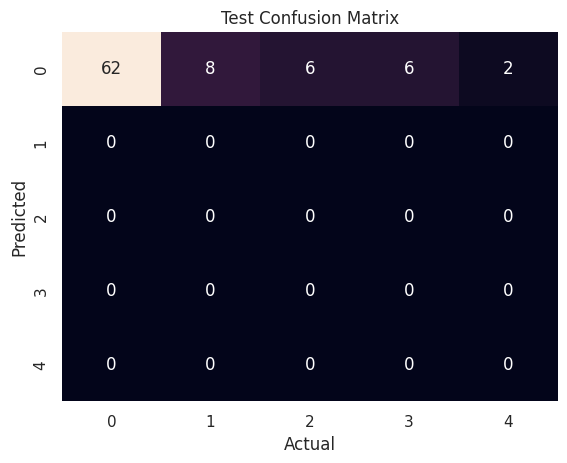

Classification report
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.74        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.54      0.74      0.63        84



In [ ]:
rf_tomek_result=function_model("Random Forest tomek (Undersampling)",rf, X_train_tomek_std, y_train_tomek, X_test_tomek_std, y_test)

Adaboost Tomek Undersampling

Model:  Ada Boost tomek (Undersampling)
Train Accuracy score:  0.7211538461538461
Test Accuracy score:  0.7380952380952381


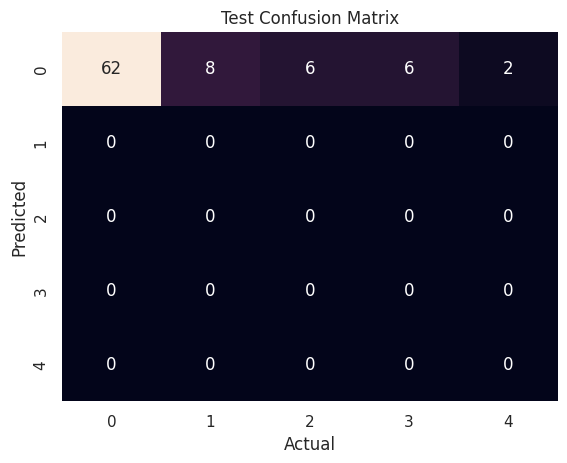

Classification report
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.74        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.54      0.74      0.63        84



In [ ]:
ada_tomek_result=function_model("Ada Boost tomek (Undersampling)",ada_boost, X_train_tomek_std, y_train_tomek, X_test_tomek_std, y_test)

Gradient Boosting Tomek (Undersampling)

Model:  Gradient Boosting tomek (Undersampling)
Train Accuracy score:  0.7211538461538461
Test Accuracy score:  0.7380952380952381


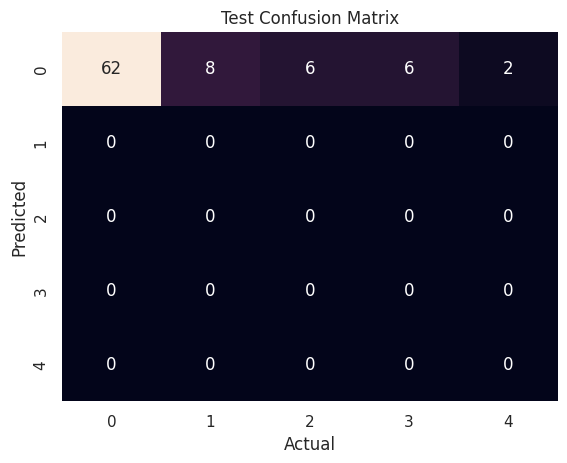

Classification report
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.74        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.54      0.74      0.63        84



In [ ]:
gb_tomek_result=function_model("Gradient Boosting tomek (Undersampling)",grad_boost, X_train_tomek_std, y_train_tomek, X_test_tomek_std, y_test)

XGB Tomek (Undersampling)

Model:  XGB tomek (Undersampling)
Train Accuracy score:  0.9967948717948718
Test Accuracy score:  0.7023809523809523


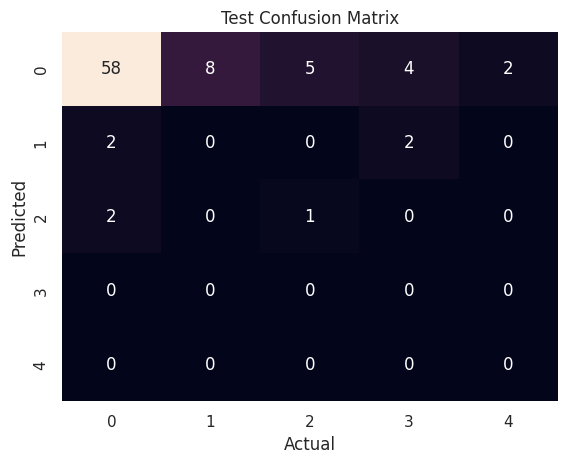

Classification report
              precision    recall  f1-score   support

           0       0.75      0.94      0.83        62
           1       0.00      0.00      0.00         8
           2       0.33      0.17      0.22         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.70        84
   macro avg       0.22      0.22      0.21        84
weighted avg       0.58      0.70      0.63        84



In [ ]:
xgb_tomek_result=function_model("XGB tomek (Undersampling)",xgb_clf, X_train_tomek_std, y_train_tomek, X_test_tomek_std, y_test)

LGBM Tomek (Undersampling)

Model:  Light GBM tomek (Undersampling)
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001139 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 21094
[LightGBM] [Info] Number of data points in the train set: 312, number of used features: 226
[LightGBM] [Info] Start training from score -0.326903
[LightGBM] [Info] Start training from score -2.277267
[LightGBM] [Info] Start training from score -2.524127
[LightGBM] [Info] Start training from score -2.564949
[LightGBM] [Info] Start training from score -3.951244
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

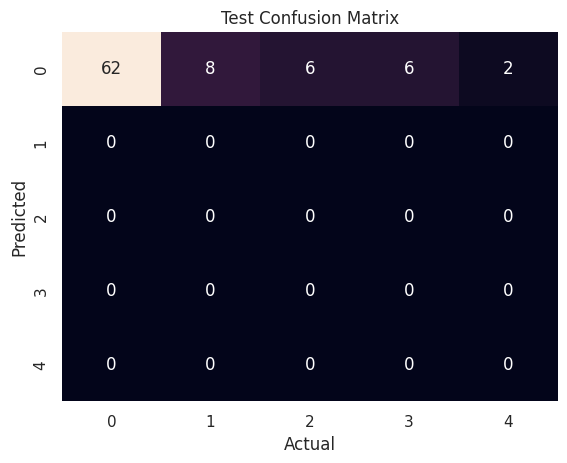

Classification report
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.74        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.54      0.74      0.63        84



In [ ]:
lgbm_tomek_result=function_model("Light GBM tomek (Undersampling)",lgbm, X_train_tomek_std, y_train_tomek, X_test_tomek_std, y_test)

In [ ]:
all_model_summary=all_model_summary.append(lr_tomek_result)
all_model_summary=all_model_summary.append(knn_tomek_result)
all_model_summary=all_model_summary.append(svc_tomek_result)
all_model_summary=all_model_summary.append(dt_tomek_result)
all_model_summary=all_model_summary.append(rf_tomek_result)
all_model_summary=all_model_summary.append(ada_tomek_result)
all_model_summary=all_model_summary.append(gb_tomek_result)
all_model_summary=all_model_summary.append(xgb_tomek_result)
all_model_summary=all_model_summary.append(lgbm_tomek_result)


all_model_summary.reset_index(drop=True, inplace=True)
all_model_summary

Model  Train Accuracy  Test Accuracy  \
0                         Logistic Regression            0.79           0.75   
1                         K Nearest Neighbour            0.74           0.75   
2                                         SVC            0.74           0.74   
3                               Decision Tree            0.75           0.73   
4                               Random Forest            0.74           0.74   
5                                   Ada Boost            0.74           0.74   
6                           Gradient Boosting            0.74           0.74   
7                                         XGB            1.00           0.75   
8                                   Light GBM            0.74           0.74   
9                   Logistic Regression SMOTE            0.96           0.67   
10                  K Nearest Neighbour SMOTE            0.82           0.13   
11                                  SVC SMOTE            0.87           0.71   
12                        Decision Tree SMOTE            0.58           0.07   
13                        Random Forest SMOTE            0.88           0.42   
14                            Ada Boost SMOTE            0.64           0.49   
15                    Gradient Boosting SMOTE            0.94           0.51   
16                                  XGB SMOTE            1.00           0.71   
17                            Light GBM SMOTE            0.93           0.50   
18  Logistic Regression tomek (Undersampling)            0.79           0.75   
19   K Nearest Neighbour tomek(Undersampling)            0.73           0.75   
20                  SVC tomek (Undersampling)            0.72           0.74   
21        Decision Tree tomek (Undersampling)            0.74           0.71   
22        Random Forest tomek (Undersampling)            0.72           0.74   
23            Ada Boost tomek (Undersampling)            0.72           0.74   
24    Gradient Boosting tomek (Undersampling)            0.72           0.74   
25                  XGB tomek (Undersampling)            1.00           0.70   
26            Light GBM tomek (Undersampling)            0.72           0.74   

    Precision  recall  f1 score  
0        0.66    0.75      0.67  
1        0.62    0.75      0.65  
2        0.54    0.74      0.63  
3        0.55    0.73      0.63  
4        0.54    0.74      0.63  
5        0.54    0.74      0.63  
6        0.54    0.74      0.63  
7        0.67    0.75      0.67  
8        0.54    0.74      0.63  
9        0.65    0.67      0.65  
10       0.76    0.13      0.14  
11       0.54    0.71      0.62  
12       0.03    0.07      0.04  
13       0.68    0.42      0.49  
14       0.61    0.49      0.53  
15       0.67    0.51      0.56  
16       0.68    0.71      0.67  
17       0.68    0.50      0.55  
18       0.66    0.75      0.67  
19       0.62    0.75      0.65  
20       0.54    0.74      0.63  
21       0.55    0.71      0.62  
22       0.54    0.74      0.63  
23       0.54    0.74      0.63  
24       0.54    0.74      0.63  
25       0.58    0.70      0.63  
26       0.54    0.74      0.63

In [ ]:
all_model_summary.to_pickle('dataframe.pickle')
all_model_summary.to_pickle('dataframe_original_smote_tomek.pickle')

Since after applying Tomek, only few samples of accident level I has been removed, the model accuracy and other parameters are similar to that of model performance on original data.

However, model performance on original data is better than after performing undersampling or oversampling on data

Word2Vec

In [ ]:
word2vec_model_data=basic_model_data.loc[:,:'season_Winter']

In [ ]:
word2vec_model_data.head(1)

Accident Level  Potential Accident Level  Year  Month  Day  WeekofYear  \
0               0                         3  2016      1    1          53   

   is_holiday  Country_Country_02  Country_Country_03  Local_Local_02  \
0           1                   0                   0               0   

   Local_Local_03  Local_Local_04  Local_Local_05  Local_Local_06  \
0               0               0               0               0   

   Local_Local_07  Local_Local_08  Local_Local_09  Local_Local_10  \
0               0               0               0               0   

   Local_Local_11  Local_Local_12  Industry Sector_Mining  \
0               0               0                       1   

   Industry Sector_Others  Gender_Male  Employee Type_Third Party  \
0                       0            1                          1   

   Employee Type_Third Party (Remote)  Critical Risk_Bees  \
0                                   0                   0   

   Critical Risk_Blocking and isolation of energies  Critical Risk_Burn  \
0                                                 0                   0   

   Critical Risk_Chemical substances  Critical Risk_Confined space  \
0                                  0                             0   

   Critical Risk_Cut  Critical Risk_Electrical Shock  \
0                  0                               0   

   Critical Risk_Electrical installation  Critical Risk_Fall  \
0                                      0                   0   

   Critical Risk_Fall prevention  Critical Risk_Fall prevention (same level)  \
0                              0                                           0   

   Critical Risk_Individual protection equipment  Critical Risk_Liquid Metal  \
0                                              0                           0   

   Critical Risk_Machine Protection  Critical Risk_Manual Tools  \
0                                 0                           0   

   Critical Risk_Others  Critical Risk_Plates  Critical Risk_Poll  \
0                     0                     0                   0   

   Critical Risk_Power lock  Critical Risk_Pressed  \
0                         0                      1   

   Critical Risk_Pressurized Systems  \
0                                  0   

   Critical Risk_Pressurized Systems / Chemical Substances  \
0                                                  0         

   Critical Risk_Projection  Critical Risk_Projection of fragments  \
0                         0                                      0   

   Critical Risk_Projection/Burning  Critical Risk_Projection/Choco  \
0                                 0                               0   

   Critical Risk_Projection/Manual Tools  Critical Risk_Suspended Loads  \
0                                      0                              0   

   Critical Risk_Traffic  Critical Risk_Vehicles and Mobile Equipment  \
0                      0                                            0   

   Critical Risk_Venomous Animals  Critical Risk_remains of choco  \
0                               0                               0   

   Weekday_Monday  Weekday_Saturday  Weekday_Sunday  Weekday_Thursday  \
0               0                 0               0                 0   

   Weekday_Tuesday  Weekday_Wednesday  season_Spring  season_Summer  \
0                0                  0              0              1   

   season_Winter  
0              0

In [ ]:
word2vec_model_data.shape

(418, 66)

In [ ]:
cleaned_data['clean_description']

0      while removing the drill rod of the jumbo for ...
1      during the activation of a sodium sulphide pum...
2      in the substation milpo located at level when ...
3      being am approximately in the nv cx ob the per...
4      approximately at am in circumstances that the ...
                             ...                        
413    being approximately am approximately when lift...
414    the collaborator moved from the infrastructure...
415    during the environmental monitoring activity i...
416    the employee performed the activity of strippi...
417    at am when the assistant cleaned the floor of ...
Name: clean_description, Length: 418, dtype: object

In [ ]:
sentences = [sentence.split() for sentence in cleaned_data['clean_description']]
w2v_model = Word2Vec(sentences, min_count=5, workers=4, vector_size=200)

In [ ]:
words11 = w2v_model.wv.key_to_index
len(words11)

759

In [ ]:
len(w2v_model.wv['the'])

200

In [ ]:
def vectorize(sentence):
    words = sentence.split()
    words_vecs = [w2v_model.wv[word] for word in words if word in w2v_model.wv]
    if len(words_vecs) == 0:
        return np.zeros(200)
    words_vecs = np.array(words_vecs)
    return words_vecs.mean(axis=0)

In [ ]:
description_word2vec = np.array([vectorize(sentence) for sentence in cleaned_data['clean_description']])

In [ ]:
pd.DataFrame(description_word2vec).shape

(418, 200)

In [ ]:
word2vec_model_data=pd.concat([word2vec_model_data, pd.DataFrame(description_word2vec)], axis=1)
word2vec_model_data.columns = word2vec_model_data.columns.astype(str)

In [ ]:
word2vec_model_data.head(1)

Accident Level  Potential Accident Level  Year  Month  Day  WeekofYear  \
0               0                         3  2016      1    1          53   

   is_holiday  Country_Country_02  Country_Country_03  Local_Local_02  \
0           1                   0                   0               0   

   Local_Local_03  Local_Local_04  Local_Local_05  Local_Local_06  \
0               0               0               0               0   

   Local_Local_07  Local_Local_08  Local_Local_09  Local_Local_10  \
0               0               0               0               0   

   Local_Local_11  Local_Local_12  Industry Sector_Mining  \
0               0               0                       1   

   Industry Sector_Others  Gender_Male  Employee Type_Third Party  \
0                       0            1                          1   

   Employee Type_Third Party (Remote)  Critical Risk_Bees  \
0                                   0                   0   

   Critical Risk_Blocking and isolation of energies  Critical Risk_Burn  \
0                                                 0                   0   

   Critical Risk_Chemical substances  Critical Risk_Confined space  \
0                                  0                             0   

   Critical Risk_Cut  Critical Risk_Electrical Shock  \
0                  0                               0   

   Critical Risk_Electrical installation  Critical Risk_Fall  \
0                                      0                   0   

   Critical Risk_Fall prevention  Critical Risk_Fall prevention (same level)  \
0                              0                                           0   

   Critical Risk_Individual protection equipment  Critical Risk_Liquid Metal  \
0                                              0                           0   

   Critical Risk_Machine Protection  Critical Risk_Manual Tools  \
0                                 0                           0   

   Critical Risk_Others  Critical Risk_Plates  Critical Risk_Poll  \
0                     0                     0                   0   

   Critical Risk_Power lock  Critical Risk_Pressed  \
0                         0                      1   

   Critical Risk_Pressurized Systems  \
0                                  0   

   Critical Risk_Pressurized Systems / Chemical Substances  \
0                                                  0         

   Critical Risk_Projection  Critical Risk_Projection of fragments  \
0                         0                                      0   

   Critical Risk_Projection/Burning  Critical Risk_Projection/Choco  \
0                                 0                               0   

   Critical Risk_Projection/Manual Tools  Critical Risk_Suspended Loads  \
0                                      0                              0   

   Critical Risk_Traffic  Critical Risk_Vehicles and Mobile Equipment  \
0                      0                                            0   

   Critical Risk_Venomous Animals  Critical Risk_remains of choco  \
0                               0                               0   

   Weekday_Monday  Weekday_Saturday  Weekday_Sunday  Weekday_Thursday  \
0               0                 0               0                 0   

   Weekday_Tuesday  Weekday_Wednesday  season_Spring  season_Summer  \
0                0                  0              0              1   

   season_Winter    0    1    2    3    4     5    6    7     8    9    10  \
0              0 0.02 0.03 0.12 0.15 0.27 -0.28 0.11 0.32 -0.05 0.24 -0.00   

     11    12   13    14    15   16   17    18    19   20    21   22   23  \
0 -0.25 -0.02 0.46 -0.19 -0.03 0.00 0.23 -0.16 -0.52 0.15 -0.05 0.15 0.11   

    24    25   26    27    28   29   30   31   32    33   34   35   36    37  \
0 0.09 -0.05 0.02 -0.09 -0.28 0.08 0.16 0.04 0.29 -0.12 0.00 0.15 0.17 -0.09   

    38    39    40   41    42   43   44    45    46    47   48   49   50   51  \
0 0.03 -0.13 -0.19 0.00 -0.1

In [ ]:
word2vec_model_data.shape

(418, 266)

In [ ]:
X_w2v=word2vec_model_data.drop(columns=['Accident Level','Potential Accident Level'])
y_w2v=word2vec_model_data[['Accident Level']]

In [ ]:
X_w2v.shape, y_w2v.shape

((418, 264), (418, 1))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_w2v, y_w2v, test_size = 0.20, random_state = 42, stratify = y_w2v)

In [ ]:
X_train.shape, y_train.shape

((334, 264), (334, 1))

In [ ]:
X_test.shape, y_test.shape

((84, 264), (84, 1))

In [ ]:
#normalizing the data
ss_w2v = StandardScaler()

X_train_std= ss_w2v.fit_transform(X_train)

X_test_std = ss_w2v.transform(X_test)

In [ ]:
X_train_std=pd.DataFrame(X_train_std, columns= X_train.columns)
X_test_std=pd.DataFrame(X_test_std, columns= X_test.columns)

In [ ]:
X_train_std

Year  Month   Day  WeekofYear  is_holiday  Country_Country_02  \
0   -0.68   0.23 -0.61        0.14       -0.10                1.52   
1   -0.68   0.85 -1.65        0.72       -0.10               -0.66   
2   -0.68   0.85 -1.54        0.72       -0.10               -0.66   
3   -0.68   1.79  1.46        1.93       -0.10               -0.66   
4   -0.68  -0.09  1.11        0.00       -0.10               -0.66   
..    ...    ...   ...         ...         ...                 ...   
329 -0.68   0.54 -0.61        0.43       -0.10               -0.66   
330 -0.68  -1.02 -0.73       -1.07       -0.10               -0.66   
331 -0.68  -0.71  0.08       -0.71       -0.10               -0.66   
332 -0.68   2.11 -0.61        2.00       -0.10               -0.66   
333 -0.68   0.85 -0.04        0.86       -0.10               -0.66   

     Country_Country_03  Local_Local_02  Local_Local_03  Local_Local_04  \
0                 -0.33           -0.24           -0.53           -0.37   
1                 -0.33           -0.24           -0.53            2.67   
2                  3.02           -0.24           -0.53           -0.37   
3                 -0.33           -0.24            1.87           -0.37   
4                 -0.33           -0.24           -0.53            2.67   
..                  ...             ...             ...             ...   
329               -0.33           -0.24           -0.53            2.67   
330               -0.33           -0.24            1.87           -0.37   
331               -0.33           -0.24           -0.53            2.67   
332               -0.33           -0.24           -0.53            2.67   
333               -0.33           -0.24           -0.53           -0.37   

     Local_Local_05  Local_Local_06  Local_Local_07  Local_Local_08  \
0              2.50           -0.36           -0.18           -0.26   
1             -0.40           -0.36           -0.18           -0.26   
2             -0.40           -0.36           -0.18           -0.26   
3             -0.40           -0.36           -0.18           -0.26   
4             -0.40           -0.36           -0.18           -0.26   
..              ...             ...             ...             ...   
329           -0.40           -0.36           -0.18           -0.26   
330           -0.40           -0.36           -0.18           -0.26   
331           -0.40           -0.36           -0.18           -0.26   
332           -0.40           -0.36           -0.18           -0.26   
333           -0.40           -0.36           -0.18           -0.26   

     Local_Local_09  Local_Local_10  Local_Local_11  Local_Local_12  \
0             -0.08           -0.33           -0.05           -0.11   
1             -0.08           -0.33           -0.05           -0.11   
2             -0.08            3.02           -0.05           -0.11   
3             -0.08           -0.33           -0.05           -0.11   
4             -0.08           -0.33           -0.05           -0.11   
..              ...             ...             ...             ...   
329           -0.08           -0.33           -0.05           -0.11   
330           -0.08           -0.33           -0.05           -0.11   
331           -0.08           -0.33           -0.05           -0.11   
332           -0.08           -0.33           -0.05           -0.11   
333           -0.08           -0.33           -0.05           -0.11   

     Industry Sector_Mining  Industry Sector_Others  Gender_Male  \
0                     -1.14                   -0.36         0.24   
1                      0.88                   -0.36         0.24   
2                     -1.14                    2.79         0.24   
3                      0.88                   -0.36         0.24   
4                      0.88                   -0.36         0.24   
..                      ...                     ...          ...   
329                    0.88                   -0.36         0.24   
330          

In [ ]:
all_model_summary=pd.read_pickle('dataframe.pickle')

Model:  Logistic Regression word2vec
Train Accuracy score:  0.7544910179640718
Test Accuracy score:  0.7380952380952381


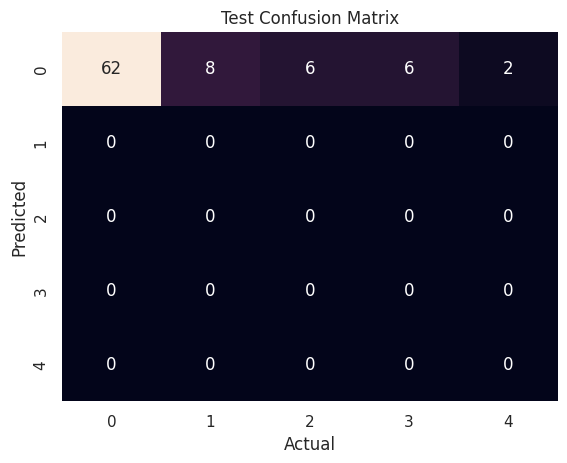

Classification report
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.74        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.54      0.74      0.63        84



In [ ]:

lr= LogisticRegression(C=.01,solver='lbfgs', multi_class='multinomial', random_state = 42)
lr_word2vec_result=function_model("Logistic Regression word2vec",lr, X_train_std, y_train, X_test_std, y_test)

Model:  K Nearest Neighbour word2vec
Train Accuracy score:  0.7425149700598802
Test Accuracy score:  0.7380952380952381


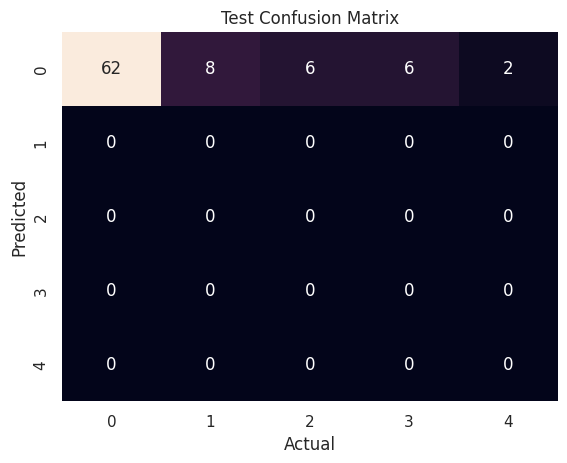

Classification report
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.74        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.54      0.74      0.63        84



In [ ]:
knn=KNeighborsClassifier(n_neighbors=9, metric='minkowski', p=1, weights='uniform', n_jobs=-1)
knn_word2vec_result=function_model("K Nearest Neighbour word2vec",knn,X_train_std, y_train, X_test_std, y_test)

Model:  SVC word2vec
Train Accuracy score:  0.7395209580838323
Test Accuracy score:  0.7380952380952381


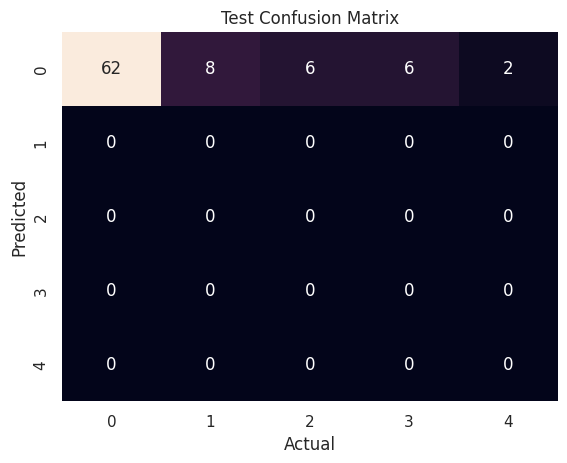

Classification report
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.74        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.54      0.74      0.63        84



In [ ]:
svc=svm.SVC(C=.1, degree=2, gamma=.01, kernel='rbf', random_state=42)
svc_word2vec_result=function_model("SVC word2vec",svc, X_train_std, y_train, X_test_std, y_test)

Model:  Decision Tree word2vec
Train Accuracy score:  0.7574850299401198
Test Accuracy score:  0.7142857142857143


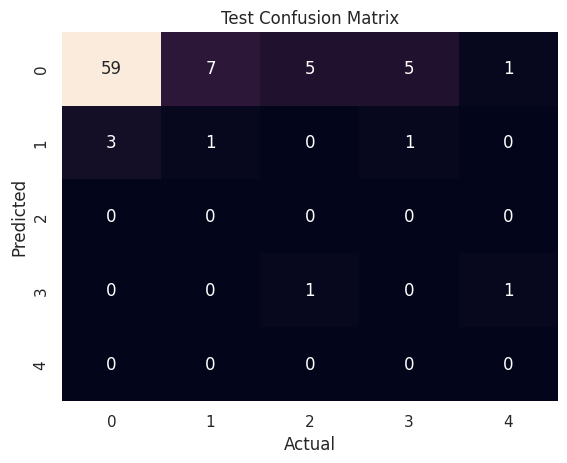

Classification report
              precision    recall  f1-score   support

           0       0.77      0.95      0.85        62
           1       0.20      0.12      0.15         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.71        84
   macro avg       0.19      0.22      0.20        84
weighted avg       0.58      0.71      0.64        84



In [ ]:
dt=DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=3, min_samples_leaf=10, min_samples_split=3)
dt_word2vec_result=function_model("Decision Tree word2vec",dt, X_train_std, y_train, X_test_std, y_test)

Model:  Random Forest word2vec
Train Accuracy score:  0.7395209580838323
Test Accuracy score:  0.7380952380952381


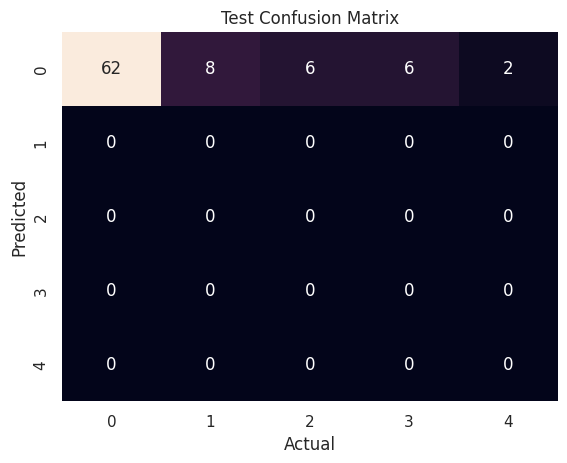

Classification report
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.74        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.54      0.74      0.63        84



In [ ]:
rf=RandomForestClassifier(criterion='gini', random_state=42, max_depth=4, min_samples_leaf=3, min_samples_split=15, n_estimators=100, max_features='sqrt')
rf_word2vec_result=function_model("Random Forest word2vec",rf, X_train_std, y_train, X_test_std, y_test)

Model:  Ada Boost word2vec
Train Accuracy score:  0.7425149700598802
Test Accuracy score:  0.7380952380952381


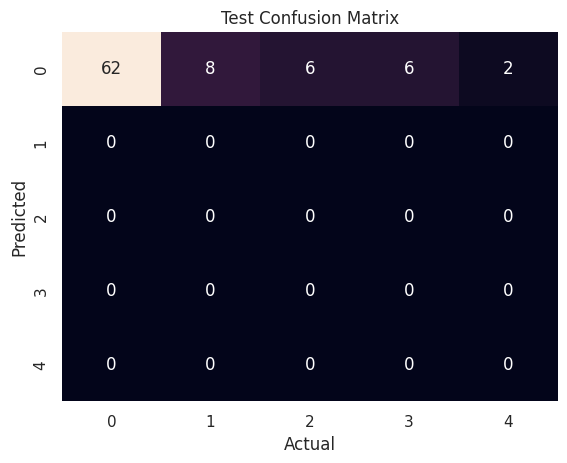

Classification report
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.74        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.54      0.74      0.63        84



In [ ]:
ada_boost= AdaBoostClassifier(random_state=42, n_estimators=75, learning_rate=.1)
ada_word2vec_result=function_model("Ada Boost word2vec",ada_boost, X_train_std, y_train, X_test_std, y_test)

Model:  Gradient Boosting word2vec
Train Accuracy score:  0.7395209580838323
Test Accuracy score:  0.7380952380952381


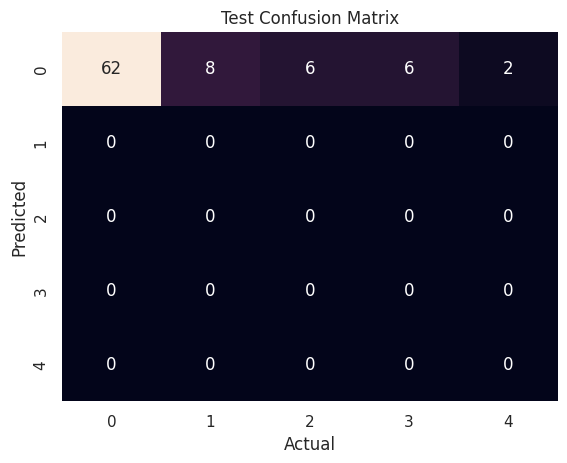

Classification report
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.74        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.54      0.74      0.63        84



In [ ]:
grad_boost= GradientBoostingClassifier(random_state=42, n_estimators=50, learning_rate=.01, max_depth=3, max_features='auto', subsample=.5)
gb_word2vec_result=function_model("Gradient Boosting word2vec",grad_boost, X_train_std, y_train, X_test_std, y_test)

Model:  XGB word2vec
Train Accuracy score:  0.9970059880239521
Test Accuracy score:  0.7261904761904762


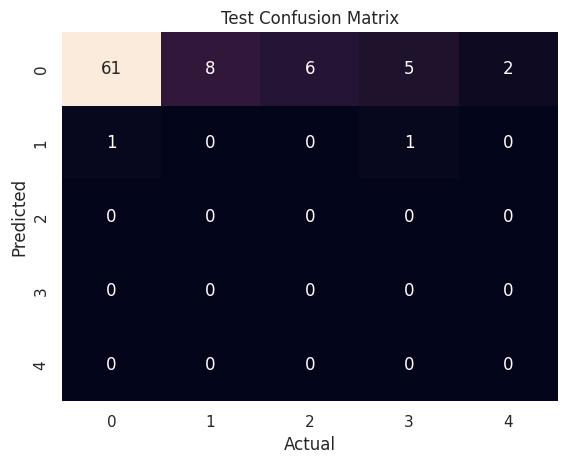

Classification report
              precision    recall  f1-score   support

           0       0.74      0.98      0.85        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.73        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.55      0.73      0.63        84



In [ ]:
xgb_clf = xgb.XGBClassifier(booster='gbtree', learning_rate=.1, max_depth=6, n_estimator=50, sampling_method='uniform', reg_alpha=.7, reg_lambda=.7)
xgb_word2vec_result=function_model("XGB word2vec",xgb_clf, X_train_std, y_train, X_test_std, y_test)

Model:  Light GBM word2vec
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001847 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22578
[LightGBM] [Info] Number of data points in the train set: 334, number of used features: 226
[LightGBM] [Info] Start training from score -0.301753
[LightGBM] [Info] Start training from score -2.345405
[LightGBM] [Info] Start training from score -2.592265
[LightGBM] [Info] Start training from score -2.633087
[LightGBM] [Info] Start training from score -4.019382
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

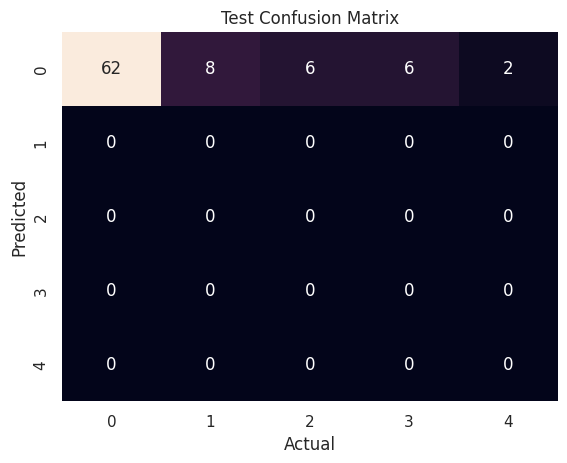

Classification report
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.74        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.54      0.74      0.63        84



In [ ]:

lgbm = LGBMClassifier(colsample_bytree=.8, learning_rate=.01, max_depth=3, n_estimators=50, reg_alpha=.5, reg_lambda=.5)
lgbm_word2vec_result=function_model("Light GBM word2vec",lgbm, X_train_std, y_train, X_test_std, y_test)

In [ ]:
all_model_summary=all_model_summary.append(lr_word2vec_result)
all_model_summary=all_model_summary.append(knn_word2vec_result)
all_model_summary=all_model_summary.append(svc_word2vec_result)
all_model_summary=all_model_summary.append(dt_word2vec_result)
all_model_summary=all_model_summary.append(rf_word2vec_result)
all_model_summary=all_model_summary.append(ada_word2vec_result)
all_model_summary=all_model_summary.append(gb_word2vec_result)
all_model_summary=all_model_summary.append(xgb_word2vec_result)
all_model_summary=all_model_summary.append(lgbm_word2vec_result)

all_model_summary.reset_index(drop=True, inplace=True)
all_model_summary

Model  Train Accuracy  Test Accuracy  \
0                         Logistic Regression            0.79           0.75   
1                         K Nearest Neighbour            0.74           0.75   
2                                         SVC            0.74           0.74   
3                               Decision Tree            0.75           0.73   
4                               Random Forest            0.74           0.74   
5                                   Ada Boost            0.74           0.74   
6                           Gradient Boosting            0.74           0.74   
7                                         XGB            1.00           0.75   
8                                   Light GBM            0.74           0.74   
9                   Logistic Regression SMOTE            0.96           0.67   
10                  K Nearest Neighbour SMOTE            0.82           0.13   
11                                  SVC SMOTE            0.87           0.71   
12                        Decision Tree SMOTE            0.58           0.07   
13                        Random Forest SMOTE            0.88           0.42   
14                            Ada Boost SMOTE            0.64           0.49   
15                    Gradient Boosting SMOTE            0.94           0.51   
16                                  XGB SMOTE            1.00           0.71   
17                            Light GBM SMOTE            0.93           0.50   
18  Logistic Regression tomek (Undersampling)            0.79           0.75   
19   K Nearest Neighbour tomek(Undersampling)            0.73           0.75   
20                  SVC tomek (Undersampling)            0.72           0.74   
21        Decision Tree tomek (Undersampling)            0.74           0.71   
22        Random Forest tomek (Undersampling)            0.72           0.74   
23            Ada Boost tomek (Undersampling)            0.72           0.74   
24    Gradient Boosting tomek (Undersampling)            0.72           0.74   
25                  XGB tomek (Undersampling)            1.00           0.70   
26            Light GBM tomek (Undersampling)            0.72           0.74   
27               Logistic Regression word2vec            0.75           0.74   
28               K Nearest Neighbour word2vec            0.74           0.74   
29                               SVC word2vec            0.74           0.74   
30                     Decision Tree word2vec            0.76           0.71   
31                     Random Forest word2vec            0.74           0.74   
32                         Ada Boost word2vec            0.74           0.74   
33                 Gradient Boosting word2vec            0.74           0.74   
34                               XGB word2vec            1.00           0.73   
35                         Light GBM word2vec            0.74           0.74   

    Precision  recall  f1 score  
0        0.66    0.75      0.67  
1        0.62    0.75      0.65  
2        0.54    0.74      0.63  
3        0.55    0.73      0.63  
4        0.54    0.74      0.63  
5        0.54    0.74      0.63  
6        0.54    0.74      0.63  
7        0.67    0.75      0.67  
8        0.54    0.74      0.63  
9        0.65    0.67      0.65  
10       0.76    0.13      0.14  
11       0.54    0.71      0.62  
12       0.03    0.07      0.04  
13       0.68    0.42      0.49  
14       0.61    0.49      0.53  
15       0.67    0.51      0.56  
16       0.68    0.71      0.67  
17       0.68    0.50      0.55  
18       0.66    0.75      0.67  
19       0.62    0.75      0.65  
20       0.54    0.74      0.63  
21       0.55    0.71      0.62  
22       0.54    0.74      0.63  
23       0.54    0.74      0.63  
24       0.54    0.74      0.63  
25       0.58    0.70      0.63  
26       0.54    0.74      0.63  
27       0.54    0.74      0.63  
28       0.54    0.74      0.63  
29       0.54    0.74      0.63  
30       0.58    0.71    

In [ ]:
all_model_summary.to_pickle('dataframe.pickle')
all_model_summary.to_pickle('dataframe_original_smote_tomek_word2vec.pickle')

TF IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_model_data=basic_model_data.loc[:,:'season_Winter']

In [ ]:
tfidf_model_data.shape

(418, 66)

In [ ]:
tfidf_model_data.head(1)

Accident Level  Potential Accident Level  Year  Month  Day  WeekofYear  \
0               0                         3  2016      1    1          53   

   is_holiday  Country_Country_02  Country_Country_03  Local_Local_02  \
0           1                   0                   0               0   

   Local_Local_03  Local_Local_04  Local_Local_05  Local_Local_06  \
0               0               0               0               0   

   Local_Local_07  Local_Local_08  Local_Local_09  Local_Local_10  \
0               0               0               0               0   

   Local_Local_11  Local_Local_12  Industry Sector_Mining  \
0               0               0                       1   

   Industry Sector_Others  Gender_Male  Employee Type_Third Party  \
0                       0            1                          1   

   Employee Type_Third Party (Remote)  Critical Risk_Bees  \
0                                   0                   0   

   Critical Risk_Blocking and isolation of energies  Critical Risk_Burn  \
0                                                 0                   0   

   Critical Risk_Chemical substances  Critical Risk_Confined space  \
0                                  0                             0   

   Critical Risk_Cut  Critical Risk_Electrical Shock  \
0                  0                               0   

   Critical Risk_Electrical installation  Critical Risk_Fall  \
0                                      0                   0   

   Critical Risk_Fall prevention  Critical Risk_Fall prevention (same level)  \
0                              0                                           0   

   Critical Risk_Individual protection equipment  Critical Risk_Liquid Metal  \
0                                              0                           0   

   Critical Risk_Machine Protection  Critical Risk_Manual Tools  \
0                                 0                           0   

   Critical Risk_Others  Critical Risk_Plates  Critical Risk_Poll  \
0                     0                     0                   0   

   Critical Risk_Power lock  Critical Risk_Pressed  \
0                         0                      1   

   Critical Risk_Pressurized Systems  \
0                                  0   

   Critical Risk_Pressurized Systems / Chemical Substances  \
0                                                  0         

   Critical Risk_Projection  Critical Risk_Projection of fragments  \
0                         0                                      0   

   Critical Risk_Projection/Burning  Critical Risk_Projection/Choco  \
0                                 0                               0   

   Critical Risk_Projection/Manual Tools  Critical Risk_Suspended Loads  \
0                                      0                              0   

   Critical Risk_Traffic  Critical Risk_Vehicles and Mobile Equipment  \
0                      0                                            0   

   Critical Risk_Venomous Animals  Critical Risk_remains of choco  \
0                               0                               0   

   Weekday_Monday  Weekday_Saturday  Weekday_Sunday  Weekday_Thursday  \
0               0                 0               0                 0   

   Weekday_Tuesday  Weekday_Wednesday  season_Spring  season_Summer  \
0                0                  0              0              1   

   season_Winter  
0              0

In [ ]:
#creating tfidf vectors
vectorizer = TfidfVectorizer(max_features = 200)

In [ ]:
# fit and transforming into vectors from the text data
tf_vectors = vectorizer.fit_transform(cleaned_data['clean_description']).toarray()

In [ ]:
# get indexing
print('\nWord indexes:')
print(vectorizer.vocabulary_)

# tf-idf values
print('\ntf-idf values:')
print(tf_vectors)


Word indexes:
{'while': 194, 'the': 164, 'drill': 49, 'of': 125, 'for': 68, 'maintenance': 108, 'to': 173, 'support': 160, 'this': 170, 'mechanic': 110, 'one': 128, 'end': 56, 'on': 127, 'equipment': 57, 'with': 196, 'both': 29, 'bar': 22, 'and': 12, 'from': 70, 'at': 20, 'moment': 115, 'its': 97, 'point': 142, 'between': 27, 'drilling': 50, 'during': 52, 'pump': 146, 'was': 186, 'in': 90, 'area': 16, 'immediately': 88, 'made': 107, 'use': 182, 'level': 103, 'when': 191, 'collaborator': 41, 'work': 197, 'hand': 77, 'hitting': 85, 'rock': 153, 'part': 133, 'it': 96, 'off': 126, 'safety': 154, 'then': 167, 'left': 101, 'foot': 67, 'causing': 36, 'injury': 92, 'being': 25, 'am': 10, 'approximately': 15, 'nv': 124, 'they': 169, 'were': 190, 'bolt': 28, 'that': 163, 'head': 79, 'mr': 120, 'assistant': 19, 'platform': 140, 'pressure': 144, 'key': 98, 'out': 131, 'moments': 116, 'two': 179, 'circumstances': 38, 'company': 42, 'performed': 134, 'cm': 40, 'weight': 189, 'kg': 99, 'as': 18, 'fa

In [ ]:
pd.DataFrame(tf_vectors)

0    1    2    3    4    5    6    7    8    9    10   11   12   13   \
0   0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.13 0.00   
1   0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.28 0.00   
2   0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.07 0.00   
3   0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.12 0.00 0.00 0.00   
4   0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.15 0.00 0.17 0.00   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
413 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.21 0.00 0.00 0.23 0.00 0.00 0.00   
414 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.10 0.00   
415 0.00 0.00 0.00 0.00 0.00 0.16 0.00 0.00 0.00 0.00 0.00 0.00 0.08 0.00   
416 0.00 0.00 0.00 0.00 0.00 0.20 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.31   
417 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.27 0.00 0.10 0.00   

     14   15   16   17   18   19   20   21   22   23   24   25   26   27   \
0   0.00 0.00 0.00 0.00 0.00 0.00 0.05 0.00 0.45 0.00 0.00 0.00 0.00 0.10   
1   0.00 0.00 0.20 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
2   0.00 0.00 0.15 0.00 0.00 0.00 0.08 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
3   0.00 0.11 0.00 0.00 0.00 0.11 0.00 0.00 0.00 0.00 0.00 0.11 0.00 0.00   
4   0.00 0.13 0.00 0.00 0.15 0.00 0.07 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
413 0.00 0.42 0.00 0.00 0.00 0.21 0.00 0.00 0.00 0.00 0.00 0.21 0.00 0.00   
414 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
415 0.00 0.00 0.18 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.20 0.00 0.00   
416 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
417 0.00 0.00 0.00 0.00 0.00 0.24 0.13 0.27 0.00 0.00 0.00 0.00 0.00 0.00   

     28   29   30   31   32   33   34   35   36   37   38   39   40   41   \
0   0.00 0.13 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
1   0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
2   0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.10 0.00 0.00 0.00 0.00 0.30   
3   0.42 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.07 0.00 0.00 0.00 0.00 0.00   
4   0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.08 0.00 0.14 0.00 0.30 0.00   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
413 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
414 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.29 0.00 0.00 0.00 0.00 0.22   
415 0.00 0.00 0.00 0.14 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
416 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.15 0.00 0.00 0.00 0.00 0.00   
417 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   

     42   43   44   45   46   47   48   49   50   51   52   53   54   55   \
0   0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.26 0.13 0.00 0.00 0.00 0.00 0.00   
1   0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.18 0.00 0.00 0.00   
2   0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
3   0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
4   0.16 0.00 0.00 0.00 0.13 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
413 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
414 0.00 0.00 0.00 0.00 0.24 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
415 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.32 0.00 0.14 0.00   
416 0.00 0.00 0.27 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.17 0.00   
417 0.00 0.00 0.00 0.00 0.24 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   

     56   57   58   59   60   61   62   63   64   65   66   67   68   69   \
0   0.12 0.09 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.08 0.00   
1   0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
2   0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.19 0.00 0.00 

In [ ]:
tfidf_model_data=pd.concat([tfidf_model_data, pd.DataFrame(tf_vectors)], axis=1)
tfidf_model_data.columns = tfidf_model_data.columns.astype(str)

In [ ]:
tfidf_model_data.shape

(418, 266)

In [ ]:
tfidf_model_data.head(1)

Accident Level  Potential Accident Level  Year  Month  Day  WeekofYear  \
0               0                         3  2016      1    1          53   

   is_holiday  Country_Country_02  Country_Country_03  Local_Local_02  \
0           1                   0                   0               0   

   Local_Local_03  Local_Local_04  Local_Local_05  Local_Local_06  \
0               0               0               0               0   

   Local_Local_07  Local_Local_08  Local_Local_09  Local_Local_10  \
0               0               0               0               0   

   Local_Local_11  Local_Local_12  Industry Sector_Mining  \
0               0               0                       1   

   Industry Sector_Others  Gender_Male  Employee Type_Third Party  \
0                       0            1                          1   

   Employee Type_Third Party (Remote)  Critical Risk_Bees  \
0                                   0                   0   

   Critical Risk_Blocking and isolation of energies  Critical Risk_Burn  \
0                                                 0                   0   

   Critical Risk_Chemical substances  Critical Risk_Confined space  \
0                                  0                             0   

   Critical Risk_Cut  Critical Risk_Electrical Shock  \
0                  0                               0   

   Critical Risk_Electrical installation  Critical Risk_Fall  \
0                                      0                   0   

   Critical Risk_Fall prevention  Critical Risk_Fall prevention (same level)  \
0                              0                                           0   

   Critical Risk_Individual protection equipment  Critical Risk_Liquid Metal  \
0                                              0                           0   

   Critical Risk_Machine Protection  Critical Risk_Manual Tools  \
0                                 0                           0   

   Critical Risk_Others  Critical Risk_Plates  Critical Risk_Poll  \
0                     0                     0                   0   

   Critical Risk_Power lock  Critical Risk_Pressed  \
0                         0                      1   

   Critical Risk_Pressurized Systems  \
0                                  0   

   Critical Risk_Pressurized Systems / Chemical Substances  \
0                                                  0         

   Critical Risk_Projection  Critical Risk_Projection of fragments  \
0                         0                                      0   

   Critical Risk_Projection/Burning  Critical Risk_Projection/Choco  \
0                                 0                               0   

   Critical Risk_Projection/Manual Tools  Critical Risk_Suspended Loads  \
0                                      0                              0   

   Critical Risk_Traffic  Critical Risk_Vehicles and Mobile Equipment  \
0                      0                                            0   

   Critical Risk_Venomous Animals  Critical Risk_remains of choco  \
0                               0                               0   

   Weekday_Monday  Weekday_Saturday  Weekday_Sunday  Weekday_Thursday  \
0               0                 0               0                 0   

   Weekday_Tuesday  Weekday_Wednesday  season_Spring  season_Summer  \
0                0                  0              0              1   

   season_Winter    0    1    2    3    4    5    6    7    8    9   10   11  \
0              0 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   

    12   13   14   15   16   17   18   19   20   21   22   23   24   25   26  \
0 0.13 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.05 0.00 0.45 0.00 0.00 0.00 0.00   

    27   28   29   30   31   32   33   34   35   36   37   38   39   40   41  \
0 0.10 0.00 0.13 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   

    42   43   44   45   46   47   48   49   50   51   52   53   54   55   56  \
0 0.00 0.00 0.00 0.

In [ ]:
X_tfidf=tfidf_model_data.drop(columns=['Accident Level','Potential Accident Level'])
y_tfidf=tfidf_model_data[['Accident Level']]

In [ ]:
X_tfidf.shape, y_tfidf.shape

((418, 264), (418, 1))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_tfidf, test_size = 0.20, random_state = 42, stratify = y_tfidf)

In [ ]:
#normalizing the data
ss_tfidf = StandardScaler()
X_train_std= ss_tfidf.fit_transform(X_train)
X_test_std = ss_tfidf.transform(X_test)

X_train_std=pd.DataFrame(X_train_std, columns= X_train.columns)
X_test_std=pd.DataFrame(X_test_std, columns= X_test.columns)

In [ ]:
X_train_std.head(1)

Year  Month   Day  WeekofYear  is_holiday  Country_Country_02  \
0 -0.68   0.23 -0.61        0.14       -0.10                1.52   

   Country_Country_03  Local_Local_02  Local_Local_03  Local_Local_04  \
0               -0.33           -0.24           -0.53           -0.37   

   Local_Local_05  Local_Local_06  Local_Local_07  Local_Local_08  \
0            2.50           -0.36           -0.18           -0.26   

   Local_Local_09  Local_Local_10  Local_Local_11  Local_Local_12  \
0           -0.08           -0.33           -0.05           -0.11   

   Industry Sector_Mining  Industry Sector_Others  Gender_Male  \
0                   -1.14                   -0.36         0.24   

   Employee Type_Third Party  Employee Type_Third Party (Remote)  \
0                      -0.92                                2.53   

   Critical Risk_Bees  Critical Risk_Blocking and isolation of energies  \
0               -0.16                                             -0.08   

   Critical Risk_Burn  Critical Risk_Chemical substances  \
0               -0.05                              -0.21   

   Critical Risk_Confined space  Critical Risk_Cut  \
0                         -0.05              -0.18   

   Critical Risk_Electrical Shock  Critical Risk_Electrical installation  \
0                           -0.05                                  -0.05   

   Critical Risk_Fall  Critical Risk_Fall prevention  \
0               -0.17                          -0.14   

   Critical Risk_Fall prevention (same level)  \
0                                       -0.12   

   Critical Risk_Individual protection equipment  Critical Risk_Liquid Metal  \
0                                          -0.05                       -0.08   

   Critical Risk_Machine Protection  Critical Risk_Manual Tools  \
0                             -0.05                        4.78   

   Critical Risk_Others  Critical Risk_Plates  Critical Risk_Poll  \
0                 -1.13                  0.00               -0.05   

   Critical Risk_Power lock  Critical Risk_Pressed  \
0                     -0.10                  -0.22   

   Critical Risk_Pressurized Systems  \
0                              -0.14   

   Critical Risk_Pressurized Systems / Chemical Substances  \
0                                              -0.10         

   Critical Risk_Projection  Critical Risk_Projection of fragments  \
0                     -0.18                                  -0.05   

   Critical Risk_Projection/Burning  Critical Risk_Projection/Choco  \
0                             -0.05                           -0.05   

   Critical Risk_Projection/Manual Tools  Critical Risk_Suspended Loads  \
0                                   0.00                          -0.14   

   Critical Risk_Traffic  Critical Risk_Vehicles and Mobile Equipment  \
0                  -0.05                                        -0.16   

   Critical Risk_Venomous Animals  Critical Risk_remains of choco  \
0                           -0.17                           -0.11   

   Weekday_Monday  Weekday_Saturday  Weekday_Sunday  Weekday_Thursday  \
0           -0.37             -0.40           -0.34             -0.46   

   Weekday_Tuesday  Weekday_Wednesday  season_Spring  season_Summer  \
0            -0.45              -0.42          -0.39          -0.84   

   season_Winter     0     1     2     3     4     5     6     7     8     9  \
0          -0.35 -0.21 -0.27 -0.41 -0.19 -0.22 -0.46 -0.32 -0.32 -0.17 -0.19   

     10    11    12    13    14    15    16    17    18    19    20    21  \
0 -0.25 -0.38 -1.16 -0.19 -0.17 -0.33 -0.39 -0.22 -0.28 -0.32 -0.88 -0.25   

     22    23    24    25    26    27    28    29    30    31    32    33  \
0 -0.15 -0.18 -0.24 -0.31 -0.18 -0.34 -0.16 -0.22 -0.19 -0.54 -0.21 -0.14   

     34    35   36    37    38    39    40    41    42    43    44    45  \
0 -0.22 -0.19 1.31 -0.23 -0.29 -0.25 -0.25 -0.36 -0.22 -0.21 -0.25 -0.17   

     46    47    48    49    50    51   

In [ ]:
X_train_std.shape, X_test_std.shape

((334, 264), (84, 264))

In [ ]:
y_train.shape, y_test.shape

((334, 1), (84, 1))

In [ ]:
all_model_summary=pd.read_pickle('dataframe.pickle')

TFIDF Logistic Regression

Model:  Logistic Regression tfidf
Train Accuracy score:  0.8083832335329342
Test Accuracy score:  0.7142857142857143


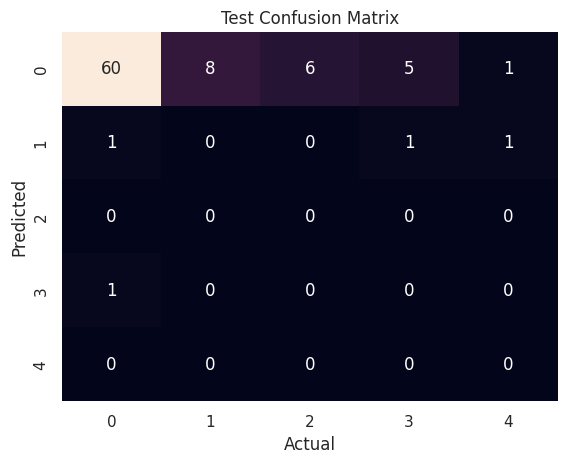

Classification report
              precision    recall  f1-score   support

           0       0.75      0.97      0.85        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.71        84
   macro avg       0.15      0.19      0.17        84
weighted avg       0.55      0.71      0.62        84



In [ ]:
lr= LogisticRegression(C=.01,solver='lbfgs', multi_class='multinomial', random_state = 42)
lr_tfidf_result=function_model("Logistic Regression tfidf",lr, X_train_std, y_train, X_test_std, y_test)

KNN TFIDF

Model:  K Nearest Neighbour tfidf
Train Accuracy score:  0.7425149700598802
Test Accuracy score:  0.7380952380952381


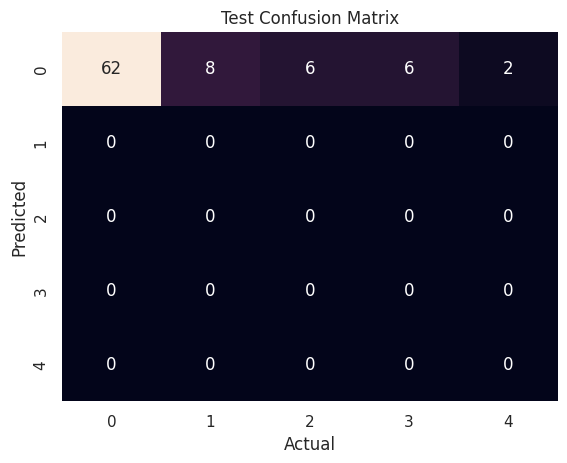

Classification report
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.74        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.54      0.74      0.63        84



In [ ]:
knn=KNeighborsClassifier(n_neighbors=9, metric='minkowski', p=1, weights='uniform', n_jobs=-1)
knn_tfidf_result=function_model("K Nearest Neighbour tfidf",knn,X_train_std, y_train, X_test_std, y_test)

SVC TFIDF

Model:  SVC tfidf
Train Accuracy score:  0.7395209580838323
Test Accuracy score:  0.7380952380952381


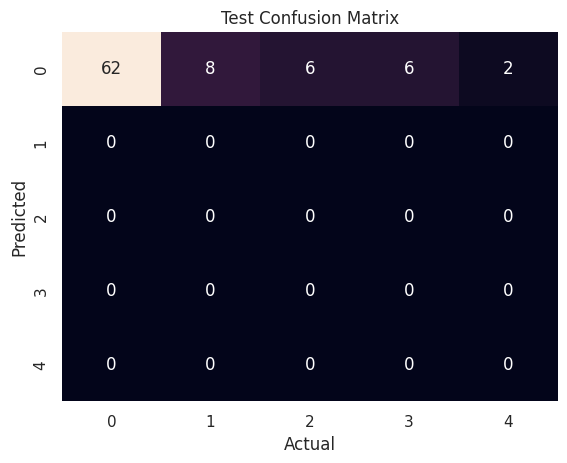

Classification report
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.74        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.54      0.74      0.63        84



In [ ]:
svc=svm.SVC(C=.1, degree=2, gamma=.01, kernel='rbf', random_state=42)
svc_tfidf_result=function_model("SVC tfidf",svc, X_train_std, y_train, X_test_std, y_test)


Decision Tree TFIDF

Model:  Decision Tree tfidf
Train Accuracy score:  0.7425149700598802
Test Accuracy score:  0.7261904761904762


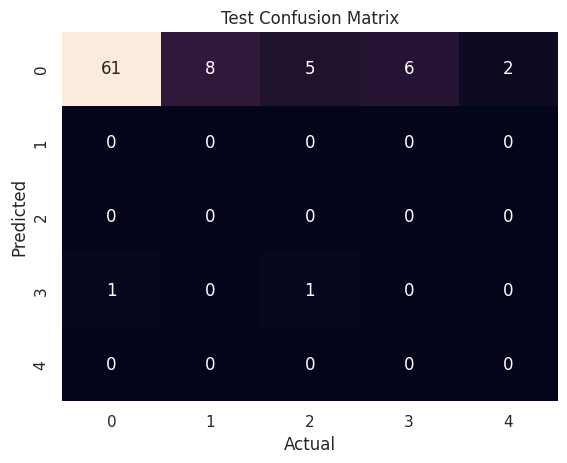

Classification report
              precision    recall  f1-score   support

           0       0.74      0.98      0.85        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.73        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.55      0.73      0.63        84



In [ ]:
dt=DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=3, min_samples_leaf=10, min_samples_split=3)
dt_tfidf_result=function_model("Decision Tree tfidf",dt, X_train_std, y_train, X_test_std, y_test)

Random Forest TFIDF

Model:  Random Forest tfidf 
Train Accuracy score:  0.7395209580838323
Test Accuracy score:  0.7380952380952381


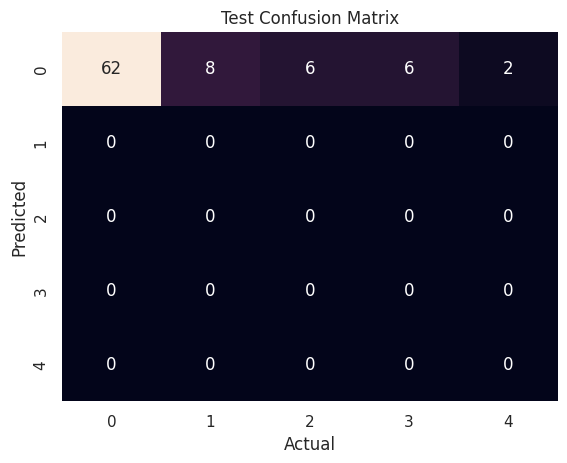

Classification report
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.74        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.54      0.74      0.63        84



In [ ]:
rf=RandomForestClassifier(criterion='gini', random_state=42, max_depth=4, min_samples_leaf=3, min_samples_split=15,                                  n_estimators=100, max_features='sqrt')
rf_tfidf_result=function_model("Random Forest tfidf ",rf, X_train_std, y_train, X_test_std, y_test)

Ada boost TFIDF

Model:  Ada Boost tfidf 
Train Accuracy score:  0.7455089820359282
Test Accuracy score:  0.7380952380952381


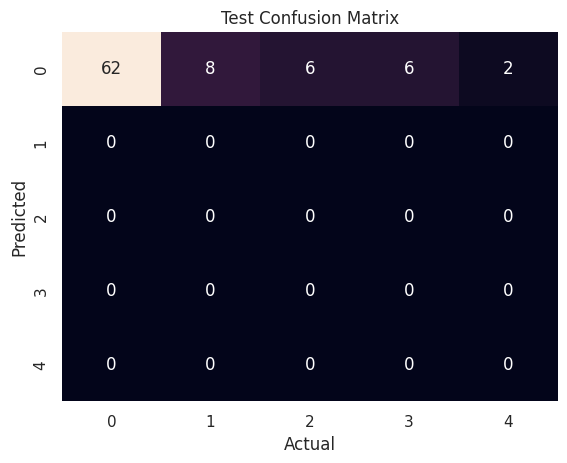

Classification report
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.74        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.54      0.74      0.63        84



In [ ]:
ada_boost= AdaBoostClassifier(random_state=42, n_estimators=75, learning_rate=.1)
ada_tfidf_result=function_model("Ada Boost tfidf ",ada_boost, X_train_std, y_train, X_test_std, y_test)

Grad Boost TFIDF

Model:  Gradient Boosting tfidf 
Train Accuracy score:  0.7395209580838323
Test Accuracy score:  0.7380952380952381


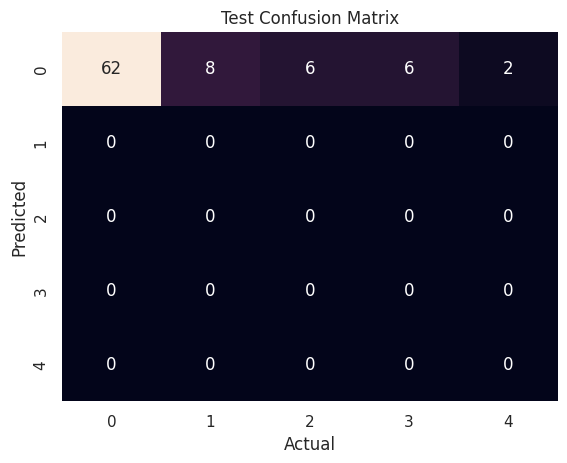

Classification report
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.74        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.54      0.74      0.63        84



In [ ]:
grad_boost= GradientBoostingClassifier(random_state=42, n_estimators=50, learning_rate=.01, max_depth=3, max_features='auto', subsample=.5)
gb_tfidf_result=function_model("Gradient Boosting tfidf ",grad_boost, X_train_std, y_train, X_test_std, y_test)

XGB TFIDF

Model:  XGB tfidf 
Train Accuracy score:  0.9970059880239521
Test Accuracy score:  0.7261904761904762


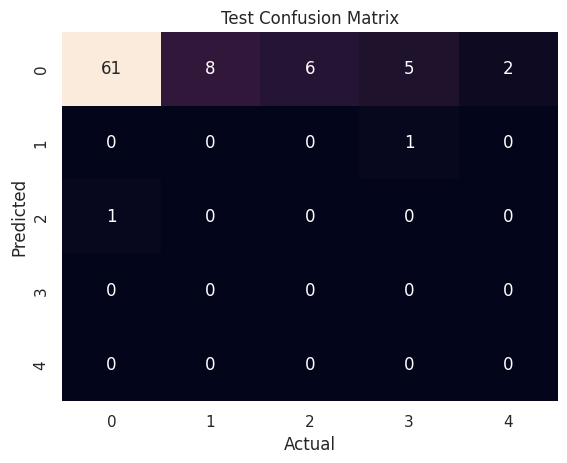

Classification report
              precision    recall  f1-score   support

           0       0.74      0.98      0.85        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.73        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.55      0.73      0.63        84



In [ ]:
xgb_clf = xgb.XGBClassifier(booster='gbtree', learning_rate=.1, max_depth=6, n_estimator=50, sampling_method='uniform', reg_alpha=.7, reg_lambda=.7)
xgb_tfidf_result=function_model("XGB tfidf ",xgb_clf, X_train_std, y_train, X_test_std, y_test)

LGBM TFIDF

Model:  Light GBM tfidf 
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000765 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2607
[LightGBM] [Info] Number of data points in the train set: 334, number of used features: 136
[LightGBM] [Info] Start training from score -0.301753
[LightGBM] [Info] Start training from score -2.345405
[LightGBM] [Info] Start training from score -2.592265
[LightGBM] [Info] Start training from score -2.633087
[LightGBM] [Info] Start training from score -4.019382
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

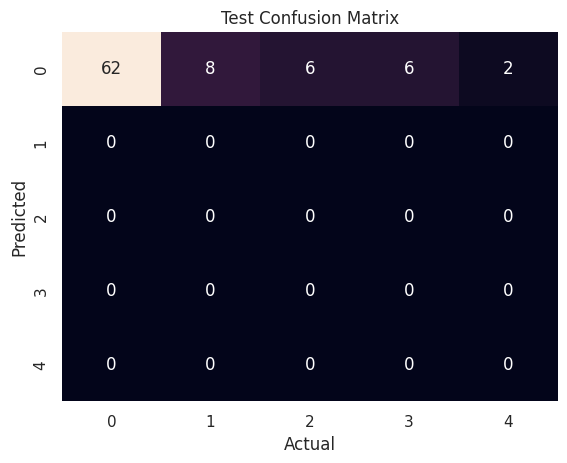

Classification report
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.74        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.54      0.74      0.63        84



In [ ]:
lgbm = LGBMClassifier(colsample_bytree=.8, learning_rate=.01, max_depth=3, n_estimators=50, reg_alpha=.5, reg_lambda=.5)
lgbm_tfidf_result=function_model("Light GBM tfidf ",lgbm, X_train_std, y_train, X_test_std, y_test)

In [ ]:
all_model_summary=all_model_summary.append(lr_tfidf_result)
all_model_summary=all_model_summary.append(knn_tfidf_result)
all_model_summary=all_model_summary.append(svc_tfidf_result)
all_model_summary=all_model_summary.append(dt_tfidf_result)
all_model_summary=all_model_summary.append(rf_tfidf_result)
all_model_summary=all_model_summary.append(ada_tfidf_result)
all_model_summary=all_model_summary.append(gb_tfidf_result)
all_model_summary=all_model_summary.append(xgb_tfidf_result)
all_model_summary=all_model_summary.append(lgbm_tfidf_result)

all_model_summary.reset_index(drop=True, inplace=True)

In [ ]:
all_model_summary

Model  Train Accuracy  Test Accuracy  \
0                         Logistic Regression            0.79           0.75   
1                         K Nearest Neighbour            0.74           0.75   
2                                         SVC            0.74           0.74   
3                               Decision Tree            0.75           0.73   
4                               Random Forest            0.74           0.74   
5                                   Ada Boost            0.74           0.74   
6                           Gradient Boosting            0.74           0.74   
7                                         XGB            1.00           0.75   
8                                   Light GBM            0.74           0.74   
9                   Logistic Regression SMOTE            0.96           0.67   
10                  K Nearest Neighbour SMOTE            0.82           0.13   
11                                  SVC SMOTE            0.87           0.71   
12                        Decision Tree SMOTE            0.58           0.07   
13                        Random Forest SMOTE            0.88           0.42   
14                            Ada Boost SMOTE            0.64           0.49   
15                    Gradient Boosting SMOTE            0.94           0.51   
16                                  XGB SMOTE            1.00           0.71   
17                            Light GBM SMOTE            0.93           0.50   
18  Logistic Regression tomek (Undersampling)            0.79           0.75   
19   K Nearest Neighbour tomek(Undersampling)            0.73           0.75   
20                  SVC tomek (Undersampling)            0.72           0.74   
21        Decision Tree tomek (Undersampling)            0.74           0.71   
22        Random Forest tomek (Undersampling)            0.72           0.74   
23            Ada Boost tomek (Undersampling)            0.72           0.74   
24    Gradient Boosting tomek (Undersampling)            0.72           0.74   
25                  XGB tomek (Undersampling)            1.00           0.70   
26            Light GBM tomek (Undersampling)            0.72           0.74   
27               Logistic Regression word2vec            0.75           0.74   
28               K Nearest Neighbour word2vec            0.74           0.74   
29                               SVC word2vec            0.74           0.74   
30                     Decision Tree word2vec            0.76           0.71   
31                     Random Forest word2vec            0.74           0.74   
32                         Ada Boost word2vec            0.74           0.74   
33                 Gradient Boosting word2vec            0.74           0.74   
34                               XGB word2vec            1.00           0.73   
35                         Light GBM word2vec            0.74           0.74   
36                  Logistic Regression tfidf            0.81           0.71   
37                  K Nearest Neighbour tfidf            0.74           0.74   
38                                  SVC tfidf            0.74           0.74   
39                        Decision Tree tfidf            0.74           0.73   
40                       Random Forest tfidf             0.74           0.74   
41                           Ada Boost tfidf             0.75           0.74   
42                   Gradient Boosting tfidf             0.74           0.74   
43                                 XGB tfidf             1.00           0.73   
44                           Light GBM tfidf             0.74           0.74   

    Precision  recall  f1 score  
0        0.66    0.75      0.67  
1        0.62    0.75      0.65  
2        0.54    0.74      0.63  
3        0.55    0.73      0.63  
4        0.54    0.74      0.63  
5        0.54    0.74      0.63  
6        0.54    0.74      0.63  
7        0.67    0.75      0.67  
8        0.54    0.74      0.63  
9        0.65    0.

In [ ]:
all_model_summary.to_pickle('dataframe.pickle')
all_model_summary.to_pickle('dataframe_original_smote_tomek_word2vec_tfidf.pickle')

Performance of Glove on original data

In [ ]:
all_model_summary.iloc[:9,:]

Model  Train Accuracy  Test Accuracy  Precision  recall  \
0  Logistic Regression            0.79           0.75       0.66    0.75   
1  K Nearest Neighbour            0.74           0.75       0.62    0.75   
2                  SVC            0.74           0.74       0.54    0.74   
3        Decision Tree            0.75           0.73       0.55    0.73   
4        Random Forest            0.74           0.74       0.54    0.74   
5            Ada Boost            0.74           0.74       0.54    0.74   
6    Gradient Boosting            0.74           0.74       0.54    0.74   
7                  XGB            1.00           0.75       0.67    0.75   
8            Light GBM            0.74           0.74       0.54    0.74   

   f1 score  
0      0.67  
1      0.65  
2      0.63  
3      0.63  
4      0.63  
5      0.63  
6      0.63  
7      0.67  
8      0.63

Glove performance on Upsampled data

In [ ]:
all_model_summary.iloc[9:18,:]

Model  Train Accuracy  Test Accuracy  Precision  \
9   Logistic Regression SMOTE            0.96           0.67       0.65   
10  K Nearest Neighbour SMOTE            0.82           0.13       0.76   
11                  SVC SMOTE            0.87           0.71       0.54   
12        Decision Tree SMOTE            0.58           0.07       0.03   
13        Random Forest SMOTE            0.88           0.42       0.68   
14            Ada Boost SMOTE            0.64           0.49       0.61   
15    Gradient Boosting SMOTE            0.94           0.51       0.67   
16                  XGB SMOTE            1.00           0.71       0.68   
17            Light GBM SMOTE            0.93           0.50       0.68   

    recall  f1 score  
9     0.67      0.65  
10    0.13      0.14  
11    0.71      0.62  
12    0.07      0.04  
13    0.42      0.49  
14    0.49      0.53  
15    0.51      0.56  
16    0.71      0.67  
17    0.50      0.55

Glove performance on Undersample data

In [ ]:
all_model_summary.iloc[18:27,:]

Model  Train Accuracy  Test Accuracy  \
18  Logistic Regression tomek (Undersampling)            0.79           0.75   
19   K Nearest Neighbour tomek(Undersampling)            0.73           0.75   
20                  SVC tomek (Undersampling)            0.72           0.74   
21        Decision Tree tomek (Undersampling)            0.74           0.71   
22        Random Forest tomek (Undersampling)            0.72           0.74   
23            Ada Boost tomek (Undersampling)            0.72           0.74   
24    Gradient Boosting tomek (Undersampling)            0.72           0.74   
25                  XGB tomek (Undersampling)            1.00           0.70   
26            Light GBM tomek (Undersampling)            0.72           0.74   

    Precision  recall  f1 score  
18       0.66    0.75      0.67  
19       0.62    0.75      0.65  
20       0.54    0.74      0.63  
21       0.55    0.71      0.62  
22       0.54    0.74      0.63  
23       0.54    0.74      0.63  
24       0.54    0.74      0.63  
25       0.58    0.70      0.63  
26       0.54    0.74      0.63

Word2vec performance on original data

In [ ]:
all_model_summary.iloc[27:36,:]

Model  Train Accuracy  Test Accuracy  Precision  \
27  Logistic Regression word2vec            0.75           0.74       0.54   
28  K Nearest Neighbour word2vec            0.74           0.74       0.54   
29                  SVC word2vec            0.74           0.74       0.54   
30        Decision Tree word2vec            0.76           0.71       0.58   
31        Random Forest word2vec            0.74           0.74       0.54   
32            Ada Boost word2vec            0.74           0.74       0.54   
33    Gradient Boosting word2vec            0.74           0.74       0.54   
34                  XGB word2vec            1.00           0.73       0.55   
35            Light GBM word2vec            0.74           0.74       0.54   

    recall  f1 score  
27    0.74      0.63  
28    0.74      0.63  
29    0.74      0.63  
30    0.71      0.64  
31    0.74      0.63  
32    0.74      0.63  
33    0.74      0.63  
34    0.73      0.63  
35    0.74      0.63

TFIDF performance on original data

In [ ]:
all_model_summary.iloc[36:45,:]

Model  Train Accuracy  Test Accuracy  Precision  \
36  Logistic Regression tfidf            0.81           0.71       0.55   
37  K Nearest Neighbour tfidf            0.74           0.74       0.54   
38                  SVC tfidf            0.74           0.74       0.54   
39        Decision Tree tfidf            0.74           0.73       0.55   
40       Random Forest tfidf             0.74           0.74       0.54   
41           Ada Boost tfidf             0.75           0.74       0.54   
42   Gradient Boosting tfidf             0.74           0.74       0.54   
43                 XGB tfidf             1.00           0.73       0.55   
44           Light GBM tfidf             0.74           0.74       0.54   

    recall  f1 score  
36    0.71      0.62  
37    0.74      0.63  
38    0.74      0.63  
39    0.73      0.63  
40    0.74      0.63  
41    0.74      0.63  
42    0.74      0.63  
43    0.73      0.63  
44    0.74      0.63

**Observations based on basic ML model performance**

- It seems best to work with imbalanced data rather than applying upsampling or downsampling
- Of all the basic ML models, Logistic regression seems to be best performing model across test accuracy, precision, recall, f1 score having train and test accuracy almost near as compared to other models indicating there isn't much overfitting.
- After Logistic regression, XGB seems to be performing well almost similar in all aspects except training accuracy, it seems XGB is overfitting based on train and test accuracy score. One thing to note is that XGB takes much more time to execute that Logistic regression hence if speed is of importance than Logistic regression will be a better choice
- Rest of models on imbalanced data seems to be perfoming well but seems to be losing compared to Logistic Regression on either of precision, recall or f1 metric score
- It can be seen that TFIDF and word2vec are giving similar performance. However Glove seems to be giving slight better performance for Logistic regression and XGB
- We are able to achieve  maximum of 75% accuracy on test data, since predicting accident level seems importance as it involves human facing injuries we need to increase Test accuracy. For that we will need more number of quality data.


# Milestone 2

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

pd.set_option('display.float_format', lambda x: '{:,.2f}'.format(x))
pd.set_option('display.max_columns', None)

sns.set(style="whitegrid", color_codes=True)

import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import Word2Vec, KeyedVectors



from sklearn.model_selection import train_test_split


from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score, roc_auc_score

import pickle
import gensim.downloader as api
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.layers import  LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping ,ReduceLROnPlateau
from imblearn.over_sampling import SMOTE

Importing  Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Navigating to drive path where data source is
%cd '/content/drive/MyDrive/Colab/Capstone Project'
#%cd '/content/drive/MyDrive/Colab/Capstone Project'

/content/drive/.shortcut-targets-by-id/1ZnjQmwDAMDdU-EOFEljEjwY3DAyrLLn4/Capstone Project


In [ ]:
#lets read the clean data from CSV
cleaned_data=pd.read_csv('cleaned_IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv')

In [ ]:
#lets validate shape
cleaned_data.shape

(418, 16)

In [ ]:
cleaned_data.head(1)

Country     Local Industry Sector Accident Level  \
0  Country_01  Local_01          Mining              I   

  Potential Accident Level Gender Employee Type Critical Risk  Year  Month  \
0                       IV   Male   Third Party       Pressed  2016      1   

   Day Weekday  WeekofYear  season  is_holiday  \
0    1  Friday          53  Summer           1   

                                   clean_description  
0  while removing the drill rod of the jumbo for ...

Creating one more feature which will colate data of all the columns, so performing some preprocessing steps

In [ ]:
label_encoder=LabelEncoder()
cleaned_data['Accident Level']=label_encoder.fit_transform(cleaned_data['Accident Level'])

In [ ]:
y=tf.keras.utils.to_categorical(cleaned_data['Accident Level'])

In [ ]:
y.shape

(418, 5)

In [ ]:
y

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
#dropping Accident Level, Potential accident level from data
cleaned_data.drop(columns=['Accident Level','Potential Accident Level'], axis=1, inplace=True)

In [ ]:
cleaned_data.head(1)

Country     Local Industry Sector Gender Employee Type Critical Risk  \
0  Country_01  Local_01          Mining   Male   Third Party       Pressed   

   Year  Month  Day Weekday  WeekofYear  season  is_holiday  \
0  2016      1    1  Friday          53  Summer           1   

                                   clean_description  
0  while removing the drill rod of the jumbo for ...

In [ ]:
cleaned_data['is_holiday'] = cleaned_data['is_holiday'].map({1: 'Yes', 0: 'No'}).astype(str)

In [ ]:
month_map = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

# Map month numbers to names and convert the column to string
cleaned_data['Month'] = cleaned_data['Month'].map(month_map).astype(str)

In [ ]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Country            418 non-null    object
 1   Local              418 non-null    object
 2   Industry Sector    418 non-null    object
 3   Gender             418 non-null    object
 4   Employee Type      418 non-null    object
 5   Critical Risk      418 non-null    object
 6   Year               418 non-null    int64 
 7   Month              418 non-null    object
 8   Day                418 non-null    int64 
 9   Weekday            418 non-null    object
 10  WeekofYear         418 non-null    int64 
 11  season             418 non-null    object
 12  is_holiday         418 non-null    object
 13  clean_description  418 non-null    object
dtypes: int64(3), object(11)
memory usage: 45.8+ KB


In [ ]:
cleaned_data.head(1)

Country     Local Industry Sector Gender Employee Type Critical Risk  \
0  Country_01  Local_01          Mining   Male   Third Party       Pressed   

   Year    Month  Day Weekday  WeekofYear  season is_holiday  \
0  2016  January    1  Friday          53  Summer        Yes   

                                   clean_description  
0  while removing the drill rod of the jumbo for ...

In [ ]:
cleaned_data['Month'].value_counts()

February     61
April        51
June         51
March        50
May          40
January      39
July         24
September    24
December     23
August       21
October      21
November     13
Name: Month, dtype: int64

In [ ]:
cleaned_data['is_holiday'].value_counts()

No     414
Yes      4
Name: is_holiday, dtype: int64

In [ ]:
#creating new feature which concatenates value of all the feature

abc=''
for i in cleaned_data.columns:
  abc= abc + i + ' ' +cleaned_data[i].astype('str')+ ' '

In [ ]:
cleaned_data['all_description']=abc

In [ ]:
#striping of extra spaces
cleaned_data['all_description'] = cleaned_data['all_description'].str.strip()

In [ ]:
cleaned_data['all_description'][0]

'Country Country_01 Local Local_01 Industry Sector Mining Gender Male Employee Type Third Party Critical Risk Pressed Year 2016 Month January Day 1 Weekday Friday WeekofYear 53 season Summer is_holiday Yes clean_description while removing the drill rod of the jumbo for maintenance the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo'

In [ ]:
#splitting data into test and train set
X_train, X_test, y_train, y_test = train_test_split(cleaned_data['all_description'],y, test_size=0.2,random_state=42, stratify=y)

In [ ]:
X_train.shape, X_test.shape

((334,), (84,))

In [ ]:
y_train.shape, y_test.shape

((334, 5), (84, 5))

### Build Tokenizer

In [ ]:
desired_vocab_size = 10000 #Vocablury size

In [ ]:
t= tf.keras.preprocessing.text.Tokenizer(num_words=desired_vocab_size)

In [ ]:
t.fit_on_texts(X_train.tolist())

In [ ]:
#print word index
print(t.word_index)

{'the': 1, 'of': 2, 'local': 3, 'country': 4, 'employee': 5, 'to': 6, 'and': 7, 'is': 8, 'in': 9, 'a': 10, 'no': 11, 'was': 12, 'type': 13, 'clean': 14, 'day': 15, 'risk': 16, 'industry': 17, 'sector': 18, 'gender': 19, 'critical': 20, 'year': 21, 'month': 22, 'weekday': 23, 'weekofyear': 24, 'season': 25, 'holiday': 26, 'description': 27, 'male': 28, 'at': 29, '01': 30, 'that': 31, 'on': 32, '2016': 33, 'others': 34, 'with': 35, 'his': 36, 'when': 37, 'mining': 38, 'third': 39, 'party': 40, 'he': 41, 'hand': 42, 'summer': 43, 'left': 44, 'from': 45, 'causing': 46, 'it': 47, 'autumn': 48, 'right': 49, '02': 50, 'by': 51, '03': 52, '2017': 53, 'metals': 54, 'operator': 55, 'for': 56, 'which': 57, 'injury': 58, 'time': 59, 'activity': 60, 'during': 61, 'area': 62, 'moment': 63, 'equipment': 64, 'pipe': 65, 'work': 66, 'collaborator': 67, 'thursday': 68, 'accident': 69, 'this': 70, 'level': 71, 'finger': 72, '10': 73, 'an': 74, 'one': 75, 'friday': 76, 'tuesday': 77, 'assistant': 78, 'not

In [ ]:
#length
len(t.word_index)

2975

### Preparing training and test data

In [ ]:
X_train = t.texts_to_sequences(X_train.tolist())
X_test = t.texts_to_sequences(X_test.tolist())

In [ ]:
max_review_length=max(len(seq) for seq in X_train)

In [ ]:
max_review_length

215

### Pad sequences

In [ ]:
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train,
                                                        maxlen=max_review_length,
                                                        padding='pre',
                                                        truncating='post')
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test,
                                                       maxlen=max_review_length,
                                                       padding='pre',
                                                       truncating='post')

In [ ]:
X_train.shape, X_test.shape

((334, 215), (84, 215))

In [ ]:
# Specify the file path where you want to save the pickled data
file_path = 'data_padded.pkl'

# Create a dictionary to hold all the data objects
data_dict = {'X_train': X_train, 'X_test': X_test, 'y_train': y_train, 'y_test': y_test}

# Pickle the data dictionary
with open(file_path, 'wb') as f:
    pickle.dump(data_dict, f)

### Loading glove

In [ ]:
#glove_model = api.load('glove-wiki-gigaword-200')

In [ ]:
#pickle model for later use
#with open('glove_model.pkl', 'wb') as f:
#    pickle.dump(glove_model, f)

with open('glove_model.pkl', 'rb') as f:
    glove_model = pickle.load(f)


### getting pre-trained embedding

In [ ]:
embedding_vector_length = glove_model.vector_size
embedding_vector_length

200

In [ ]:
#preparing embeeding matrix
embedding_matrix = np.zeros((desired_vocab_size + 1, embedding_vector_length))

In [ ]:
for word, i in sorted(t.word_index.items(),key=lambda x:x[1]):
    if i > (desired_vocab_size+1):
        break
    try:
        embedding_vector = glove_model[word] #Reading word's embedding from Glove model for a given word
        embedding_matrix[i] = embedding_vector
    except:
        pass

In [ ]:
embedding_matrix.shape

(10001, 200)

In [ ]:
#storing embeeding matrix
with open('glove_embeeding_matrix.pkl', 'wb') as f:
    pickle.dump(embedding_matrix, f)

In [ ]:
# Specify the file path from which to load the pickled data
file_path = 'data_padded.pkl'

# Load the pickled data dictionary
with open(file_path, 'rb') as f:
    data_dict = pickle.load(f)

# Extract X_train, X_test, y_train, and y_test from the data dictionary
X_train = data_dict['X_train']
X_test = data_dict['X_test']
y_train = data_dict['y_train']
y_test = data_dict['y_test']

with open('glove_model.pkl', 'rb') as f:
    glove_model = pickle.load(f)

embedding_vector_length = glove_model.vector_size

with open('glove_embeeding_matrix.pkl', 'rb') as f:
    embedding_matrix = pickle.load(f)

desired_vocab_size = 10000 #Vocablury size

max_review_length=max(len(seq) for seq in X_train)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((334, 215), (84, 215), (334, 5), (84, 5))

In [ ]:
def function_model(model_name,model, history, x_train, y_train, x_test, y_test):
  print('Model: ', model_name)

  #model.fit(x_train, y_train)

#y_pred=model.predict(x_test)
  y_pred_multiclass=model.predict(x_test)
  y_pred= np.argmax(y_pred_multiclass,axis=1)

  y_test=np.argmax(y_test,axis=1)


  train_accuracy_score= history.history['accuracy'][-1]
  test_accuracy_score=  history.history['val_accuracy'] [-1]

  print('Train Accuracy score: ', train_accuracy_score)
  print('Test Accuracy score: ', test_accuracy_score)

  cm=metrics.confusion_matrix(y_test, y_pred)
  cm=pd.DataFrame(cm)
  sns.heatmap(cm.T, annot=True, fmt='g', cbar=False);
  plt.title('Test Confusion Matrix')
  plt.xlabel('Actual')
  plt.ylabel('Predicted')
  plt.show()

  print('Classification report')
  print(classification_report(y_test, y_pred))

  precision=precision_score(y_test, y_pred, average='weighted')
  recall=recall_score(y_test, y_pred, average='weighted')
  f1=f1_score(y_test, y_pred, average='weighted')

  #Plotting loss and accuracy for both the models
  fig, axes = plt.subplots(1, 2, figsize=(10, 5))
  fig.suptitle('Loss and Accuracy Model: '+ model_name)

  axes[0].plot(history.history['loss'], label='Training Loss')
  axes[0].plot(history.history['val_loss'], label='Validation Loss')
  axes[0].set_xlabel('Epochs')
  axes[0].set_ylabel('Loss')
  axes[0].set_title('Loss')
  axes[0].legend()

  axes[1].plot(history.history['accuracy'], label='Training Accuracy')
  axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
  axes[1].set_xlabel('Epochs')
  axes[1].set_ylabel('Accuracy')
  axes[1].set_title('Accuracy')
  axes[1].legend()

  # Adjust spacing between subplots
  plt.tight_layout()

  # Show the subplots
  plt.show()

  #saving model
  model.save('./saved_models/' + model_name + '.h5')

  result=pd.DataFrame({ 'Model' : [model_name],
                 'Train Accuracy' : train_accuracy_score,
                 'Test Accuracy': test_accuracy_score,
                 'Precision': precision,
                 'recall' : recall,
                 'f1 score':f1
                })

  return result

In [ ]:
ann_model_summary=  pd.DataFrame()

## Step 1: Design, train and test Neural networks classifiers

### Trying 2 Dense layers

In [ ]:
#preparing model

tf.keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = tf.keras.Sequential()

model.add(tf.keras.layers.Embedding(desired_vocab_size + 1, #Vocablury size
                                    embedding_vector_length, #Embedding size
                                    weights=[embedding_matrix], #Embeddings taken from pre-trained model
                                    trainable=False, #As embeddings are already available, we will not train this layer. It will act as lookup layer.
                                    input_length=max_review_length) #Number of words in each review
          )

#Flatten the data as we will use Dense layers
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))

model.add(tf.keras.layers.Dense(5, activation='softmax')) #output


#model summary
model.summary()


#Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history=model.fit(X_train,y_train, validation_data=(X_test,y_test),
                   epochs=20,
                   batch_size=32,
                   verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 215, 200)          2000200   
                                                                 
 flatten (Flatten)           (None, 43000)             0         
                                                                 
 dense (Dense)               (None, 128)               5504128   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 5)                 325       
                                                                 
Total params: 7512909 (28.66 MB)
Trainable params: 5512709 (21.03 MB)
Non-trainable params: 2000200 (7.63 MB)
_________________________________________________________________
Epoch 1/20
1

Model:  ANN_2_Layers
3/3 [==============================] - 0s 4ms/step
Train Accuracy score:  0.9970059990882874
Test Accuracy score:  0.7023809552192688


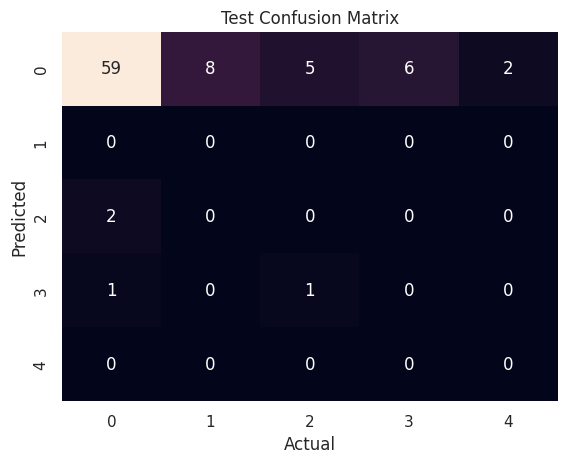

Classification report
              precision    recall  f1-score   support

           0       0.74      0.95      0.83        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.70        84
   macro avg       0.15      0.19      0.17        84
weighted avg       0.54      0.70      0.61        84



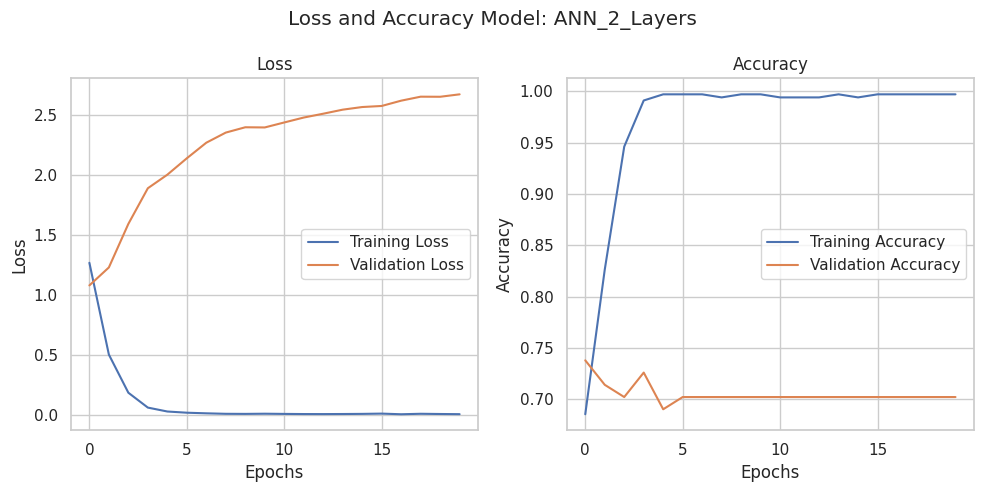

In [ ]:
result=function_model("ANN_2_Layers",model, history, X_train,y_train,X_test,y_test)
ann_model_summary=ann_model_summary.append(result)
ann_model_summary.reset_index(drop=True, inplace=True)

### Trying 3 Dense layers

In [ ]:
#preparing model

tf.keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = tf.keras.Sequential()

model.add(tf.keras.layers.Embedding(desired_vocab_size + 1, #Vocablury size
                                    embedding_vector_length, #Embedding size
                                    weights=[embedding_matrix], #Embeddings taken from pre-trained model
                                    trainable=False, #As embeddings are already available, we will not train this layer. It will act as lookup layer.
                                    input_length=max_review_length) #Number of words in each review
          )

#Flatten the data as we will use Dense layers
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(256, activation='relu', input_shape=()))
model.add(tf.keras.layers.Dense(128, activation='relu', input_shape=()))
model.add(tf.keras.layers.Dense(64, activation='relu'))

model.add(tf.keras.layers.Dense(5, activation='softmax')) #output


#model summary
model.summary()


#Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history=model.fit(X_train,y_train, validation_data=(X_test,y_test),
                   epochs=20,
                   batch_size=32,
                   verbose=1)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 215, 200)          2000200   
                                                                 
 flatten (Flatten)           (None, 43000)             0         
                                                                 
 dense (Dense)               (None, 256)               11008256  
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 5)                 325       
                                                                 
Total params: 13049933 (49.78 MB)
Trainable params: 1104

Model:  ANN_3_Layers
3/3 [==============================] - 0s 4ms/step
Train Accuracy score:  0.9970059990882874
Test Accuracy score:  0.7142857313156128


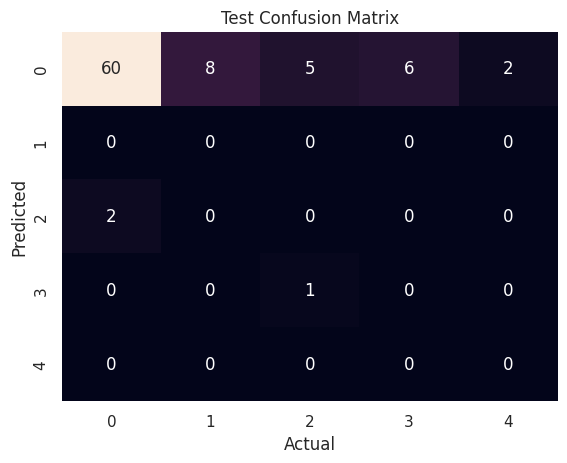

Classification report
              precision    recall  f1-score   support

           0       0.74      0.97      0.84        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.71        84
   macro avg       0.15      0.19      0.17        84
weighted avg       0.55      0.71      0.62        84



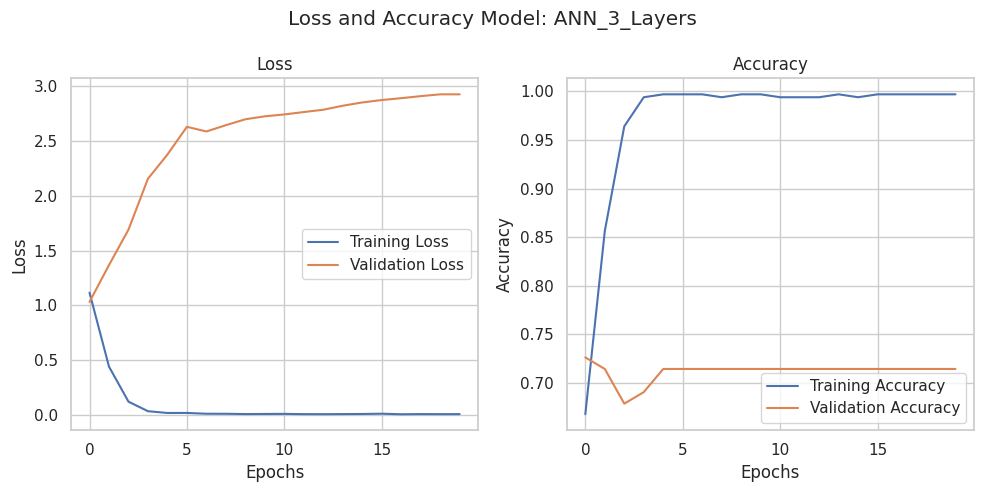

In [ ]:
result=function_model("ANN_3_Layers",model, history, X_train,y_train,X_test,y_test)
ann_model_summary=ann_model_summary.append(result)
ann_model_summary.reset_index(drop=True, inplace=True)

### Trying with 4 Dense layer

In [ ]:
#preparing model

tf.keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = tf.keras.Sequential()

model.add(tf.keras.layers.Embedding(desired_vocab_size + 1, #Vocablury size
                                    embedding_vector_length, #Embedding size
                                    weights=[embedding_matrix], #Embeddings taken from pre-trained model
                                    trainable=False, #As embeddings are already available, we will not train this layer. It will act as lookup layer.
                                    input_length=max_review_length) #Number of words in each review
          )

#Flatten the data as we will use Dense layers
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))

model.add(tf.keras.layers.Dense(5, activation='softmax')) #output


#model summary
model.summary()


#Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history=model.fit(X_train,y_train, validation_data=(X_test,y_test),
                   epochs=20,
                   batch_size=32,
                   verbose=1)



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 215, 200)          2000200   
                                                                 
 flatten (Flatten)           (None, 43000)             0         
                                                                 
 dense (Dense)               (None, 256)               11008256  
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 5)                 1

Model:  ANN_4_Layers
3/3 [==============================] - 0s 3ms/step
Train Accuracy score:  0.9970059990882874
Test Accuracy score:  0.6785714030265808


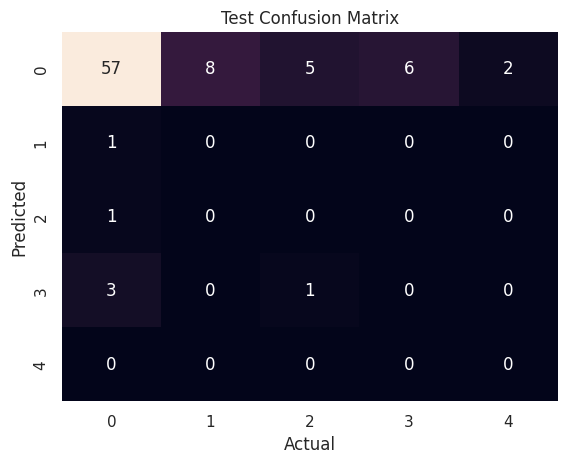

Classification report
              precision    recall  f1-score   support

           0       0.73      0.92      0.81        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.68        84
   macro avg       0.15      0.18      0.16        84
weighted avg       0.54      0.68      0.60        84



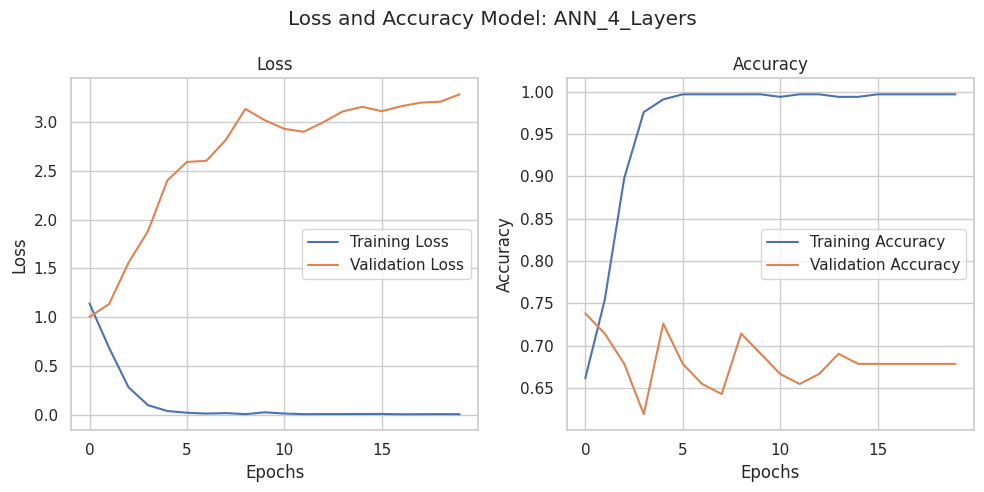

In [ ]:
result=function_model("ANN_4_Layers",model, history, X_train,y_train,X_test,y_test)
ann_model_summary=ann_model_summary.append(result)
ann_model_summary.reset_index(drop=True, inplace=True)

### Trying with 5 Dense

In [ ]:
#preparing model

tf.keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = tf.keras.Sequential()

model.add(tf.keras.layers.Embedding(desired_vocab_size + 1, #Vocablury size
                                    embedding_vector_length, #Embedding size
                                    weights=[embedding_matrix], #Embeddings taken from pre-trained model
                                    trainable=False, #As embeddings are already available, we will not train this layer. It will act as lookup layer.
                                    input_length=max_review_length) #Number of words in each review
          )

#Flatten the data as we will use Dense layers
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))

model.add(tf.keras.layers.Dense(5, activation='softmax')) #output


#model summary
model.summary()


#Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history=model.fit(X_train,y_train, validation_data=(X_test,y_test),
                   epochs=20,
                   batch_size=32,
                   verbose=1)



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 215, 200)          2000200   
                                                                 
 flatten (Flatten)           (None, 43000)             0         
                                                                 
 dense (Dense)               (None, 256)               11008256  
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                5

Model:  ANN_5_Layers
3/3 [==============================] - 0s 3ms/step
Train Accuracy score:  0.9970059990882874
Test Accuracy score:  0.6785714030265808


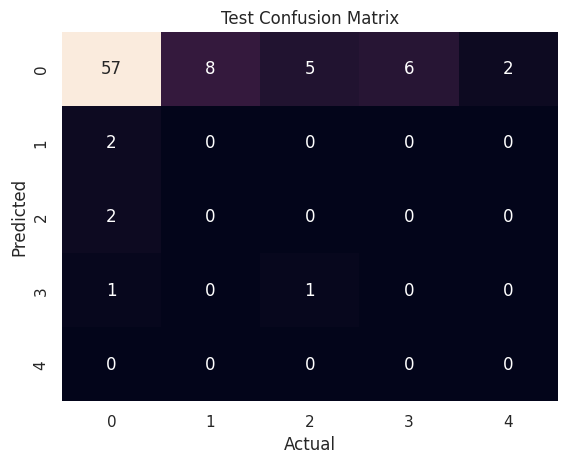

Classification report
              precision    recall  f1-score   support

           0       0.73      0.92      0.81        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.68        84
   macro avg       0.15      0.18      0.16        84
weighted avg       0.54      0.68      0.60        84



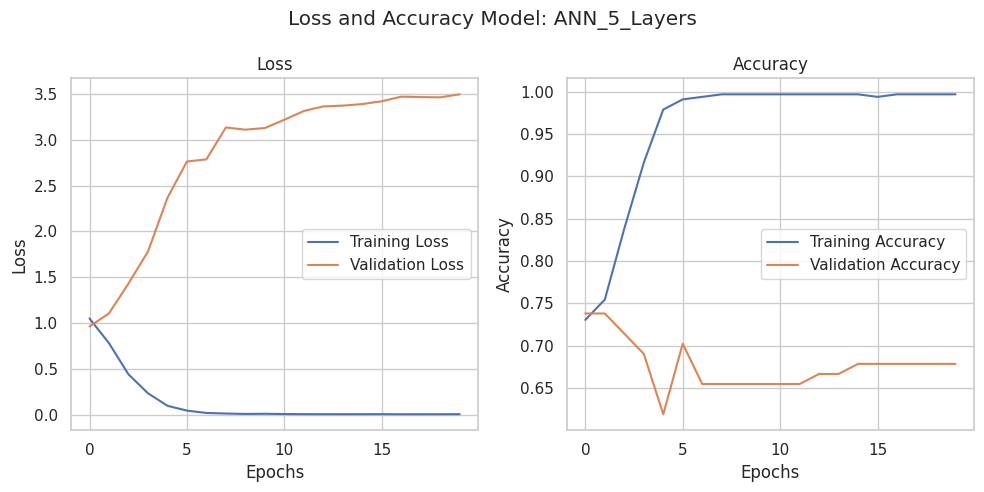

In [ ]:
result=function_model("ANN_5_Layers",model, history, X_train,y_train,X_test,y_test)
ann_model_summary=ann_model_summary.append(result)
ann_model_summary.reset_index(drop=True, inplace=True)

Since Accuracy is increasing slightly lets try with 6 Dense layer

### Trying with 6 Dense

In [ ]:
#preparing model

tf.keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = tf.keras.Sequential()

model.add(tf.keras.layers.Embedding(desired_vocab_size + 1, #Vocablury size
                                    embedding_vector_length, #Embedding size
                                    weights=[embedding_matrix], #Embeddings taken from pre-trained model
                                    trainable=False, #As embeddings are already available, we will not train this layer. It will act as lookup layer.
                                    input_length=max_review_length) #Number of words in each review
          )

#Flatten the data as we will use Dense layers
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))

model.add(tf.keras.layers.Dense(5, activation='softmax')) #output


#model summary
model.summary()


#Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history=model.fit(X_train,y_train, validation_data=(X_test,y_test),
                   epochs=20,
                   batch_size=32,
                   verbose=1)



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 215, 200)          2000200   
                                                                 
 flatten (Flatten)           (None, 43000)             0         
                                                                 
 dense (Dense)               (None, 256)               11008256  
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                5

Model:  ANN_6_Layers
3/3 [==============================] - 0s 3ms/step
Train Accuracy score:  0.985029935836792
Test Accuracy score:  0.6785714030265808


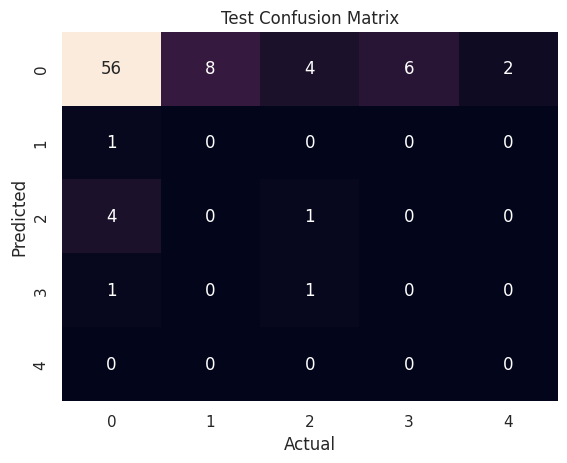

Classification report
              precision    recall  f1-score   support

           0       0.74      0.90      0.81        62
           1       0.00      0.00      0.00         8
           2       0.20      0.17      0.18         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.68        84
   macro avg       0.19      0.21      0.20        84
weighted avg       0.56      0.68      0.61        84



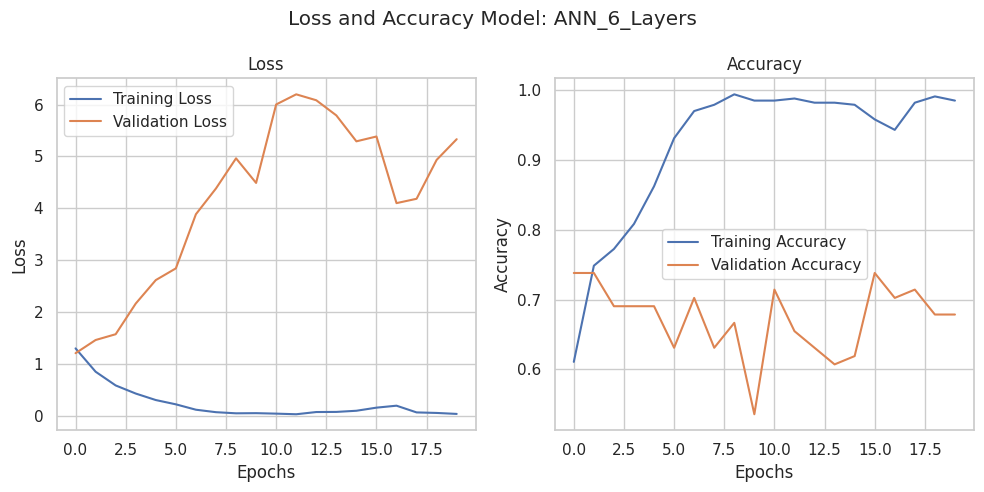

In [ ]:
result=function_model("ANN_6_Layers",model, history, X_train,y_train,X_test,y_test)
ann_model_summary=ann_model_summary.append(result)
ann_model_summary.reset_index(drop=True, inplace=True)

Since accuracy is detoriating, we will not add more Dense layers

In [ ]:
ann_model_summary

Model  Train Accuracy  Test Accuracy  Precision  recall  f1 score
0  ANN_2_Layers            1.00           0.70       0.54    0.70      0.61
1  ANN_3_Layers            1.00           0.71       0.55    0.71      0.62
2  ANN_4_Layers            1.00           0.68       0.54    0.68      0.60
3  ANN_5_Layers            1.00           0.68       0.54    0.68      0.60
4  ANN_6_Layers            0.99           0.68       0.56    0.68      0.61

Of the above models, ANN with 5 layers seems to be perfoming well, so lets explore by adding batchnormalization, dropout, early stopping, more epochs, etc

In [ ]:
ann_model_summary.to_pickle('ann_model_summary.pickle')

### ANN-5 Layers Batchnormalization

In [ ]:
#preparing model

tf.keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = tf.keras.Sequential()

model.add(tf.keras.layers.Embedding(desired_vocab_size + 1, #Vocablury size
                                    embedding_vector_length, #Embedding size
                                    weights=[embedding_matrix], #Embeddings taken from pre-trained model
                                    trainable=False, #As embeddings are already available, we will not train this layer. It will act as lookup layer.
                                    input_length=max_review_length) #Number of words in each review
          )

#Flatten the data as we will use Dense layers
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(5, activation='softmax')) #output


#model summary
model.summary()


#Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history=model.fit(X_train,y_train, validation_data=(X_test,y_test),
                   epochs=40,
                   batch_size=32,
                   verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 215, 200)          2000200   
                                                                 
 flatten (Flatten)           (None, 43000)             0         
                                                                 
 dense (Dense)               (None, 256)               11008256  
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                       

Model:  ANN_5_Layers_BN
3/3 [==============================] - 0s 4ms/step
Train Accuracy score:  0.9880239367485046
Test Accuracy score:  0.6547619104385376


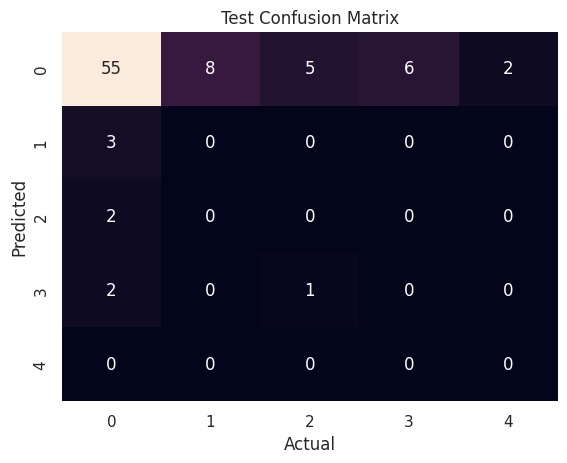

Classification report
              precision    recall  f1-score   support

           0       0.72      0.89      0.80        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.65        84
   macro avg       0.14      0.18      0.16        84
weighted avg       0.53      0.65      0.59        84



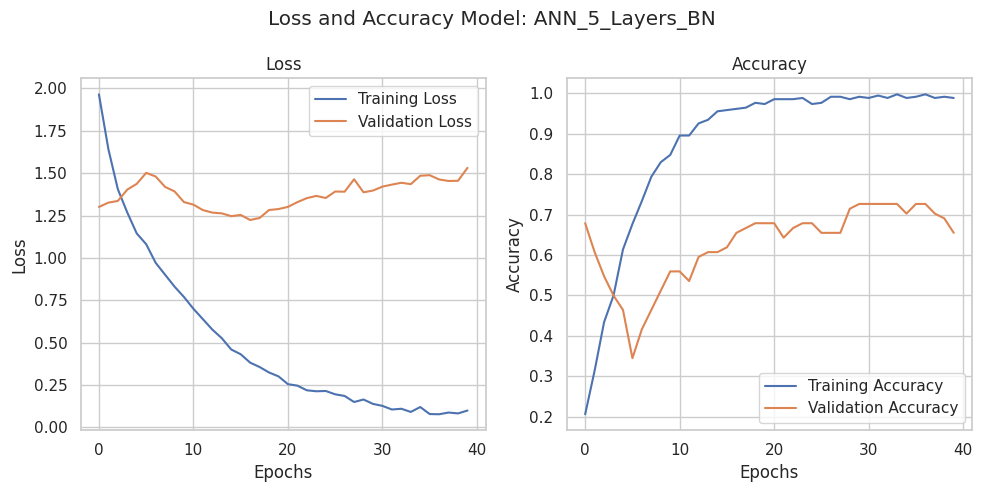

In [ ]:
result=function_model("ANN_5_Layers_BN",model, history, X_train,y_train,X_test,y_test)
ann_model_summary=ann_model_summary.append(result)
ann_model_summary.reset_index(drop=True, inplace=True)

### ANN-5 Layers add Dropout

In [ ]:
#preparing model1

tf.keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model1 = tf.keras.Sequential()

model1.add(tf.keras.layers.Embedding(desired_vocab_size + 1, #Vocablury size
                                    embedding_vector_length, #Embedding size
                                    weights=[embedding_matrix], #Embeddings taken from pre-trained model1
                                    trainable=False, #As embeddings are already available, we will not train this layer. It will act as lookup layer.
                                    input_length=max_review_length) #Number of words in each review
          )

#Flatten the data as we will use Dense layers
model1.add(tf.keras.layers.Flatten())

model1.add(tf.keras.layers.Dense(256, activation='relu'))
model1.add(tf.keras.layers.Dropout(0.5))
model1.add(tf.keras.layers.BatchNormalization())

model1.add(tf.keras.layers.Dense(128, activation='relu'))
model1.add(tf.keras.layers.Dropout(0.5))
model1.add(tf.keras.layers.BatchNormalization())

model1.add(tf.keras.layers.Dense(64, activation='relu'))
model1.add(tf.keras.layers.Dropout(0.5))
model1.add(tf.keras.layers.BatchNormalization())

model1.add(tf.keras.layers.Dense(32, activation='relu'))
model1.add(tf.keras.layers.Dropout(0.3))
model1.add(tf.keras.layers.BatchNormalization())

model1.add(tf.keras.layers.Dense(16, activation='relu'))
model1.add(tf.keras.layers.Dropout(0.3))
model1.add(tf.keras.layers.BatchNormalization())

model1.add(tf.keras.layers.Dense(5, activation='softmax')) #output


#model1 summary
model1.summary()


#Compile the model1
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history1=model1.fit(X_train,y_train, validation_data=(X_test,y_test),
                   epochs=40,
                   batch_size=32,
                   verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 215, 200)          2000200   
                                                                 
 flatten (Flatten)           (None, 43000)             0         
                                                                 
 dense (Dense)               (None, 256)               11008256  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                        

Model:  ANN_5_Layers_BN_dropout
3/3 [==============================] - 0s 4ms/step
Train Accuracy score:  0.7095808386802673
Test Accuracy score:  0.738095223903656


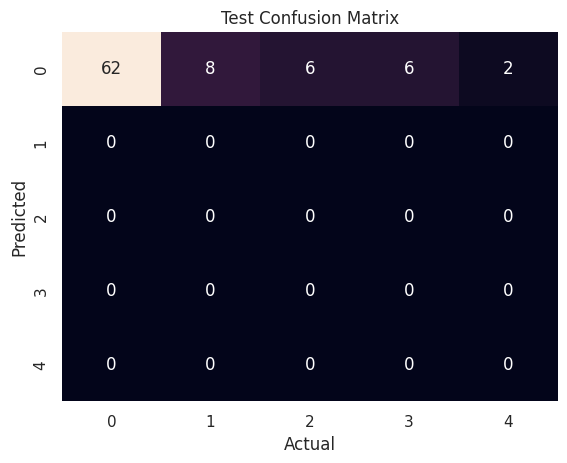

Classification report
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.74        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.54      0.74      0.63        84



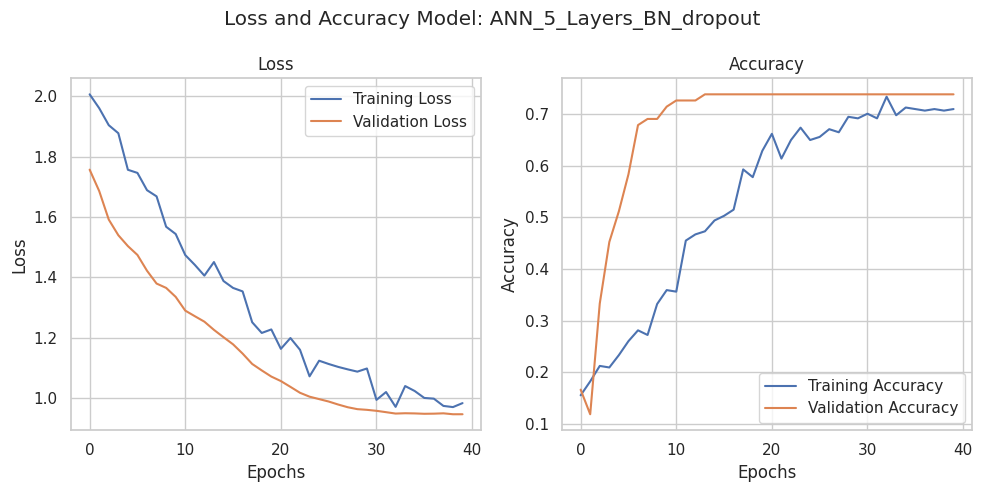

In [ ]:
result=function_model("ANN_5_Layers_BN_dropout",model1, history1, X_train,y_train,X_test,y_test)
ann_model_summary=ann_model_summary.append(result)
ann_model_summary.reset_index(drop=True, inplace=True)

### ANN-5 Layers add kernel initialization

In [ ]:
#preparing model1

tf.keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model1 = tf.keras.Sequential()

model1.add(tf.keras.layers.Embedding(desired_vocab_size + 1, #Vocablury size
                                    embedding_vector_length, #Embedding size
                                    weights=[embedding_matrix], #Embeddings taken from pre-trained model1
                                    trainable=False, #As embeddings are already available, we will not train this layer. It will act as lookup layer.
                                    input_length=max_review_length) #Number of words in each review
          )

#Flatten the data as we will use Dense layers
model1.add(tf.keras.layers.Flatten())

model1.add(tf.keras.layers.Dense(256, activation='relu', kernel_initializer='he_uniform'))
model1.add(tf.keras.layers.Dropout(0.5))
model1.add(tf.keras.layers.BatchNormalization())

model1.add(tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
model1.add(tf.keras.layers.Dropout(0.5))
model1.add(tf.keras.layers.BatchNormalization())

model1.add(tf.keras.layers.Dense(64, activation='relu', kernel_initializer='he_uniform'))
model1.add(tf.keras.layers.Dropout(0.5))
model1.add(tf.keras.layers.BatchNormalization())

model1.add(tf.keras.layers.Dense(32, activation='relu',kernel_initializer='he_uniform' ))
model1.add(tf.keras.layers.Dropout(0.3))
model1.add(tf.keras.layers.BatchNormalization())

model1.add(tf.keras.layers.Dense(16, activation='relu', kernel_initializer='he_uniform'))
model1.add(tf.keras.layers.Dropout(0.3))
model1.add(tf.keras.layers.BatchNormalization())

model1.add(tf.keras.layers.Dense(5, activation='softmax')) #output


#model1 summary
model1.summary()


#Compile the model1
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history1=model1.fit(X_train,y_train, validation_data=(X_test,y_test),
                   epochs=40,
                   batch_size=32,
                   verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 215, 200)          2000200   
                                                                 
 flatten (Flatten)           (None, 43000)             0         
                                                                 
 dense (Dense)               (None, 256)               11008256  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                        

Model:  ANN_5_Layers_BN_dropout_kernel
3/3 [==============================] - 0s 3ms/step
Train Accuracy score:  0.7065868377685547
Test Accuracy score:  0.738095223903656


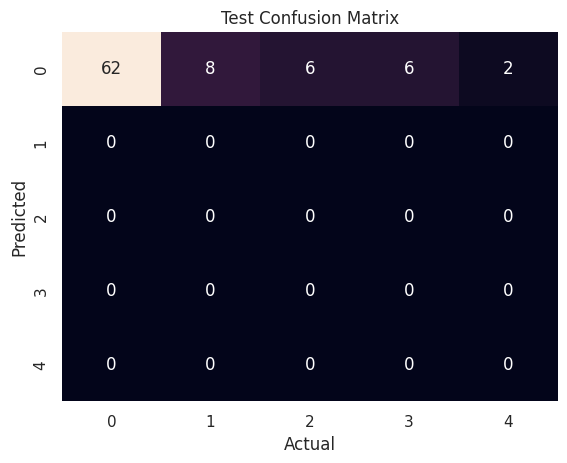

Classification report
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.74        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.54      0.74      0.63        84



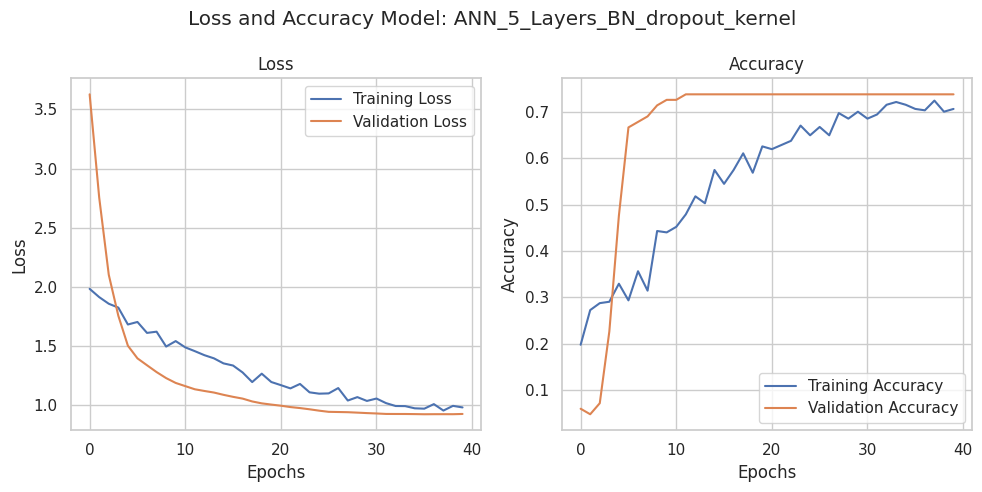

In [ ]:
result=function_model("ANN_5_Layers_BN_dropout_kernel",model1, history1, X_train,y_train,X_test,y_test)
ann_model_summary=ann_model_summary.append(result)
ann_model_summary.reset_index(drop=True, inplace=True)

ANN-5 Layers try Leaky Relu

In [ ]:
#preparing model1

tf.keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model1 = tf.keras.Sequential()

model1.add(tf.keras.layers.Embedding(desired_vocab_size + 1, #Vocablury size
                                    embedding_vector_length, #Embedding size
                                    weights=[embedding_matrix], #Embeddings taken from pre-trained model1
                                    trainable=False, #As embeddings are already available, we will not train this layer. It will act as lookup layer.
                                    input_length=max_review_length) #Number of words in each review
          )

#Flatten the data as we will use Dense layers
model1.add(tf.keras.layers.Flatten())

model1.add(tf.keras.layers.Dense(256, activation=LeakyReLU(alpha=.01), kernel_initializer='he_uniform'))
model1.add(tf.keras.layers.Dropout(0.5))
model1.add(tf.keras.layers.BatchNormalization())

model1.add(tf.keras.layers.Dense(128, activation=LeakyReLU(alpha=.01), kernel_initializer='he_uniform'))
model1.add(tf.keras.layers.Dropout(0.5))
model1.add(tf.keras.layers.BatchNormalization())

model1.add(tf.keras.layers.Dense(64, activation=LeakyReLU(alpha=.01), kernel_initializer='he_uniform'))
model1.add(tf.keras.layers.Dropout(0.5))
model1.add(tf.keras.layers.BatchNormalization())

model1.add(tf.keras.layers.Dense(32, activation=LeakyReLU(alpha=.01),kernel_initializer='he_uniform' ))
model1.add(tf.keras.layers.Dropout(0.3))
model1.add(tf.keras.layers.BatchNormalization())

model1.add(tf.keras.layers.Dense(16, activation=LeakyReLU(alpha=.01), kernel_initializer='he_uniform'))
model1.add(tf.keras.layers.Dropout(0.3))
model1.add(tf.keras.layers.BatchNormalization())

model1.add(tf.keras.layers.Dense(5, activation='softmax')) #output


#model1 summary
model1.summary()


#Compile the model1
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history1=model1.fit(X_train,y_train, validation_data=(X_test,y_test),
                   epochs=40,
                   batch_size=32,
                   verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 215, 200)          2000200   
                                                                 
 flatten (Flatten)           (None, 43000)             0         
                                                                 
 dense (Dense)               (None, 256)               11008256  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                        

Model:  ANN_5_Layers_BN_dropout_kernel_leakyrelu
3/3 [==============================] - 0s 4ms/step
Train Accuracy score:  0.727544903755188
Test Accuracy score:  0.738095223903656


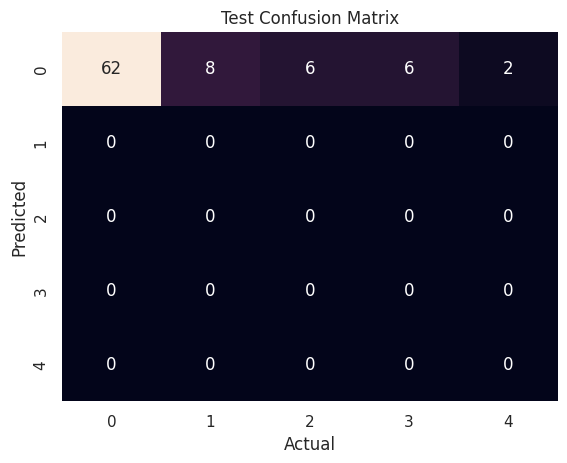

Classification report
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.74        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.54      0.74      0.63        84



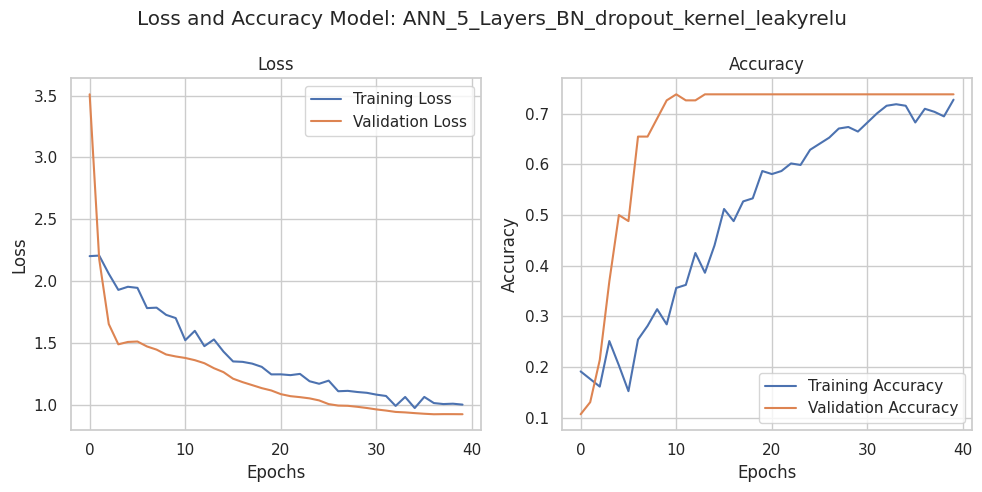

In [ ]:
result=function_model("ANN_5_Layers_BN_dropout_kernel_leakyrelu",model1, history1, X_train,y_train,X_test,y_test)
ann_model_summary=ann_model_summary.append(result)
ann_model_summary.reset_index(drop=True, inplace=True)

### ANN-5 layers with SGD

In [ ]:
#preparing model1

tf.keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model1 = tf.keras.Sequential()

model1.add(tf.keras.layers.Embedding(desired_vocab_size + 1, #Vocablury size
                                    embedding_vector_length, #Embedding size
                                    weights=[embedding_matrix], #Embeddings taken from pre-trained model1
                                    trainable=False, #As embeddings are already available, we will not train this layer. It will act as lookup layer.
                                    input_length=max_review_length) #Number of words in each review
          )

#Flatten the data as we will use Dense layers
model1.add(tf.keras.layers.Flatten())

model1.add(tf.keras.layers.Dense(256, activation='relu', kernel_initializer='he_uniform'))
model1.add(tf.keras.layers.Dropout(0.5))
model1.add(tf.keras.layers.BatchNormalization())

model1.add(tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
model1.add(tf.keras.layers.Dropout(0.5))
model1.add(tf.keras.layers.BatchNormalization())

model1.add(tf.keras.layers.Dense(64, activation='relu', kernel_initializer='he_uniform'))
model1.add(tf.keras.layers.Dropout(0.5))
model1.add(tf.keras.layers.BatchNormalization())

model1.add(tf.keras.layers.Dense(32, activation='relu',kernel_initializer='he_uniform' ))
model1.add(tf.keras.layers.Dropout(0.3))
model1.add(tf.keras.layers.BatchNormalization())

model1.add(tf.keras.layers.Dense(16, activation='relu', kernel_initializer='he_uniform'))
model1.add(tf.keras.layers.Dropout(0.3))
model1.add(tf.keras.layers.BatchNormalization())

model1.add(tf.keras.layers.Dense(5, activation='softmax')) #output


#model1 summary
model1.summary()


#Compile the model1
model1.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=.001, momentum=.9),loss='categorical_crossentropy',metrics=['accuracy'])

history1=model1.fit(X_train,y_train, validation_data=(X_test,y_test),
                   epochs=40,
                   batch_size=32,
                   verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 215, 200)          2000200   
                                                                 
 flatten (Flatten)           (None, 43000)             0         
                                                                 
 dense (Dense)               (None, 256)               11008256  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                        

Model:  ANN_5_Layers_BN_dropout_kernel_SGD
3/3 [==============================] - 0s 4ms/step
Train Accuracy score:  0.7245509028434753
Test Accuracy score:  0.738095223903656


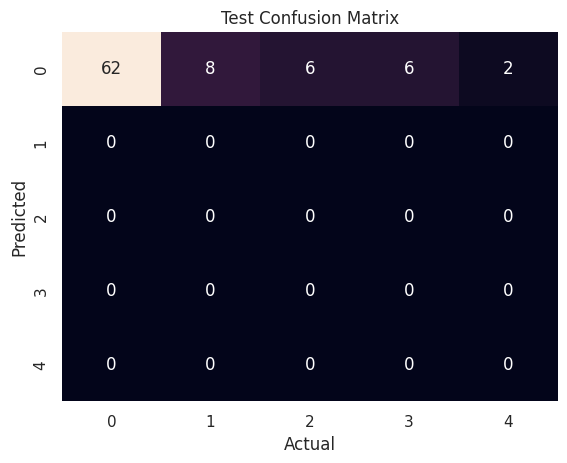

Classification report
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.74        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.54      0.74      0.63        84



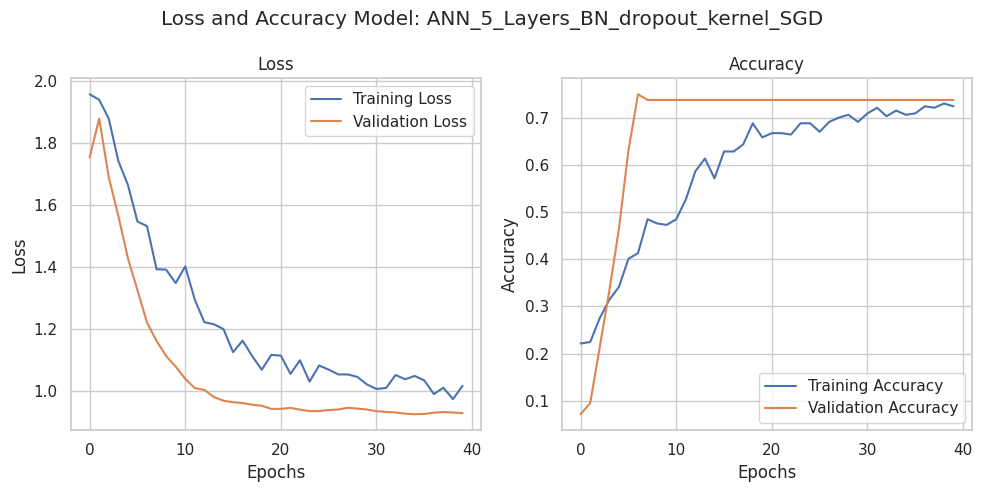

In [ ]:
result=function_model("ANN_5_Layers_BN_dropout_kernel_SGD",model1, history1, X_train,y_train,X_test,y_test)
ann_model_summary=ann_model_summary.append(result)
ann_model_summary.reset_index(drop=True, inplace=True)

### ANN with reduced LR

In [ ]:
#preparing model2

tf.keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model2 = tf.keras.Sequential()

model2.add(tf.keras.layers.Embedding(desired_vocab_size + 1, #Vocablury size
                                    embedding_vector_length, #Embedding size
                                    weights=[embedding_matrix], #Embeddings taken from pre-trained model2
                                    trainable=False, #As embeddings are already available, we will not train this layer. It will act as lookup layer.
                                    input_length=max_review_length) #Number of words in each review
          )

#Flatten the data as we will use Dense layers
model2.add(tf.keras.layers.Flatten())

model2.add(tf.keras.layers.Dense(256, activation='relu', kernel_initializer='he_uniform'))
model2.add(tf.keras.layers.Dropout(0.5))
model2.add(tf.keras.layers.BatchNormalization())

model2.add(tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
model2.add(tf.keras.layers.Dropout(0.5))
model2.add(tf.keras.layers.BatchNormalization())

model2.add(tf.keras.layers.Dense(64, activation='relu', kernel_initializer='he_uniform'))
model2.add(tf.keras.layers.Dropout(0.5))
model2.add(tf.keras.layers.BatchNormalization())

model2.add(tf.keras.layers.Dense(32, activation='relu',kernel_initializer='he_uniform' ))
model2.add(tf.keras.layers.Dropout(0.3))
model2.add(tf.keras.layers.BatchNormalization())

model2.add(tf.keras.layers.Dense(16, activation='relu', kernel_initializer='he_uniform'))
model2.add(tf.keras.layers.Dropout(0.3))
model2.add(tf.keras.layers.BatchNormalization())

model2.add(tf.keras.layers.Dense(5, activation='softmax')) #output


#model2 summary
model2.summary()


#Compile the model2
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


# Define the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-8, verbose=1)

history2=model2.fit(X_train,y_train, validation_data=(X_test,y_test),
                   epochs=100,
                   batch_size=8,
                   callbacks=[reduce_lr],
                   verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 215, 200)          2000200   
                                                                 
 flatten (Flatten)           (None, 43000)             0         
                                                                 
 dense (Dense)               (None, 256)               11008256  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                        

Model:  ANN_5_Layers_BN_dropout_kerne_reducedlr
3/3 [==============================] - 0s 4ms/step
Train Accuracy score:  0.7365269660949707
Test Accuracy score:  0.738095223903656


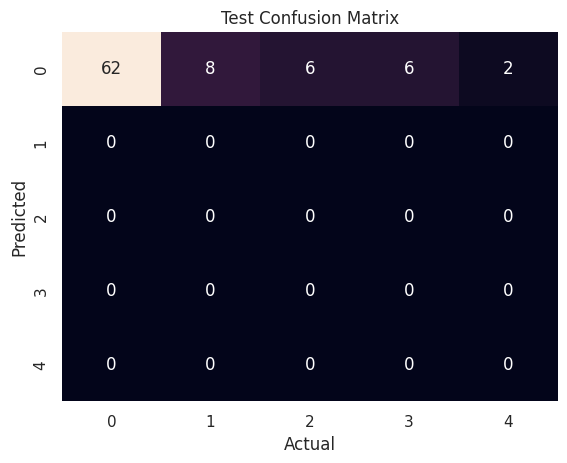

Classification report
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.74        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.54      0.74      0.63        84



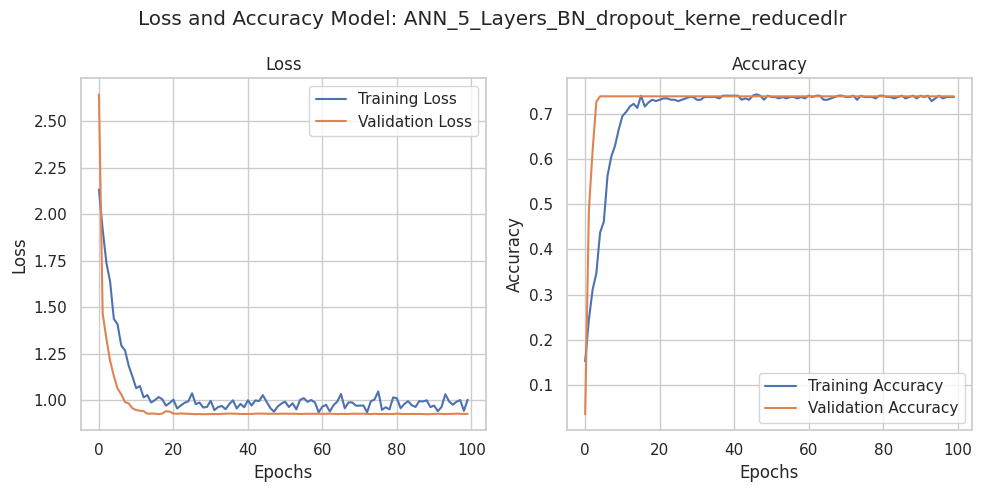

In [ ]:
result=function_model("ANN_5_Layers_BN_dropout_kerne_reducedlr",model2, history2, X_train,y_train,X_test,y_test)
ann_model_summary=ann_model_summary.append(result)
ann_model_summary.reset_index(drop=True, inplace=True)

### ANN with early stopping and reduced LR

In [ ]:
#preparing model2

tf.keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model2 = tf.keras.Sequential()

model2.add(tf.keras.layers.Embedding(desired_vocab_size + 1, #Vocablury size
                                    embedding_vector_length, #Embedding size
                                    weights=[embedding_matrix], #Embeddings taken from pre-trained model2
                                    trainable=False, #As embeddings are already available, we will not train this layer. It will act as lookup layer.
                                    input_length=max_review_length) #Number of words in each review
          )

#Flatten the data as we will use Dense layers
model2.add(tf.keras.layers.Flatten())

model2.add(tf.keras.layers.Dense(256, activation='relu', kernel_initializer='he_uniform'))
model2.add(tf.keras.layers.Dropout(0.5))
model2.add(tf.keras.layers.BatchNormalization())

model2.add(tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
model2.add(tf.keras.layers.Dropout(0.5))
model2.add(tf.keras.layers.BatchNormalization())

model2.add(tf.keras.layers.Dense(64, activation='relu', kernel_initializer='he_uniform'))
model2.add(tf.keras.layers.Dropout(0.5))
model2.add(tf.keras.layers.BatchNormalization())

model2.add(tf.keras.layers.Dense(32, activation='relu',kernel_initializer='he_uniform' ))
model2.add(tf.keras.layers.Dropout(0.3))
model2.add(tf.keras.layers.BatchNormalization())

model2.add(tf.keras.layers.Dense(16, activation='relu', kernel_initializer='he_uniform'))
model2.add(tf.keras.layers.Dropout(0.3))
model2.add(tf.keras.layers.BatchNormalization())

model2.add(tf.keras.layers.Dense(5, activation='softmax')) #output


#model2 summary
model2.summary()


#Compile the model2
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, min_delta=1E-3)


# Define the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-8, verbose=1)

history2=model2.fit(X_train,y_train, validation_data=(X_test,y_test),
                   epochs=100,
                   batch_size=8,
                   callbacks=[early_stopping, reduce_lr],
                   verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 215, 200)          2000200   
                                                                 
 flatten (Flatten)           (None, 43000)             0         
                                                                 
 dense (Dense)               (None, 256)               11008256  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                        

Model:  ANN_5_Layers_BN_dropout_kerne_earlystop_reduceLR
3/3 [==============================] - 0s 4ms/step
Train Accuracy score:  0.7395209670066833
Test Accuracy score:  0.738095223903656


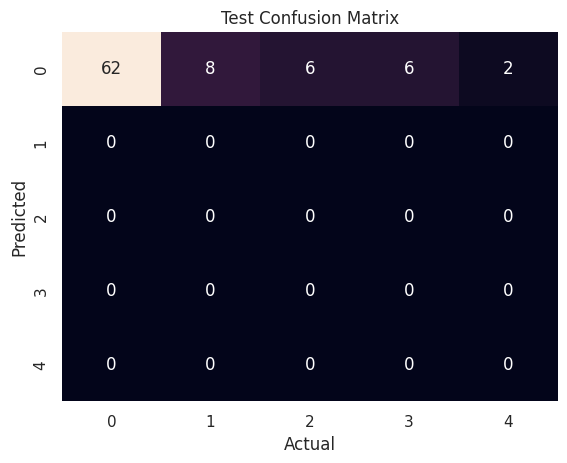

Classification report
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.74        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.54      0.74      0.63        84



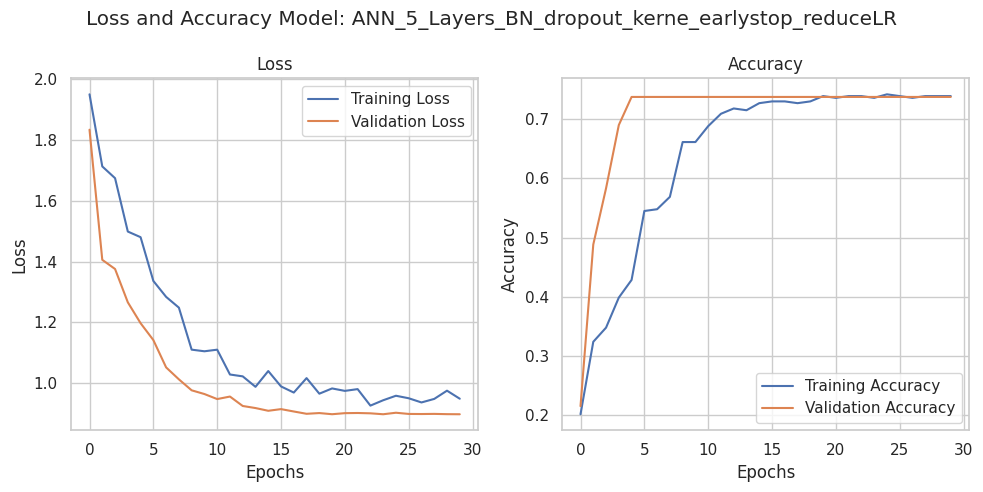

In [ ]:
result=function_model("ANN_5_Layers_BN_dropout_kerne_earlystop_reduceLR",model2, history2, X_train,y_train,X_test,y_test)
ann_model_summary=ann_model_summary.append(result)
ann_model_summary.reset_index(drop=True, inplace=True)

### ANN with early stopping and reduced LR with trainable embeeding

In [ ]:
#preparing model2

tf.keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model2 = tf.keras.Sequential()

model2.add(tf.keras.layers.Embedding(desired_vocab_size + 1, #Vocablury size
                                    embedding_vector_length, #Embedding size
                                    weights=[embedding_matrix], #Embeddings taken from pre-trained model2
                                    #trainable=False, #As embeddings are already available, we will not train this layer. It will act as lookup layer.
                                    input_length=max_review_length) #Number of words in each review
          )

#Flatten the data as we will use Dense layers
model2.add(tf.keras.layers.Flatten())

model2.add(tf.keras.layers.Dense(256, activation='relu', kernel_initializer='he_uniform'))
model2.add(tf.keras.layers.Dropout(0.5))
model2.add(tf.keras.layers.BatchNormalization())

model2.add(tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
model2.add(tf.keras.layers.Dropout(0.5))
model2.add(tf.keras.layers.BatchNormalization())

model2.add(tf.keras.layers.Dense(64, activation='relu', kernel_initializer='he_uniform'))
model2.add(tf.keras.layers.Dropout(0.5))
model2.add(tf.keras.layers.BatchNormalization())

model2.add(tf.keras.layers.Dense(32, activation='relu',kernel_initializer='he_uniform' ))
model2.add(tf.keras.layers.Dropout(0.3))
model2.add(tf.keras.layers.BatchNormalization())

model2.add(tf.keras.layers.Dense(16, activation='relu', kernel_initializer='he_uniform'))
model2.add(tf.keras.layers.Dropout(0.3))
model2.add(tf.keras.layers.BatchNormalization())

model2.add(tf.keras.layers.Dense(5, activation='softmax')) #output


#model2 summary
model2.summary()


#Compile the model2
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True, min_delta=1E-3)


# Define the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-8, verbose=1)

history2=model2.fit(X_train,y_train, validation_data=(X_test,y_test),
                   epochs=100,
                   batch_size=8,
                   callbacks=[early_stopping, reduce_lr],
                   verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 215, 200)          2000200   
                                                                 
 flatten (Flatten)           (None, 43000)             0         
                                                                 
 dense (Dense)               (None, 256)               11008256  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                        

Model:  ANN_5_Layers_BN_dropout_kerne_earlystop_reduceLR_trainablemebeeding
3/3 [==============================] - 0s 4ms/step
Train Accuracy score:  0.7365269660949707
Test Accuracy score:  0.738095223903656


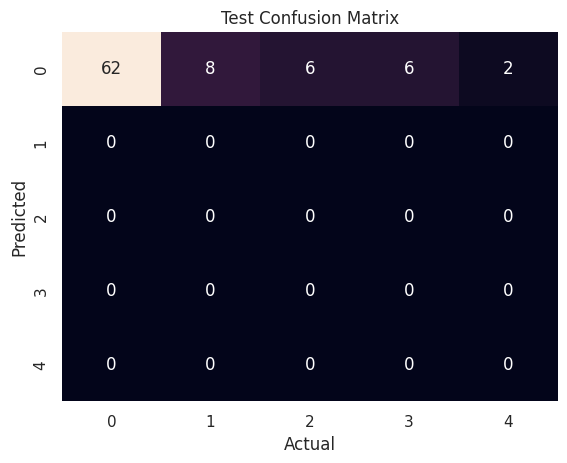

Classification report
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.74        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.54      0.74      0.63        84



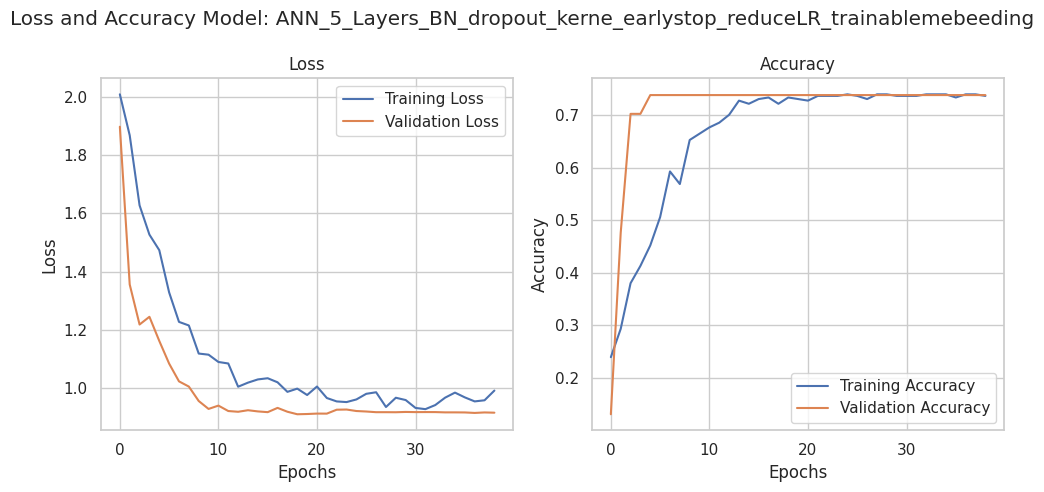

In [ ]:
result=function_model("ANN_5_Layers_BN_dropout_kerne_earlystop_reduceLR_trainablemebeeding",model2, history2, X_train,y_train,X_test,y_test)
ann_model_summary=ann_model_summary.append(result)
ann_model_summary.reset_index(drop=True, inplace=True)

In [ ]:
ann_model_summary

Model  Train Accuracy  \
0                                        ANN_2_Layers            1.00   
1                                        ANN_3_Layers            1.00   
2                                        ANN_4_Layers            1.00   
3                                        ANN_5_Layers            1.00   
4                                        ANN_6_Layers            1.00   
5                                     ANN_5_Layers_BN            0.98   
6                             ANN_5_Layers_BN_dropout            0.74   
7                      ANN_5_Layers_BN_dropout_kernel            0.70   
8            ANN_5_Layers_BN_dropout_kernel_leakyrelu            0.71   
9                  ANN_5_Layers_BN_dropout_kernel_SGD            0.70   
10            ANN_5_Layers_BN_dropout_kerne_reducedlr            0.72   
11   ANN_5_Layers_BN_dropout_kerne_earlystop_reduceLR            0.74   
12  ANN_5_Layers_BN_dropout_kerne_earlystop_reduce...            0.72   

    Test Accuracy  Precision  recall  f1 score  
0            0.73       0.55    0.73      0.63  
1            0.71       0.55    0.71      0.62  
2            0.69       0.54    0.69      0.61  
3            0.73       0.55    0.73      0.63  
4            0.69       0.54    0.69      0.60  
5            0.68       0.55    0.68      0.61  
6            0.74       0.54    0.74      0.63  
7            0.74       0.54    0.74      0.63  
8            0.74       0.54    0.74      0.63  
9            0.74       0.54    0.74      0.63  
10           0.74       0.54    0.74      0.63  
11           0.74       0.54    0.74      0.63  
12           0.74       0.54    0.74      0.63

We tried varioius models for ANN. For models no 6 to no 12. we found that train accuracy and test accuracy are similar, in most cases test accuracy seems to be better than train accuracy so we can say that model is not overfitted

In [ ]:
ann_model_summary.to_pickle('ann_model_summary.pickle')

## Step 2: Design, train and test RNN or LSTM classifiers

In [ ]:
lstm_model_summary=  pd.DataFrame()

### trying with LSTM (64) and single Dense

In [ ]:
#preparing model3

tf.keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model3 = tf.keras.Sequential()

model3.add(tf.keras.layers.Embedding(desired_vocab_size + 1, #Vocablury size
                  embedding_vector_length, #Embedding size
                  weights=[embedding_matrix], #Embeddings taken from pre-trained model3
                  trainable=False, #As embeddings are already available, we will not train this layer. It will act as lookup layer.
                  input_length=max_review_length) #Number of words in each review
      )


model3.add(tf.keras.layers.LSTM(64)) #RNN State - size of cell state and hidden state


model3.add(tf.keras.layers.Dense(5, activation='softmax')) #output


#model3 summary
model3.summary()


#Compile the model3
model3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history3=model3.fit(X_train,y_train, validation_data=(X_test,y_test),
            epochs=30,
            batch_size=32,
            verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 215, 200)          2000200   
                                                                 
 lstm (LSTM)                 (None, 64)                67840     
                                                                 
 dense (Dense)               (None, 5)                 325       
                                                                 
Total params: 2068365 (7.89 MB)
Trainable params: 68165 (266.27 KB)
Non-trainable params: 2000200 (7.63 MB)
_________________________________________________________________
Epoch 1/30
11/11 [==============================] - 4s 93ms/step - loss: 1.3691 - accuracy: 0.5240 - val_loss: 0.9614 - val_accuracy: 0.7381
Epoch 2/30
11/11 [==============================] - 0s 18ms/step - loss: 0.9346 - accuracy: 0.7395 - val_loss: 0.9420 - val_accuracy: 0.7

Model:  LSTM_128
3/3 [==============================] - 0s 8ms/step
Train Accuracy score:  0.9341317415237427
Test Accuracy score:  0.5833333134651184


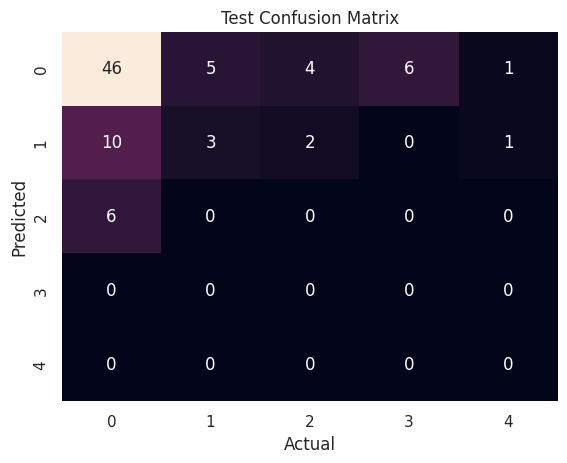

Classification report
              precision    recall  f1-score   support

           0       0.74      0.74      0.74        62
           1       0.19      0.38      0.25         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.58        84
   macro avg       0.19      0.22      0.20        84
weighted avg       0.57      0.58      0.57        84



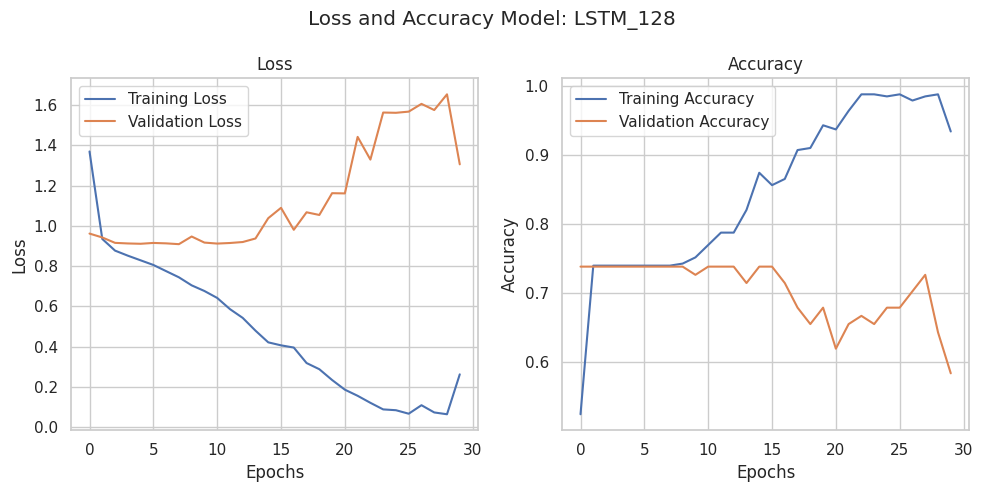

In [ ]:
result=function_model("LSTM_128",model3, history3, X_train,y_train,X_test,y_test)
lstm_model_summary=lstm_model_summary.append(result)
lstm_model_summary.reset_index(drop=True, inplace=True)

### trying with LSTM (128) and single Dense

In [ ]:
#preparing model3

tf.keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model3 = tf.keras.Sequential()

model3.add(tf.keras.layers.Embedding(desired_vocab_size + 1, #Vocablury size
                  embedding_vector_length, #Embedding size
                  weights=[embedding_matrix], #Embeddings taken from pre-trained model3
                  trainable=False, #As embeddings are already available, we will not train this layer. It will act as lookup layer.
                  input_length=max_review_length) #Number of words in each review
      )


model3.add(tf.keras.layers.LSTM(128)) #RNN State - size of cell state and hidden state


model3.add(tf.keras.layers.Dense(5, activation='softmax')) #output


#model3 summary
model3.summary()


#Compile the model3
model3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history3=model3.fit(X_train,y_train, validation_data=(X_test,y_test),
            epochs=30,
            batch_size=32,
            verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 215, 200)          2000200   
                                                                 
 lstm (LSTM)                 (None, 128)               168448    
                                                                 
 dense (Dense)               (None, 5)                 645       
                                                                 
Total params: 2169293 (8.28 MB)
Trainable params: 169093 (660.52 KB)
Non-trainable params: 2000200 (7.63 MB)
_________________________________________________________________
Epoch 1/30
11/11 [==============================] - 4s 86ms/step - loss: 1.1440 - accuracy: 0.6377 - val_loss: 1.0082 - val_accuracy: 0.7381
Epoch 2/30
11/11 [==============================] - 0s 17ms/step - loss: 0.9075 - accuracy: 0.7395 - val_loss: 0.9483 - val_accuracy: 0.

Model:  LSTM_128
3/3 [==============================] - 0s 8ms/step
Train Accuracy score:  0.9880239367485046
Test Accuracy score:  0.5952380895614624


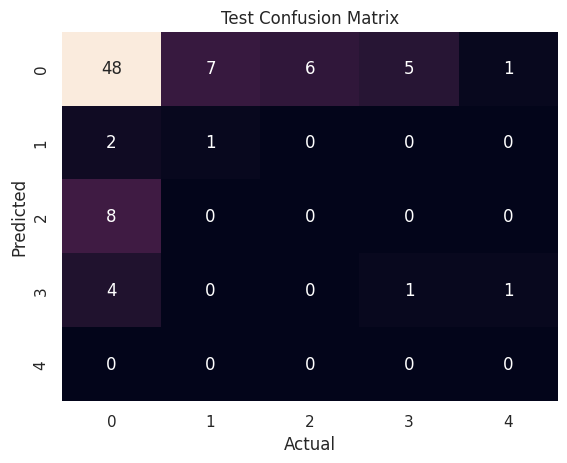

Classification report
              precision    recall  f1-score   support

           0       0.72      0.77      0.74        62
           1       0.33      0.12      0.18         8
           2       0.00      0.00      0.00         6
           3       0.17      0.17      0.17         6
           4       0.00      0.00      0.00         2

    accuracy                           0.60        84
   macro avg       0.24      0.21      0.22        84
weighted avg       0.57      0.60      0.58        84



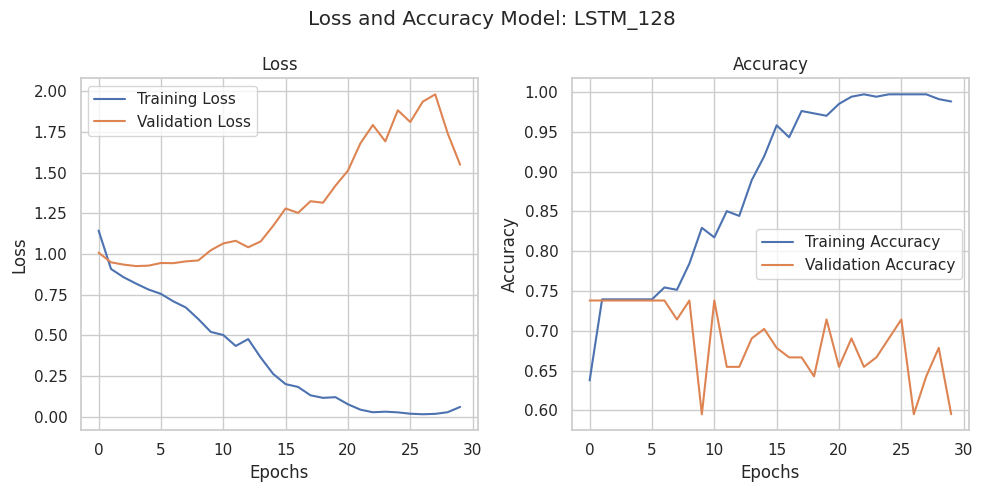

In [ ]:
result=function_model("LSTM_128",model3, history3, X_train,y_train,X_test,y_test)
lstm_model_summary=lstm_model_summary.append(result)
lstm_model_summary.reset_index(drop=True, inplace=True)

### trying with LSTM (256) and single Dense

In [ ]:
#preparing model3

tf.keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model3 = tf.keras.Sequential()

model3.add(tf.keras.layers.Embedding(desired_vocab_size + 1, #Vocablury size
                  embedding_vector_length, #Embedding size
                  weights=[embedding_matrix], #Embeddings taken from pre-trained model3
                  trainable=False, #As embeddings are already available, we will not train this layer. It will act as lookup layer.
                  input_length=max_review_length) #Number of words in each review
      )


model3.add(tf.keras.layers.LSTM(256)) #RNN State - size of cell state and hidden state


model3.add(tf.keras.layers.Dense(5, activation='softmax')) #output


#model3 summary
model3.summary()


#Compile the model3
model3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history3=model3.fit(X_train,y_train, validation_data=(X_test,y_test),
            epochs=30,
            batch_size=32,
            verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 215, 200)          2000200   
                                                                 
 lstm (LSTM)                 (None, 256)               467968    
                                                                 
 dense (Dense)               (None, 5)                 1285      
                                                                 
Total params: 2469453 (9.42 MB)
Trainable params: 469253 (1.79 MB)
Non-trainable params: 2000200 (7.63 MB)
_________________________________________________________________
Epoch 1/30
11/11 [==============================] - 3s 76ms/step - loss: 1.0223 - accuracy: 0.6796 - val_loss: 0.9224 - val_accuracy: 0.7381
Epoch 2/30
11/11 [==============================] - 0s 20ms/step - loss: 0.8663 - accuracy: 0.7395 - val_loss: 0.9104 - val_accuracy: 0.73

Model:  LSTM_256
3/3 [==============================] - 0s 10ms/step
Train Accuracy score:  0.9970059990882874
Test Accuracy score:  0.6309523582458496


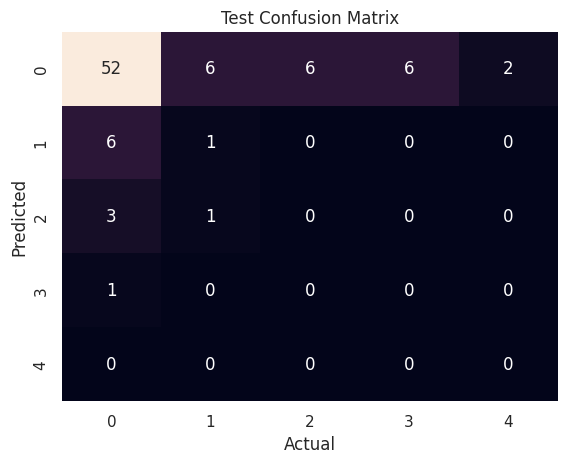

Classification report
              precision    recall  f1-score   support

           0       0.72      0.84      0.78        62
           1       0.14      0.12      0.13         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.63        84
   macro avg       0.17      0.19      0.18        84
weighted avg       0.55      0.63      0.59        84



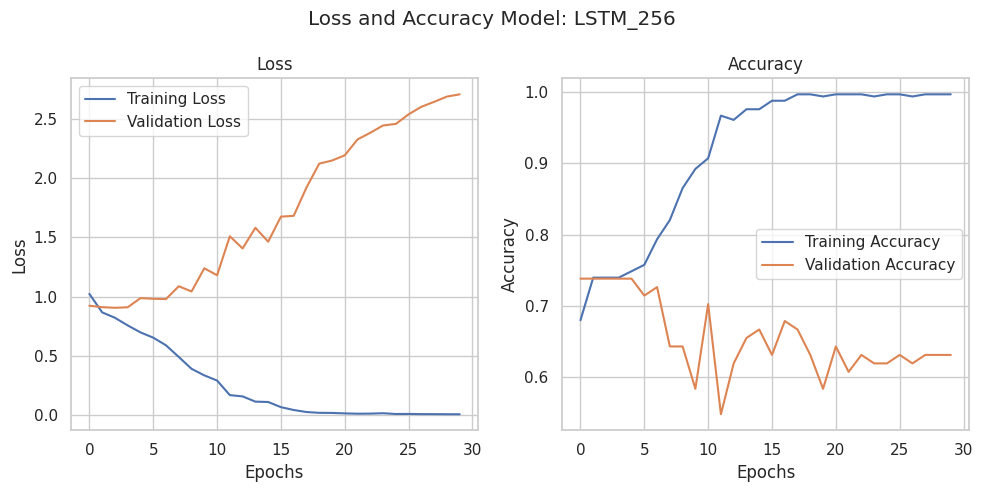

In [ ]:
result=function_model("LSTM_256",model3, history3, X_train,y_train,X_test,y_test)
lstm_model_summary=lstm_model_summary.append(result)
lstm_model_summary.reset_index(drop=True, inplace=True)

### trying with LSTM (128) with droupout and single Dense

In [ ]:
#preparing model3

tf.keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model3 = tf.keras.Sequential()

model3.add(tf.keras.layers.Embedding(desired_vocab_size + 1, #Vocablury size
                  embedding_vector_length, #Embedding size
                  weights=[embedding_matrix], #Embeddings taken from pre-trained model3
                  trainable=False, #As embeddings are already available, we will not train this layer. It will act as lookup layer.
                  input_length=max_review_length) #Number of words in each review
      )

model3.add(tf.keras.layers.Dropout(0.3))

model3.add(tf.keras.layers.LSTM(128)) #RNN State - size of cell state and hidden state
model3.add(tf.keras.layers.Dropout(0.3))

model3.add(tf.keras.layers.Dense(5, activation='softmax')) #output


#model3 summary
model3.summary()


#Compile the model3
model3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history3=model3.fit(X_train,y_train, validation_data=(X_test,y_test),
            epochs=30,
            batch_size=32,
            verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 215, 200)          2000200   
                                                                 
 dropout (Dropout)           (None, 215, 200)          0         
                                                                 
 lstm (LSTM)                 (None, 128)               168448    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 5)                 645       
                                                                 
Total params: 2169293 (8.28 MB)
Trainable params: 169093 (660.52 KB)
Non-trainable params: 2000200 (7.63 MB)
_________________________________________________________________
Epoch 1/30
11

Model:  LSTM_128_droupout
3/3 [==============================] - 0s 8ms/step
Train Accuracy score:  0.9820359349250793
Test Accuracy score:  0.5833333134651184


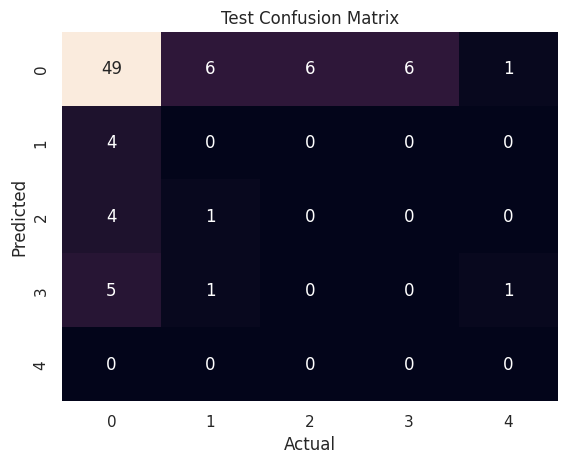

Classification report
              precision    recall  f1-score   support

           0       0.72      0.79      0.75        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.58        84
   macro avg       0.14      0.16      0.15        84
weighted avg       0.53      0.58      0.56        84



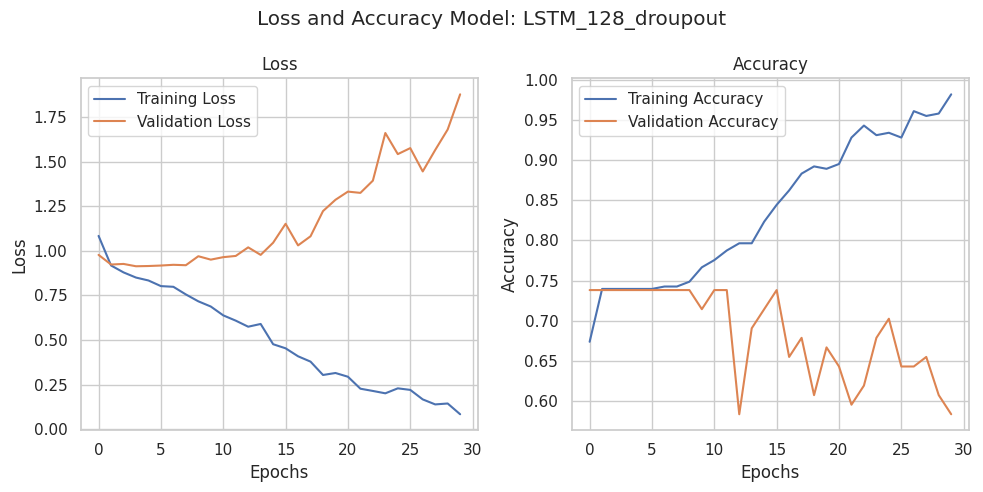

In [ ]:
result=function_model("LSTM_128_droupout",model3, history3, X_train,y_train,X_test,y_test)
lstm_model_summary=lstm_model_summary.append(result)
lstm_model_summary.reset_index(drop=True, inplace=True)

### trying with LSTM (256) with droupout and single Dense

In [ ]:
#preparing model3

tf.keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model3 = tf.keras.Sequential()

model3.add(tf.keras.layers.Embedding(desired_vocab_size + 1, #Vocablury size
                  embedding_vector_length, #Embedding size
                  weights=[embedding_matrix], #Embeddings taken from pre-trained model3
                  trainable=False, #As embeddings are already available, we will not train this layer. It will act as lookup layer.
                  input_length=max_review_length) #Number of words in each review
      )

model3.add(tf.keras.layers.Dropout(0.3))

model3.add(tf.keras.layers.LSTM(256)) #RNN State - size of cell state and hidden state
model3.add(tf.keras.layers.Dropout(0.3))

model3.add(tf.keras.layers.Dense(5, activation='softmax')) #output


#model3 summary
model3.summary()


#Compile the model3
model3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history3=model3.fit(X_train,y_train, validation_data=(X_test,y_test),
            epochs=30,
            batch_size=32,
            verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 215, 200)          2000200   
                                                                 
 dropout (Dropout)           (None, 215, 200)          0         
                                                                 
 lstm (LSTM)                 (None, 256)               467968    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense (Dense)               (None, 5)                 1285      
                                                                 
Total params: 2469453 (9.42 MB)
Trainable params: 469253 (1.79 MB)
Non-trainable params: 2000200 (7.63 MB)
_________________________________________________________________
Epoch 1/30
11/1

Model:  LSTM_256_droupout


3/3 [==============================] - 0s 8ms/step
Train Accuracy score:  0.9940119981765747
Test Accuracy score:  0.5476190447807312


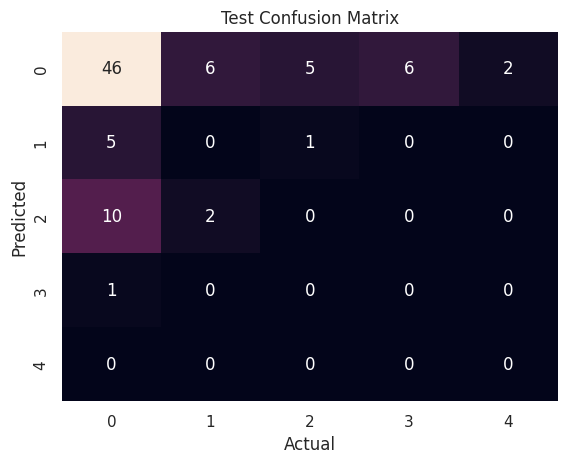

Classification report
              precision    recall  f1-score   support

           0       0.71      0.74      0.72        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.55        84
   macro avg       0.14      0.15      0.14        84
weighted avg       0.52      0.55      0.53        84



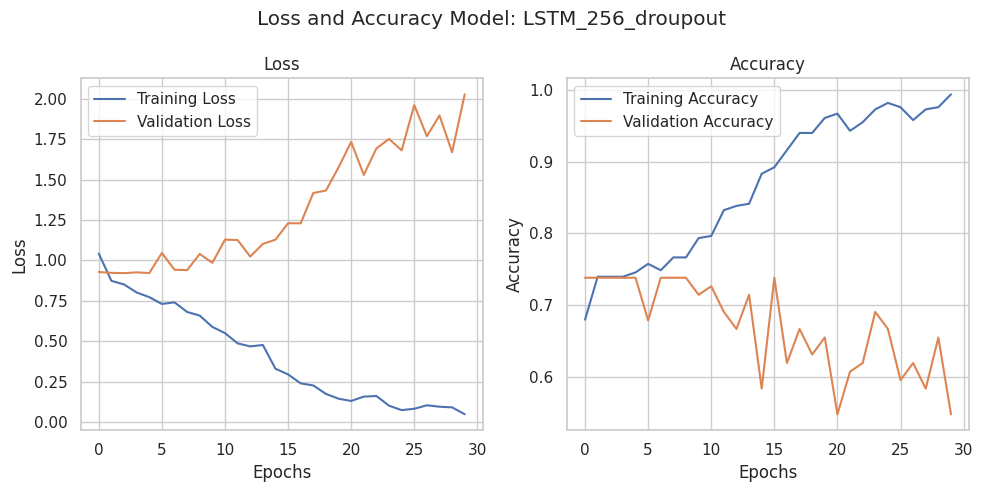

In [ ]:
result=function_model("LSTM_256_droupout",model3, history3, X_train,y_train,X_test,y_test)
lstm_model_summary=lstm_model_summary.append(result)
lstm_model_summary.reset_index(drop=True, inplace=True)

There isnt much difference for LSTM-128 and 256, pursuing further models with LSTM-256

### trying with LSTM (256) with droupout and multiple Dense

In [ ]:
#preparing model3

tf.keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model3 = tf.keras.Sequential()

model3.add(tf.keras.layers.Embedding(desired_vocab_size + 1, #Vocablury size
                  embedding_vector_length, #Embedding size
                  weights=[embedding_matrix], #Embeddings taken from pre-trained model3
                  trainable=False, #As embeddings are already available, we will not train this layer. It will act as lookup layer.
                  input_length=max_review_length) #Number of words in each review
      )

model3.add(tf.keras.layers.Dropout(0.3))

model3.add(tf.keras.layers.LSTM(256)) #RNN State - size of cell state and hidden state
model3.add(tf.keras.layers.Dropout(0.3))


#model3.add(tf.keras.layers.Dense(256, activation='relu'))
model3.add(tf.keras.layers.Dense(128, activation='relu'))
model3.add(tf.keras.layers.Dense(64, activation='relu'))
model3.add(tf.keras.layers.Dense(32, activation='relu'))
model3.add(tf.keras.layers.Dense(16, activation='relu'))

model3.add(tf.keras.layers.Dense(5, activation='softmax')) #output


#model3 summary
model3.summary()


#Compile the model3
model3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history3=model3.fit(X_train,y_train, validation_data=(X_test,y_test),
            epochs=30,
            batch_size=32,
            verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 215, 200)          2000200   
                                                                 
 dropout (Dropout)           (None, 215, 200)          0         
                                                                 
 lstm (LSTM)                 (None, 256)               467968    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2

Model:  LSTM_256_droupout_dense


3/3 [==============================] - 1s 13ms/step
Train Accuracy score:  0.8203592896461487
Test Accuracy score:  0.511904776096344


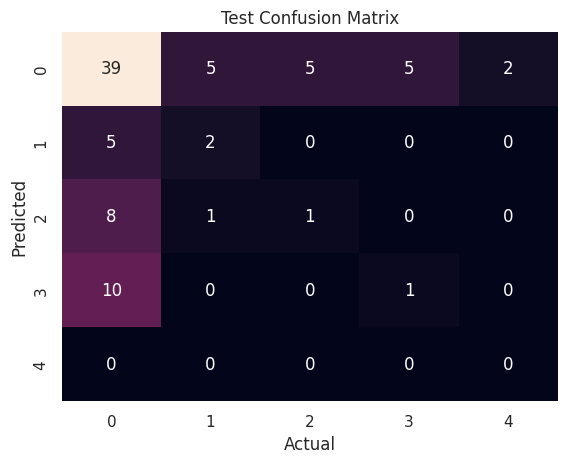

Classification report
              precision    recall  f1-score   support

           0       0.70      0.63      0.66        62
           1       0.29      0.25      0.27         8
           2       0.10      0.17      0.12         6
           3       0.09      0.17      0.12         6
           4       0.00      0.00      0.00         2

    accuracy                           0.51        84
   macro avg       0.23      0.24      0.23        84
weighted avg       0.55      0.51      0.53        84



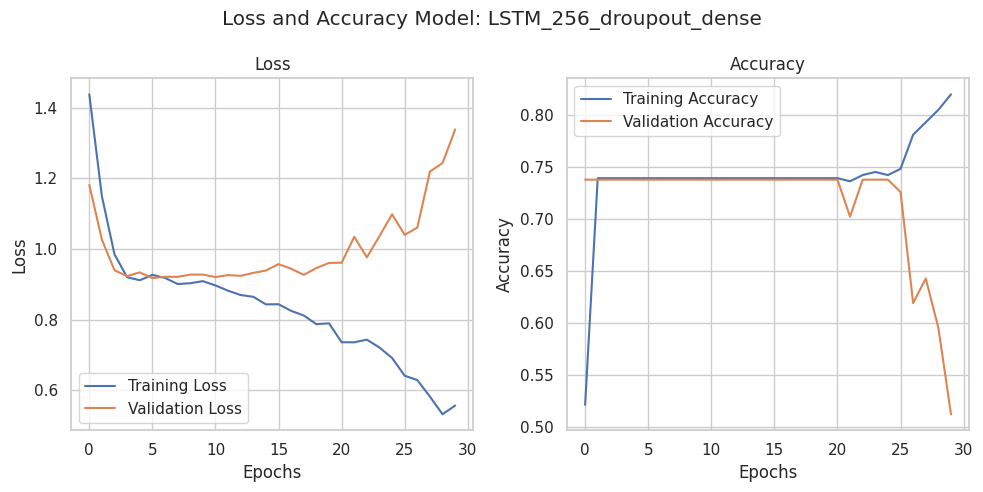

In [ ]:
result=function_model("LSTM_256_droupout_dense",model3, history3, X_train,y_train,X_test,y_test)
lstm_model_summary=lstm_model_summary.append(result)
lstm_model_summary.reset_index(drop=True, inplace=True)

### trying with LSTM with droupout and multiple Dense with droupout

In [ ]:
#preparing model3

tf.keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model3 = tf.keras.Sequential()

model3.add(tf.keras.layers.Embedding(desired_vocab_size + 1, #Vocablury size
                  embedding_vector_length, #Embedding size
                  weights=[embedding_matrix], #Embeddings taken from pre-trained model3
                  trainable=False, #As embeddings are already available, we will not train this layer. It will act as lookup layer.
                  input_length=max_review_length) #Number of words in each review
      )

model3.add(tf.keras.layers.Dropout(0.3))

model3.add(tf.keras.layers.LSTM(256)) #RNN State - size of cell state and hidden state
model3.add(tf.keras.layers.Dropout(0.3))


#model3.add(tf.keras.layers.Dense(256, activation='relu'))
#model3.add(tf.keras.layers.Dropout(0.3))

model3.add(tf.keras.layers.Dense(128, activation='relu'))
model3.add(tf.keras.layers.Dropout(0.3))

model3.add(tf.keras.layers.Dense(64, activation='relu'))
model3.add(tf.keras.layers.Dropout(0.3))

model3.add(tf.keras.layers.Dense(32, activation='relu'))
model3.add(tf.keras.layers.Dropout(0.3))

model3.add(tf.keras.layers.Dense(16, activation='relu'))
model3.add(tf.keras.layers.Dropout(0.3))

model3.add(tf.keras.layers.Dense(5, activation='softmax')) #output


#model3 summary
model3.summary()


#Compile the model3
model3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history3=model3.fit(X_train,y_train, validation_data=(X_test,y_test),
            epochs=30,
            batch_size=16,
            verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 215, 200)          2000200   
                                                                 
 dropout (Dropout)           (None, 215, 200)          0         
                                                                 
 lstm (LSTM)                 (None, 256)               467968    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8

Model:  LSTM_256_droupout_dense_dropout
3/3 [==============================] - 1s 11ms/step
Train Accuracy score:  0.811377227306366
Test Accuracy score:  0.6785714030265808


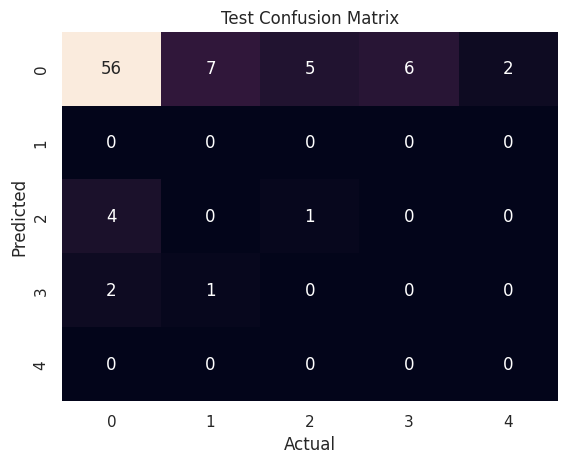

Classification report
              precision    recall  f1-score   support

           0       0.74      0.90      0.81        62
           1       0.00      0.00      0.00         8
           2       0.20      0.17      0.18         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.68        84
   macro avg       0.19      0.21      0.20        84
weighted avg       0.56      0.68      0.61        84



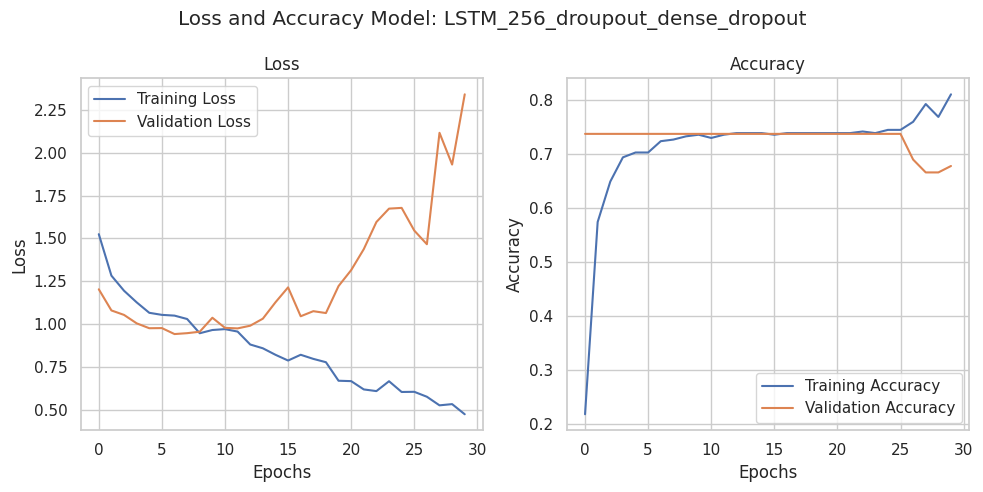

In [ ]:
result=function_model("LSTM_256_droupout_dense_dropout",model3, history3, X_train,y_train,X_test,y_test)
lstm_model_summary=lstm_model_summary.append(result)
lstm_model_summary.reset_index(drop=True, inplace=True)

### trying with LSTM with  multiple Dense droupout, Batch Normalization

In [ ]:
#preparing model3

tf.keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model3 = tf.keras.Sequential()

model3.add(tf.keras.layers.Embedding(desired_vocab_size + 1, #Vocablury size
                  embedding_vector_length, #Embedding size
                  weights=[embedding_matrix], #Embeddings taken from pre-trained model3
                  trainable=False, #As embeddings are already available, we will not train this layer. It will act as lookup layer.
                  input_length=max_review_length) #Number of words in each review
      )

model3.add(tf.keras.layers.Dropout(0.3))

model3.add(tf.keras.layers.LSTM(256)) #RNN State - size of cell state and hidden state
model3.add(tf.keras.layers.Dropout(0.3))


#model3.add(tf.keras.layers.Dense(256, activation='relu'))
#model3.add(tf.keras.layers.Dropout(0.3))

model3.add(tf.keras.layers.Dense(128, activation='relu'))
model3.add(tf.keras.layers.Dropout(0.5))
model3.add(tf.keras.layers.BatchNormalization())

model3.add(tf.keras.layers.Dense(64, activation='relu'))
model3.add(tf.keras.layers.Dropout(0.5))
model3.add(tf.keras.layers.BatchNormalization())

model3.add(tf.keras.layers.Dense(32, activation='relu'))
model3.add(tf.keras.layers.Dropout(0.5))
model3.add(tf.keras.layers.BatchNormalization())

model3.add(tf.keras.layers.Dense(16, activation='relu'))
model3.add(tf.keras.layers.Dropout(0.5))
model3.add(tf.keras.layers.BatchNormalization())

model3.add(tf.keras.layers.Dense(5, activation='softmax')) #output


#model3 summary
model3.summary()


#Compile the model3
model3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history3=model3.fit(X_train,y_train, validation_data=(X_test,y_test),
            epochs=30,
            batch_size=16,
            verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 215, 200)          2000200   
                                                                 
 dropout (Dropout)           (None, 215, 200)          0         
                                                                 
 lstm (LSTM)                 (None, 256)               467968    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 batch_normalization (Batch  (None, 128)               5

Model:  LSTM_256_droupout_dense_dropout_BN
3/3 [==============================] - 0s 11ms/step
Train Accuracy score:  0.7365269660949707
Test Accuracy score:  0.738095223903656


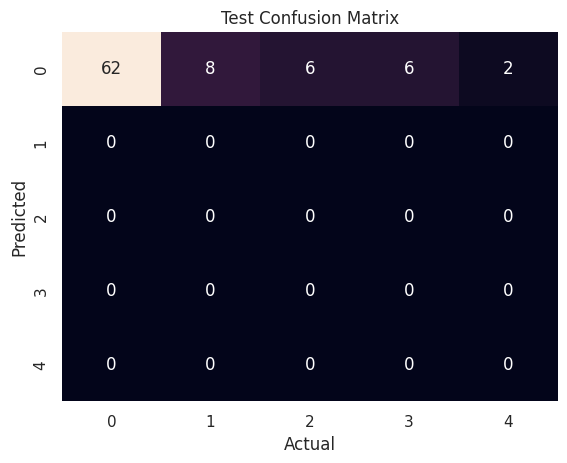

Classification report
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.74        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.54      0.74      0.63        84



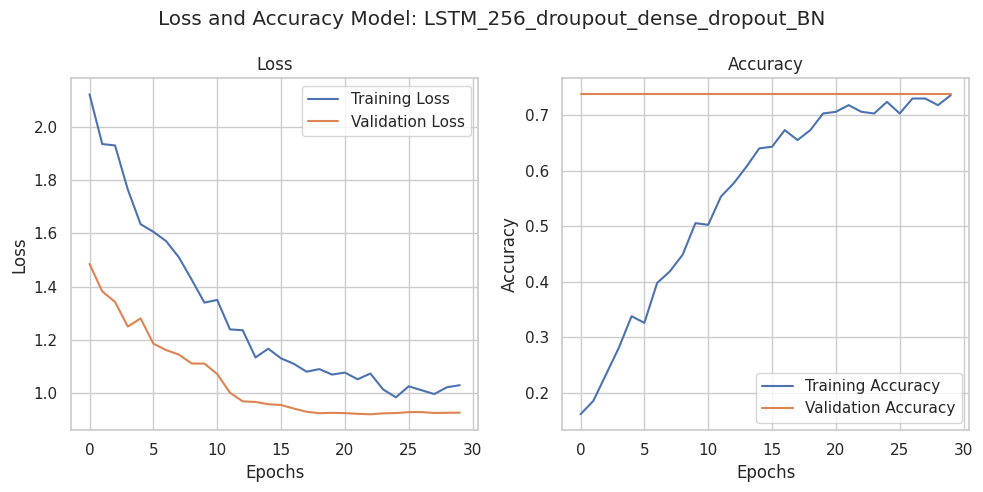

In [ ]:
result=function_model("LSTM_256_droupout_dense_dropout_BN",model3, history3, X_train,y_train,X_test,y_test)
lstm_model_summary=lstm_model_summary.append(result)
lstm_model_summary.reset_index(drop=True, inplace=True)

### Trying Stacked LSTM

In [ ]:
#preparing model5

tf.keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model5 = tf.keras.Sequential()

model5.add(tf.keras.layers.Embedding(desired_vocab_size + 1, #Vocablury size
                  embedding_vector_length, #Embedding size
                  weights=[embedding_matrix], #Embeddings taken from pre-trained model5
                  trainable=False, #As embeddings are already available, we will not train this layer. It will act as lookup layer.
                  input_length=max_review_length) #Number of words in each review
      )

model5.add(tf.keras.layers.Dropout(0.3))

model5.add(tf.keras.layers.LSTM(256, return_sequences=True)) #RNN State - size of cell state and hidden state
model5.add(tf.keras.layers.Dropout(0.3))
model5.add(tf.keras.layers.LSTM(128)) #RNN State - size of cell state and hidden state
model5.add(tf.keras.layers.Dropout(0.3))


#model5.add(tf.keras.layers.Dense(256, activation='relu'))
#model5.add(tf.keras.layers.Dropout(0.3))

model5.add(tf.keras.layers.Dense(128, activation='relu'))
model5.add(tf.keras.layers.Dropout(0.5))
model5.add(tf.keras.layers.BatchNormalization())

model5.add(tf.keras.layers.Dense(64, activation='relu'))
model5.add(tf.keras.layers.Dropout(0.5))
model5.add(tf.keras.layers.BatchNormalization())

model5.add(tf.keras.layers.Dense(32, activation='relu'))
model5.add(tf.keras.layers.Dropout(0.5))
model5.add(tf.keras.layers.BatchNormalization())

model5.add(tf.keras.layers.Dense(16, activation='relu'))
model5.add(tf.keras.layers.Dropout(0.5))
model5.add(tf.keras.layers.BatchNormalization())

model5.add(tf.keras.layers.Dense(5, activation='softmax')) #output


#model5 summary
model5.summary()


#Compile the model5
model5.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history5=model5.fit(X_train,y_train, validation_data=(X_test,y_test),
            epochs=30,
            batch_size=16,
            verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 215, 200)          2000200   
                                                                 
 dropout (Dropout)           (None, 215, 200)          0         
                                                                 
 lstm (LSTM)                 (None, 215, 256)          467968    
                                                                 
 dropout_1 (Dropout)         (None, 215, 256)          0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               197120    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 128)               1

Model:  stackedLSTM
3/3 [==============================] - 1s 15ms/step
Train Accuracy score:  0.7395209670066833
Test Accuracy score:  0.738095223903656


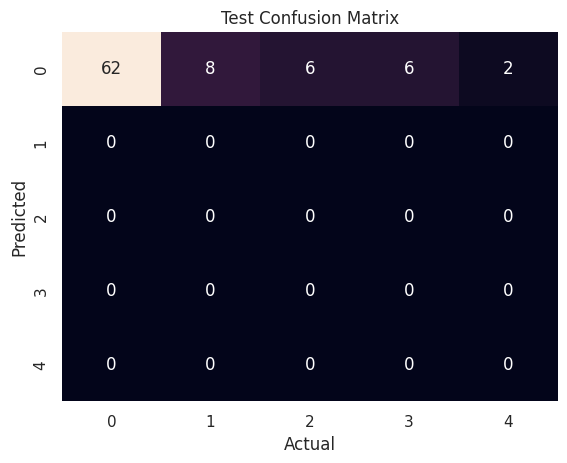

Classification report
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.74        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.54      0.74      0.63        84



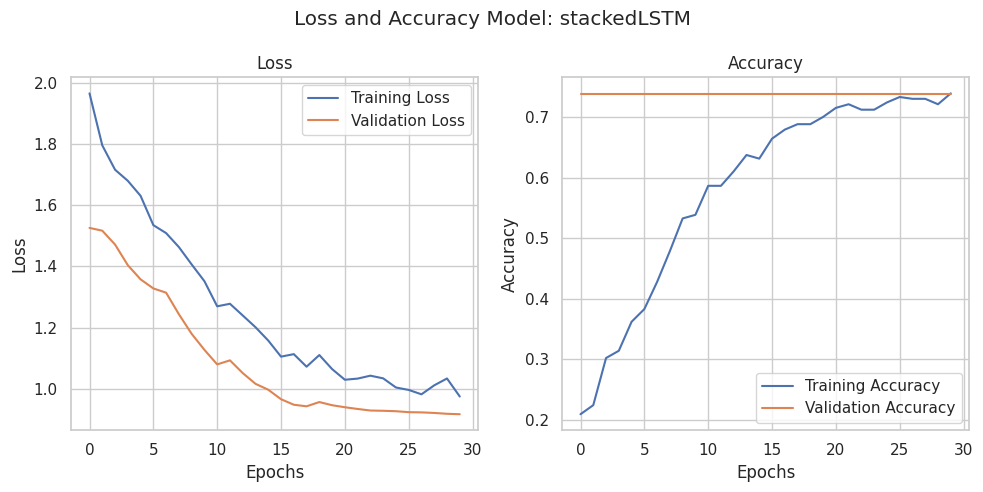

In [ ]:
result=function_model("stackedLSTM",model5, history5, X_train,y_train,X_test,y_test)
lstm_model_summary=lstm_model_summary.append(result)
lstm_model_summary.reset_index(drop=True, inplace=True)

### Trying Bi-directional LSTM

In [ ]:
#preparing model_bidirectional_LSTM

tf.keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model_bidirectional_LSTM = tf.keras.Sequential()

model_bidirectional_LSTM.add(tf.keras.layers.Embedding(desired_vocab_size + 1, #Vocablury size
                  embedding_vector_length, #Embedding size
                  weights=[embedding_matrix], #Embeddings taken from pre-trained model_bidirectional_LSTM
                  trainable=False, #As embeddings are already available, we will not train this layer. It will act as lookup layer.
                  input_length=max_review_length) #Number of words in each review
      )

model_bidirectional_LSTM.add(tf.keras.layers.Dropout(0.3))

model_bidirectional_LSTM.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256), merge_mode='sum'))
#model_bidirectional_LSTM.add(tf.keras.layers.LSTM(256, return_sequences=True)) #RNN State - size of cell state and hidden state
model_bidirectional_LSTM.add(tf.keras.layers.Dropout(0.3))


#model_bidirectional_LSTM.add(tf.keras.layers.Dense(256, activation='relu'))
#model_bidirectional_LSTM.add(tf.keras.layers.Dropout(0.3))

model_bidirectional_LSTM.add(tf.keras.layers.Dense(128, activation='relu'))
model_bidirectional_LSTM.add(tf.keras.layers.Dropout(0.5))
model_bidirectional_LSTM.add(tf.keras.layers.BatchNormalization())

model_bidirectional_LSTM.add(tf.keras.layers.Dense(64, activation='relu'))
model_bidirectional_LSTM.add(tf.keras.layers.Dropout(0.5))
model_bidirectional_LSTM.add(tf.keras.layers.BatchNormalization())

model_bidirectional_LSTM.add(tf.keras.layers.Dense(32, activation='relu'))
model_bidirectional_LSTM.add(tf.keras.layers.Dropout(0.5))
model_bidirectional_LSTM.add(tf.keras.layers.BatchNormalization())

model_bidirectional_LSTM.add(tf.keras.layers.Dense(16, activation='relu'))
model_bidirectional_LSTM.add(tf.keras.layers.Dropout(0.5))
model_bidirectional_LSTM.add(tf.keras.layers.BatchNormalization())

model_bidirectional_LSTM.add(tf.keras.layers.Dense(5, activation='softmax')) #output


#model_bidirectional_LSTM summary
model_bidirectional_LSTM.summary()


#Compile the model_bidirectional_LSTM
model_bidirectional_LSTM.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history_bi_lstm=model_bidirectional_LSTM.fit(X_train,y_train, validation_data=(X_test,y_test),
            epochs=100,
            batch_size=16,
            verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 215, 200)          2000200   
                                                                 
 dropout (Dropout)           (None, 215, 200)          0         
                                                                 
 bidirectional (Bidirection  (None, 256)               935936    
 al)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                        

Model:  Bi-directional_LSTM
3/3 [==============================] - 1s 17ms/step
Train Accuracy score:  0.7395209670066833
Test Accuracy score:  0.738095223903656


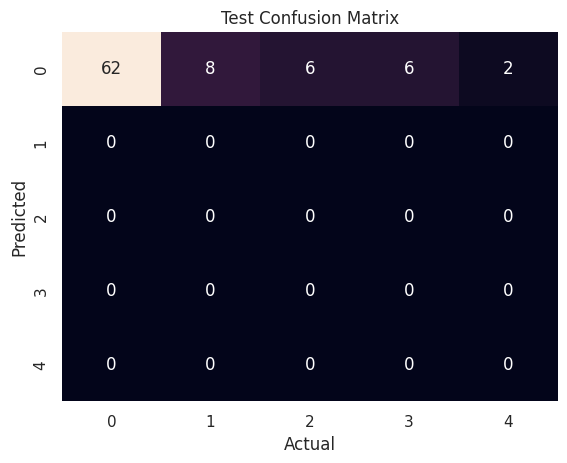

Classification report
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.74        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.54      0.74      0.63        84



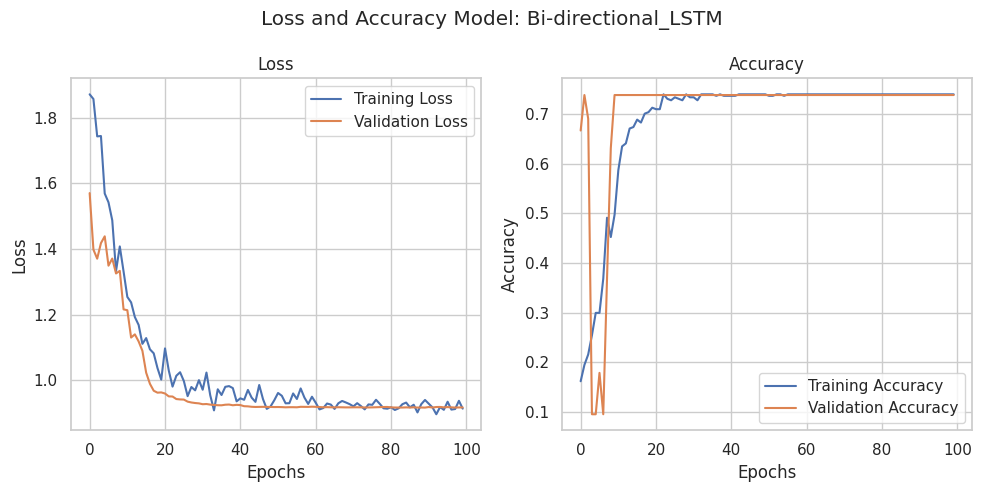

In [ ]:
result=function_model("Bi-directional_LSTM",model_bidirectional_LSTM, history_bi_lstm, X_train,y_train,X_test,y_test)
lstm_model_summary=lstm_model_summary.append(result)
lstm_model_summary.reset_index(drop=True, inplace=True)

### trying bi-directional LSTM with reduce LR and early stopping

In [ ]:
#preparing model5

tf.keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model5 = tf.keras.Sequential()

model5.add(tf.keras.layers.Embedding(desired_vocab_size + 1, #Vocablury size
                  embedding_vector_length, #Embedding size
                  weights=[embedding_matrix], #Embeddings taken from pre-trained model5
                  trainable=False, #As embeddings are already available, we will not train this layer. It will act as lookup layer.
                  input_length=max_review_length) #Number of words in each review
      )

model5.add(tf.keras.layers.Dropout(0.3))

model5.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256), merge_mode='sum'))
#model5.add(tf.keras.layers.LSTM(256, return_sequences=True)) #RNN State - size of cell state and hidden state
model5.add(tf.keras.layers.Dropout(0.3))


#model5.add(tf.keras.layers.Dense(256, activation='relu'))
#model5.add(tf.keras.layers.Dropout(0.3))

model5.add(tf.keras.layers.Dense(128, activation='relu'))
model5.add(tf.keras.layers.Dropout(0.5))
model5.add(tf.keras.layers.BatchNormalization())

model5.add(tf.keras.layers.Dense(64, activation='relu'))
model5.add(tf.keras.layers.Dropout(0.5))
model5.add(tf.keras.layers.BatchNormalization())

model5.add(tf.keras.layers.Dense(32, activation='relu'))
model5.add(tf.keras.layers.Dropout(0.5))
model5.add(tf.keras.layers.BatchNormalization())

model5.add(tf.keras.layers.Dense(16, activation='relu'))
model5.add(tf.keras.layers.Dropout(0.5))
model5.add(tf.keras.layers.BatchNormalization())

model5.add(tf.keras.layers.Dense(5, activation='softmax')) #output


#model5 summary
model5.summary()


#Compile the model5
model5.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, min_delta=1E-3)


# Define the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-8, verbose=1)

history5=model5.fit(X_train,y_train, validation_data=(X_test,y_test),
            epochs=100,
            batch_size=16,
            callbacks=[early_stopping, reduce_lr],
            verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 215, 200)          2000200   
                                                                 
 dropout (Dropout)           (None, 215, 200)          0         
                                                                 
 bidirectional (Bidirection  (None, 256)               935936    
 al)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                        

Model:  Bi-directional_LSTM_early_stop_reducedLR
3/3 [==============================] - 1s 17ms/step
Train Accuracy score:  0.7395209670066833
Test Accuracy score:  0.738095223903656


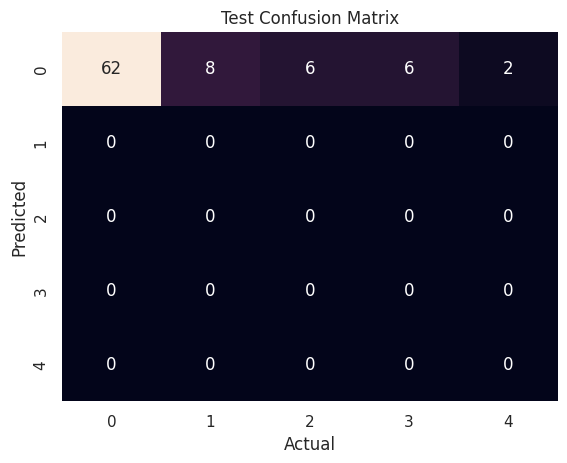

Classification report
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.74        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.54      0.74      0.63        84



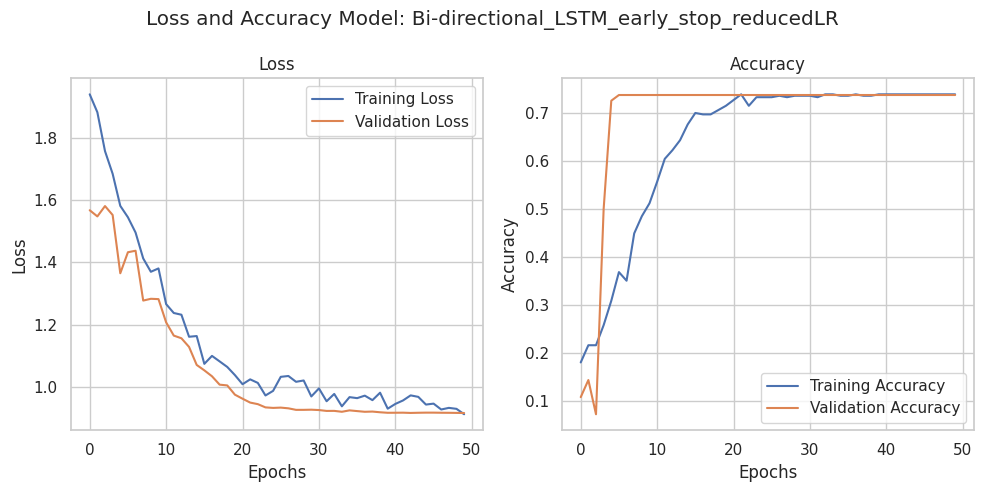

In [ ]:
result=function_model("Bi-directional_LSTM_early_stop_reducedLR",model5, history5, X_train,y_train,X_test,y_test)
lstm_model_summary=lstm_model_summary.append(result)
lstm_model_summary.reset_index(drop=True, inplace=True)

### trying bi-directional LSTM with reduce LR and no embedding weight

In [ ]:
#preparing model_bidirectional_LSTM_noembweight

tf.keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model_bidirectional_LSTM_noembweight = tf.keras.Sequential()

model_bidirectional_LSTM_noembweight.add(tf.keras.layers.Embedding(desired_vocab_size + 1, #Vocablury size
                  embedding_vector_length, #Embedding size
                  #weights=[embedding_matrix], #Embeddings taken from pre-trained model_bidirectional_LSTM_noembweight
                  #trainable=False, #As embeddings are already available, we will not train this layer. It will act as lookup layer.
                  input_length=max_review_length) #Number of words in each review
      )

model_bidirectional_LSTM_noembweight.add(tf.keras.layers.Dropout(0.3))

model_bidirectional_LSTM_noembweight.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256), merge_mode='sum'))
#model_bidirectional_LSTM_noembweight.add(tf.keras.layers.LSTM(256, return_sequences=True)) #RNN State - size of cell state and hidden state
model_bidirectional_LSTM_noembweight.add(tf.keras.layers.Dropout(0.3))


#model_bidirectional_LSTM_noembweight.add(tf.keras.layers.Dense(256, activation='relu'))
#model_bidirectional_LSTM_noembweight.add(tf.keras.layers.Dropout(0.3))

model_bidirectional_LSTM_noembweight.add(tf.keras.layers.Dense(128, activation='relu'))
model_bidirectional_LSTM_noembweight.add(tf.keras.layers.Dropout(0.5))
model_bidirectional_LSTM_noembweight.add(tf.keras.layers.BatchNormalization())

model_bidirectional_LSTM_noembweight.add(tf.keras.layers.Dense(64, activation='relu'))
model_bidirectional_LSTM_noembweight.add(tf.keras.layers.Dropout(0.5))
model_bidirectional_LSTM_noembweight.add(tf.keras.layers.BatchNormalization())

model_bidirectional_LSTM_noembweight.add(tf.keras.layers.Dense(32, activation='relu'))
model_bidirectional_LSTM_noembweight.add(tf.keras.layers.Dropout(0.5))
model_bidirectional_LSTM_noembweight.add(tf.keras.layers.BatchNormalization())

model_bidirectional_LSTM_noembweight.add(tf.keras.layers.Dense(16, activation='relu'))
model_bidirectional_LSTM_noembweight.add(tf.keras.layers.Dropout(0.5))
model_bidirectional_LSTM_noembweight.add(tf.keras.layers.BatchNormalization())

model_bidirectional_LSTM_noembweight.add(tf.keras.layers.Dense(5, activation='softmax')) #output


#model_bidirectional_LSTM_noembweight summary
model_bidirectional_LSTM_noembweight.summary()


#Compile the model_bidirectional_LSTM_noembweight
model_bidirectional_LSTM_noembweight.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Define the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.01, patience=8, min_lr=1e-8, verbose=1)

history_bi_lstm__noembweight=model_bidirectional_LSTM_noembweight.fit(X_train,y_train, validation_data=(X_test,y_test),
            epochs=100,
            batch_size=16,
            callbacks=reduce_lr,
            verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 215, 200)          2000200   
                                                                 
 dropout (Dropout)           (None, 215, 200)          0         
                                                                 
 bidirectional (Bidirection  (None, 256)               935936    
 al)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                        

Model:  Bi-directional_LSTM_ea_reducedLR_no_embeeding_weight
3/3 [==============================] - 1s 19ms/step
Train Accuracy score:  0.7395209670066833
Test Accuracy score:  0.738095223903656


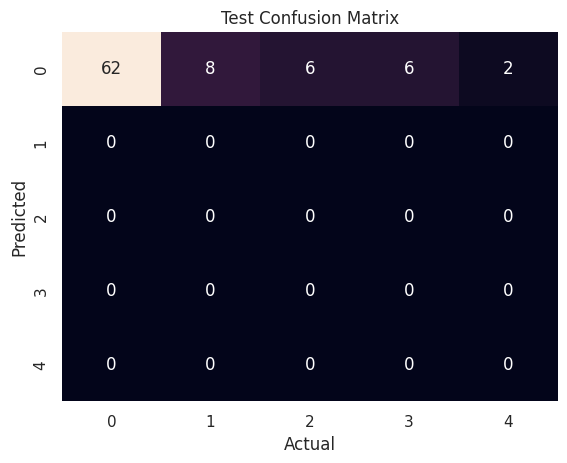

Classification report
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.74        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.54      0.74      0.63        84



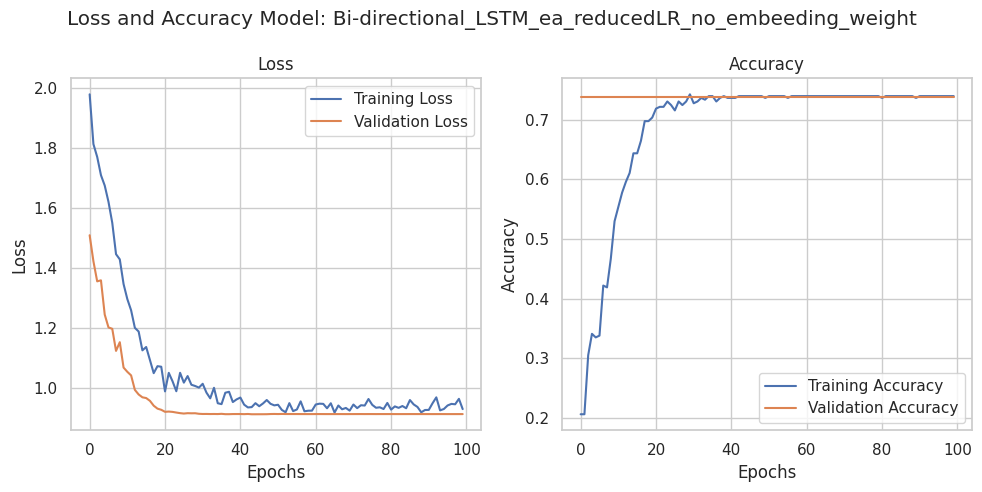

In [ ]:
result=function_model("Bi-directional_LSTM_ea_reducedLR_no_embeeding_weight",model_bidirectional_LSTM_noembweight, history_bi_lstm__noembweight, X_train,y_train,X_test,y_test)
lstm_model_summary=lstm_model_summary.append(result)
lstm_model_summary.reset_index(drop=True, inplace=True)

In [ ]:
lstm_model_summary

Model  Train Accuracy  \
0                                            LSTM_128            0.93   
1                                            LSTM_128            0.99   
2                                            LSTM_256            1.00   
3                                   LSTM_128_droupout            0.98   
4                                   LSTM_256_droupout            0.99   
5                             LSTM_256_droupout_dense            0.82   
6                     LSTM_256_droupout_dense_dropout            0.81   
7                  LSTM_256_droupout_dense_dropout_BN            0.74   
8                                         stackedLSTM            0.74   
9                                 Bi-directional_LSTM            0.74   
10           Bi-directional_LSTM_early_stop_reducedLR            0.74   
11  Bi-directional_LSTM_ea_reducedLR_no_embeeding_...            0.74   

    Test Accuracy  Precision  recall  f1 score  
0            0.58       0.57    0.58      0.57  
1            0.60       0.57    0.60      0.58  
2            0.63       0.55    0.63      0.59  
3            0.58       0.53    0.58      0.56  
4            0.55       0.52    0.55      0.53  
5            0.51       0.55    0.51      0.53  
6            0.68       0.56    0.68      0.61  
7            0.74       0.54    0.74      0.63  
8            0.74       0.54    0.74      0.63  
9            0.74       0.54    0.74      0.63  
10           0.74       0.54    0.74      0.63  
11           0.74       0.54    0.74      0.63

### Lets try SMOTE

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((334, 215), (84, 215), (334, 5), (84, 5))

In [ ]:
smote=SMOTE(random_state=42)
X_train_smote,y_train_smote= smote.fit_resample(X_train, y_train)

In [ ]:
X_train_smote.shape, X_test.shape, y_train_smote.shape, y_test.shape

((1235, 215), (84, 215), (1235, 5), (84, 5))

In [ ]:
#checking distribution
np.unique(np.argmax(y_train_smote, axis=1), return_counts=True)

(array([0, 1, 2, 3, 4]), array([247, 247, 247, 247, 247]))

In [ ]:
#lets check ANN Smote

#preparing model2

tf.keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model2 = tf.keras.Sequential()

model2.add(tf.keras.layers.Embedding(desired_vocab_size + 1, #Vocablury size
                                    embedding_vector_length, #Embedding size
                                    weights=[embedding_matrix], #Embeddings taken from pre-trained model2
                                    trainable=False, #As embeddings are already available, we will not train this layer. It will act as lookup layer.
                                    input_length=max_review_length) #Number of words in each review
          )

#Flatten the data as we will use Dense layers
model2.add(tf.keras.layers.Flatten())

model2.add(tf.keras.layers.Dense(256, activation='relu', kernel_initializer='he_uniform'))
model2.add(tf.keras.layers.Dropout(0.5))
model2.add(tf.keras.layers.BatchNormalization())

model2.add(tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
model2.add(tf.keras.layers.Dropout(0.5))
model2.add(tf.keras.layers.BatchNormalization())

model2.add(tf.keras.layers.Dense(64, activation='relu', kernel_initializer='he_uniform'))
model2.add(tf.keras.layers.Dropout(0.5))
model2.add(tf.keras.layers.BatchNormalization())

model2.add(tf.keras.layers.Dense(32, activation='relu',kernel_initializer='he_uniform' ))
model2.add(tf.keras.layers.Dropout(0.3))
model2.add(tf.keras.layers.BatchNormalization())

model2.add(tf.keras.layers.Dense(16, activation='relu', kernel_initializer='he_uniform'))
model2.add(tf.keras.layers.Dropout(0.3))
model2.add(tf.keras.layers.BatchNormalization())

model2.add(tf.keras.layers.Dense(5, activation='softmax')) #output


#model2 summary
model2.summary()


#Compile the model2
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


# Define the EarlyStopping callback
#early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True, min_delta=1E-3)


# Define the ReduceLROnPlateau callback
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-8, verbose=1)

history2=model2.fit(X_train_smote,y_train_smote, validation_data=(X_test,y_test),
                   epochs=100,
                   batch_size=8,
                   #callbacks=[reduce_lr],
                   verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 215, 200)          2000200   
                                                                 
 flatten (Flatten)           (None, 43000)             0         
                                                                 
 dense (Dense)               (None, 256)               11008256  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                        

Model:  SMOTE_ANN_5_Layers_BN_dropout
3/3 [==============================] - 0s 5ms/step
Train Accuracy score:  0.4234817922115326
Test Accuracy score:  0.4523809552192688


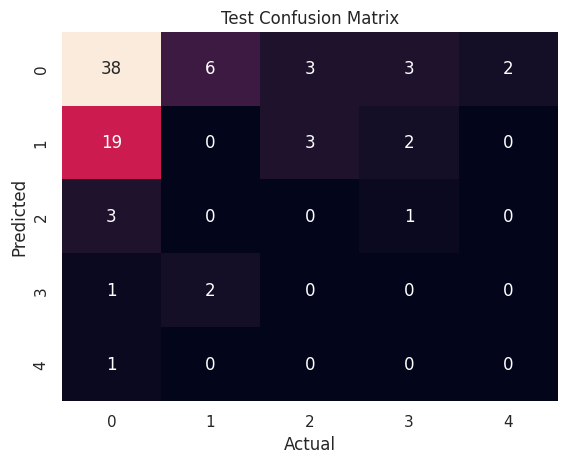

Classification report
              precision    recall  f1-score   support

           0       0.73      0.61      0.67        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.45        84
   macro avg       0.15      0.12      0.13        84
weighted avg       0.54      0.45      0.49        84



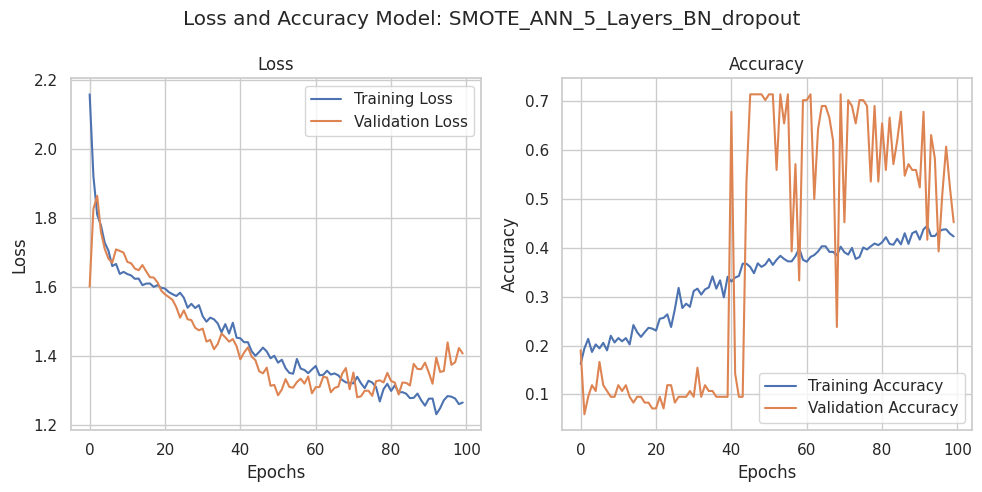

In [ ]:
result=function_model("SMOTE_ANN_5_Layers_BN_dropout",model2, history2, X_train_smote,y_train_smote,X_test,y_test)
lstm_model_summary=lstm_model_summary.append(result)
lstm_model_summary.reset_index(drop=True, inplace=True)

### lets try SMOTE with Bidirectional LSTM

In [ ]:
#preparing model8

tf.keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model8 = tf.keras.Sequential()

model8.add(tf.keras.layers.Embedding(desired_vocab_size + 1, #Vocablury size
                  embedding_vector_length, #Embedding size
                  weights=[embedding_matrix], #Embeddings taken from pre-trained model8
                  #trainable=False, #As embeddings are already available, we will not train this layer. It will act as lookup layer.
                  input_length=max_review_length) #Number of words in each review
      )

model8.add(tf.keras.layers.Dropout(0.3))

model8.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256), merge_mode='sum'))
#model8.add(tf.keras.layers.LSTM(256, return_sequences=True)) #RNN State - size of cell state and hidden state
model8.add(tf.keras.layers.Dropout(0.3))


#model8.add(tf.keras.layers.Dense(256, activation='relu'))
#model8.add(tf.keras.layers.Dropout(0.3))

model8.add(tf.keras.layers.Dense(128, activation='relu'))
model8.add(tf.keras.layers.Dropout(0.5))
model8.add(tf.keras.layers.BatchNormalization())

model8.add(tf.keras.layers.Dense(64, activation='relu'))
model8.add(tf.keras.layers.Dropout(0.5))
model8.add(tf.keras.layers.BatchNormalization())

model8.add(tf.keras.layers.Dense(32, activation='relu'))
model8.add(tf.keras.layers.Dropout(0.5))
model8.add(tf.keras.layers.BatchNormalization())

model8.add(tf.keras.layers.Dense(16, activation='relu'))
model8.add(tf.keras.layers.Dropout(0.5))
model8.add(tf.keras.layers.BatchNormalization())

model8.add(tf.keras.layers.Dense(5, activation='softmax')) #output


#model8 summary
model8.summary()


#Compile the model8
model8.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, min_delta=1E-3)


# Define the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-8, verbose=1)

history8=model8.fit(X_train_smote,y_train_smote, validation_data=(X_test,y_test),
            epochs=100,
            batch_size=32,
#            callbacks=[early_stopping, reduce_lr],
            verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 215, 200)          2000200   
                                                                 
 dropout (Dropout)           (None, 215, 200)          0         
                                                                 
 bidirectional (Bidirection  (None, 256)               935936    
 al)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                        

Model:  Smote_Bi-directional_LSTM_early_stop_reducedLR
3/3 [==============================] - 1s 17ms/step
Train Accuracy score:  0.21052631735801697
Test Accuracy score:  0.02380952425301075


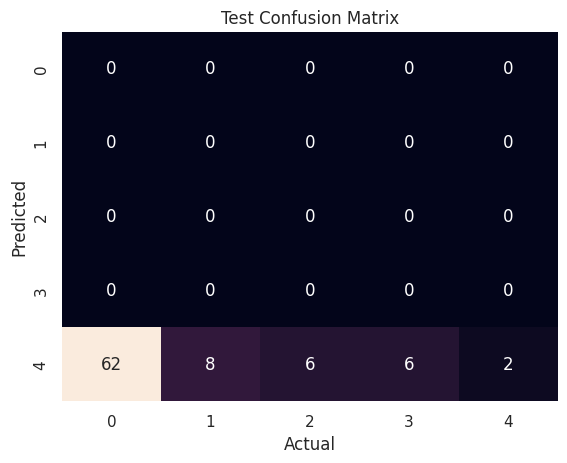

Classification report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.02      1.00      0.05         2

    accuracy                           0.02        84
   macro avg       0.00      0.20      0.01        84
weighted avg       0.00      0.02      0.00        84



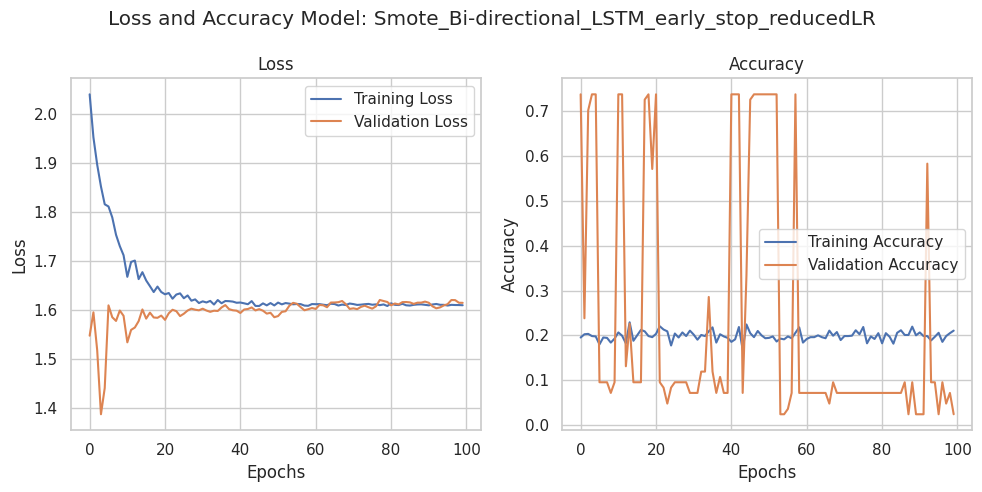

In [ ]:
result=function_model("Smote_Bi-directional_LSTM_early_stop_reducedLR",model8, history8, X_train_smote,y_train_smote,X_test,y_test)
lstm_model_summary=lstm_model_summary.append(result)
lstm_model_summary.reset_index(drop=True, inplace=True)

## Trying text augmentation

In [ ]:
cleaned_data

Country     Local Industry Sector  Gender         Employee Type  \
0    Country_01  Local_01          Mining    Male           Third Party   
1    Country_02  Local_02          Mining    Male              Employee   
2    Country_01  Local_03          Mining    Male  Third Party (Remote)   
3    Country_01  Local_04          Mining    Male           Third Party   
4    Country_01  Local_04          Mining    Male           Third Party   
..          ...       ...             ...     ...                   ...   
413  Country_01  Local_04          Mining    Male           Third Party   
414  Country_01  Local_03          Mining  Female              Employee   
415  Country_02  Local_09          Metals    Male              Employee   
416  Country_02  Local_05          Metals    Male              Employee   
417  Country_01  Local_04          Mining  Female           Third Party   

                    Critical Risk  Year    Month  Day    Weekday  WeekofYear  \
0                         Pressed  2016  January    1     Friday          53   
1             Pressurized Systems  2016  January    2   Saturday          53   
2                    Manual Tools  2016  January    6  Wednesday           1   
3                          Others  2016  January    8     Friday           1   
4                          Others  2016  January   10     Sunday           1   
..                            ...   ...      ...  ...        ...         ...   
413                        Others  2017     July    4    Tuesday          27   
414                        Others  2017     July    4    Tuesday          27   
415              Venomous Animals  2017     July    5  Wednesday          27   
416                           Cut  2017     July    6   Thursday          27   
417  Fall prevention (same level)  2017     July    9     Sunday          27   

     season is_holiday                                  clean_description  \
0    Summer        Yes  while removing the drill rod of the jumbo for ...   
1    Summer         No  during the activation of a sodium sulphide pum...   
2    Summer         No  in the substation milpo located at level when ...   
3    Summer         No  being am approximately in the nv cx ob the per...   
4    Summer         No  approximately at am in circumstances that the ...   
..      ...        ...                                                ...   
413  Winter         No  being approximately am approximately when lift...   
414  Winter         No  the collaborator moved from the infrastructure...   
415  Winter         No  during the environmental monitoring activity i...   
416  Winter         No  the employee performed the activity of strippi...   
417  Winter         No  at am when the assistant cleaned the floor of ...   

                                       all_description  
0    Country Country_01 Local Local_01 Industry Sec...  
1    Country Country_02 Local Local_02 Industry Sec...  
2    Country Country_01 Local Local_03 Industry Sec...  
3    Country Country_01 Local Local_04 Industry Sec...  
4    Country Country_01 Local Local_04 Industry Sec...  
..                                                 ...  
413  Country Country_01 Local Local_04 Industry Sec...  
414  Country Country_01 Local Local_03 Industry Sec...  
415  Country Country_02 Local Local_09 Industry Sec...  
416  Country Country_02 Local Local_05 Industry Sec...  
417  Country Country_01 Local Local_04 Industry Sec...  

[418 rows x 15 columns]

In [ ]:
cleaned_data['all_description']

0      Country Country_01 Local Local_01 Industry Sec...
1      Country Country_02 Local Local_02 Industry Sec...
2      Country Country_01 Local Local_03 Industry Sec...
3      Country Country_01 Local Local_04 Industry Sec...
4      Country Country_01 Local Local_04 Industry Sec...
                             ...                        
413    Country Country_01 Local Local_04 Industry Sec...
414    Country Country_01 Local Local_03 Industry Sec...
415    Country Country_02 Local Local_09 Industry Sec...
416    Country Country_02 Local Local_05 Industry Sec...
417    Country Country_01 Local Local_04 Industry Sec...
Name: all_description, Length: 418, dtype: object

In [ ]:
y.shape

(418, 5)

In [ ]:
np.unique(np.argmax(y, axis=1), return_counts=True)

(array([0, 1, 2, 3, 4]), array([309,  40,  31,  30,   8]))

In [ ]:
y

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(cleaned_data['all_description'],y, test_size=0.2,random_state=42, stratify=y)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((334,), (84,), (334, 5), (84, 5))

In [ ]:
np.unique(np.argmax(y_test, axis=1), return_counts=True)

(array([0, 1, 2, 3, 4]), array([62,  8,  6,  6,  2]))

In [ ]:
np.unique(np.argmax(y_train, axis=1), return_counts=True)

(array([0, 1, 2, 3, 4]), array([247,  32,  25,  24,   6]))

In [ ]:
train_df=pd.concat(
    [pd.DataFrame(X_train).reset_index(drop=True), pd.DataFrame(np.argmax(y_train,axis=1))], axis=1)

In [ ]:
train_df = train_df.rename(columns={'all_description': 'Description', 0: 'Accident Level'})


In [ ]:
train_df.head(1)

Description  Accident Level
0  Country Country_01 Local Local_03 Industry Sec...               0

In [ ]:
train_df['Accident Level'].value_counts()

0    247
1     32
2     25
3     24
4      6
Name: Accident Level, dtype: int64

In [ ]:
!pip install missingno -q
!pip install hvplot -q
!pip install transformers -q
!pip install nlpaug -q
!pip install sacremoses -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 10.4 MB/s eta 0:00:00


In [ ]:
import random, re
import time
import warnings
import missingno as mno

import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from tqdm import tqdm
from nltk.corpus import stopwords

from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas
import nlpaug.flow as nafc
from nlpaug.util import Action



%matplotlib inline


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def augment_data_with_back_translation(text, label):
    # Initialize the back translation augmenter
    aug_bt = naw.BackTranslationAug(
        from_model_name='facebook/wmt19-en-de',
        to_model_name='facebook/wmt19-de-en',
        device='cuda'
    )

    # Perform back translation augmentation on the input text
    augmented_text = aug_bt.augment(text)

    # Return the augmented text along with the original label
    return augmented_text, label


def create_text_augmentations(text, label):
    models = ['bert-base-uncased', 'distilbert-base-uncased', 'roberta-base']
    actions = ['substitute', 'insert']
    augmentations = []

    # Initialize the augmenters
    for model_name in models:
        for action in actions:
            augmenter = naw.ContextualWordEmbsAug(
                model_path=model_name,
                action=action,
                device='cpu'  # Change 'cuda' to 'cpu' if GPU is not available
            )

            # Generate augmented text
            augmented_text = augmenter.augment(text)

            # Append augmented text and label to the list
            augmentations.append((augmented_text, label))

    return augmentations


In [ ]:
import tqdm
import pickle

def augment_minority_classes(dataset, label_column, output_file):
    majority_count = dataset[label_column].value_counts().max()
    minority_classes = dataset[label_column].value_counts().index[dataset[label_column].value_counts() < majority_count]

    augmented_data = []

    # Load previously processed data if exists
    try:
        with open(output_file, 'rb') as file:
            augmented_data = pickle.load(file)
            last_label = augmented_data[-1]['Accident Level']
            start_index = dataset[label_column].value_counts().index.get_loc(last_label) + 1
            minority_classes = dataset[label_column].value_counts().index[start_index:]
            print(f"Starting from index : {start_index}")

    except FileNotFoundError:
        pass

    with tqdm.tqdm(total=len(minority_classes), desc="Augmenting Minority Classes") as pbar:
        for minority_class in minority_classes:
            print(f"Now Executing minority_class : {minority_class}")
            minority_data = dataset[dataset[label_column] == minority_class].copy()
            minority_data = minority_data[['Description', label_column]]  # Select only the 'Description' and 'Accident Level' columns

            minority_data_count = len(minority_data)

            while minority_data_count < majority_count:
                for index, row in minority_data.iterrows():
                    text = str(row['Description'])  # Convert to string to handle non-string values
                    label = row[label_column]

                    # Apply augmentation functions
                    augmented_text_bt, augmented_label_bt = augment_data_with_back_translation(text, label)
                    augmented_texts_cwe = create_text_augmentations(text, label)

                    # Add original and augmented data to the list
                    augmented_data.append({'Description': text, 'Accident Level': label})
                    augmented_data.append({'Description': augmented_text_bt, 'Accident Level': augmented_label_bt})
                    minority_data_count += 2

                    text_length = len(text.split())
                    max_length = int(text_length * 0.5)
                    min_length = int(text_length * 0.2)
                    summary_text = summarize_minority_classes(text, max_length, min_length)
                    augmented_data.append({'Description': summary_text, 'Accident Level': label})
                    minority_data_count += 1

                    for augmented_text, augmented_label in augmented_texts_cwe:
                        augmented_data.append({'Description': augmented_text, 'Accident Level': augmented_label})
                        minority_data_count += 1

                    if minority_data_count % 100 == 0:
                        print(minority_data_count)

                    # Check if minority_data_count exceeds or matches majority_count, then break out of the loop
                    if minority_data_count >= majority_count:
                        break

                # Write augmented data to file after processing each class
                with open(output_file, 'wb') as file:
                    pickle.dump(augmented_data, file)

                pbar.update(1)

            augmented_data.extend(minority_data.to_dict(orient='records'))

    # Convert the list of dictionaries to a DataFrame with 'Description' and 'Accident Level' columns
    print(augmented_data)
    augmented_df = pd.DataFrame(augmented_data, columns=['Description', 'Accident Level'])

    return augmented_df


In [ ]:
from transformers import pipeline

def summarize_minority_classes(description,  max_length,min_length):
    # Initialize the summarization pipeline
    summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

    # Generate summary using the pipeline
    summary = summarizer(description, max_length=max_length, min_length=min_length, do_sample=True)

    # Return summary text along with the label
    return {'Description': summary[0]['summary_text']}

In [ ]:
create_text_augmentations('hello I got injured very badly and head broke', 0)

[(['hello i got stuck very heavily in head broke'], 0),
 (['hello i got up injured very badly late and the head broke'], 0),
 (['kang kim got injured very badly and nearly broke'], 0),
 (['hello uncle i got injured badly very badly and bruised head broke'], 0),
 (['hello I got there very early and hand broke'], 0),
 (['hello I got injured pretty very quite badly and half head broke'], 0)]

In [ ]:
import spacy

!python -m spacy download en_core_web_md --quiet

# Load the spaCy model
nlp = spacy.load("en_core_web_md")

se1='hello i got stuck very heavily in head broke'
se2='hello i got up injured very badly late and the head broke'
se3='hello I got injured pretty very quite badly and half head broke'

doc1=nlp(se1)
doc2=nlp(se2)
doc3=nlp(se3)


print(doc1.similarity(doc2))
print(doc1.similarity(doc3))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 13.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
0.8135950380404123
0.8195588199293271


In [ ]:
train_df

Description  Accident Level
0    Country Country_01 Local Local_03 Industry Sec...               0
1    Country Country_01 Local Local_04 Industry Sec...               2
2    Country Country_01 Local Local_04 Industry Sec...               0
3    Country Country_01 Local Local_06 Industry Sec...               0
4    Country Country_01 Local Local_03 Industry Sec...               0
..                                                 ...             ...
329  Country Country_01 Local Local_03 Industry Sec...               0
330  Country Country_01 Local Local_06 Industry Sec...               0
331  Country Country_01 Local Local_03 Industry Sec...               0
332  Country Country_02 Local Local_02 Industry Sec...               0
333  Country Country_02 Local Local_05 Industry Sec...               0

[334 rows x 2 columns]

In [ ]:
train_df['Accident Level'].value_counts()

0    247
1     32
2     25
3     24
4      6
Name: Accident Level, dtype: int64

In [ ]:
output_file = "/content/sample_data/output_file1.pkl"

augmented_minority_df = augment_minority_classes(train_df, 'Accident Level',output_file)

Augmenting Minority Classes:   0%|          | 0/4 [00:00<?, ?it/s]

Now Executing minority_class : 1


config.json:   0%|          | 0.00/825 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.08G [00:00<?, ?B/s]

Some weights of FSMTForConditionalGeneration were not initialized from the model checkpoint at facebook/wmt19-en-de and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/235 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/825 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.08G [00:00<?, ?B/s]

Some weights of FSMTForConditionalGeneration were not initialized from the model checkpoint at facebook/wmt19-de-en and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/260 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/67.0 [00:00<?, ?B/s]

vocab-src.json:   0%|          | 0.00/849k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/315k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/67.0 [00:00<?, ?B/s]

vocab-src.json:   0%|          | 0.00/849k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/315k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Augmenting Minority Classes:  25%|██▌       | 1/4 [15:37<46:53, 937.77s/it]

Now Executing minority_class : 2


Augmenting Minority Classes:  50%|█████     | 2/4 [35:00<35:40, 1070.28s/it]

Now Executing minority_class : 3


Augmenting Minority Classes: 100%|██████████| 4/4 [51:18<00:00, 627.48s/it] 

Now Executing minority_class : 4


Augmenting Minority Classes: 9it [1:10:45, 471.75s/it]

[{'Description': 'Country Country_02 Local Local_02 Industry Sector Mining Gender Male Employee Type Third Party (Remote) Critical Risk Others Year 2016 Month December Day 9 Weekday Friday WeekofYear 49 season Summer is_holiday No clean_description during the withdrawal of the metal form support screw in the inside of well when the bolt of the chain holder was loosened the employee and a helper exerted force on the combination wrench when the bolt came to loosen immediately pressing the ring finger of the employees right hand against the support', 'Accident Level': 1}, {'Description': ['Country Country _ 02 Local _ 02 Industry Sector Mining Gender Male Employee Type Third Party (Remote) Critical Risk Other Year 2016 Month December Day 9 Weekday Friday WeekofYear 49 season Summer is _ holiday No clean _ description during the removal of the metal form support screw in the inside of well when the bolts of the chain holder was loose the employee and a helper used force on the combi key wh

In [ ]:
file_path = "/content/sample_data/output_file1.pkl"


# Read the pickled object from the file
pickle_data = pd.read_pickle(file_path)

# Create a DataFrame from the list of dictionaries
augmented_minority_df = pd.DataFrame(pickle_data)

In [ ]:
augmented_minority_df['Accident Level'].value_counts()

2    250
3    249
1    248
4    243
Name: Accident Level, dtype: int64

In [ ]:
# Filter augmented_minority_df to include only rows where Accident Level is 'I'
filtered_data_df = train_df[train_df['Accident Level']==0]

# Drop the index of the original data DataFrame
filtered_data_df.reset_index(drop=True, inplace=True)

# Reset the index of the filtered augmented DataFrame
augmented_minority_df.reset_index(drop=True, inplace=True)

# Concatenate original data with filtered augmented data row-wise
stacked_df = pd.concat([filtered_data_df[['Description', 'Accident Level']], augmented_minority_df[['Description', 'Accident Level']]], ignore_index=True)

# Display the concatenated DataFrame
stacked_df.head(2)


Description  Accident Level
0  Country Country_01 Local Local_03 Industry Sec...               0
1  Country Country_01 Local Local_04 Industry Sec...               0

In [ ]:
# Shuffle the dataset
stacked_df = stacked_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
stacked_df['Accident Level'].value_counts()

2    250
3    249
1    248
0    247
4    243
Name: Accident Level, dtype: int64

In [ ]:
stacked_df.tail(15)

Description  Accident Level
1222  [country country _ 01 local local _ 03 industr...               3
1223  [country country _ 01 local local _ 03 industr...               1
1224  [country country _ 02 local local _ chapter 08...               3
1225  Country Country_03 Local Local_10 Industry Sec...               0
1226  Country Country_01 Local Local_03 Industry Sec...               3
1227  [country country _ 01 local local _ 04 industr...               4
1228  Country Country_01 Local Local_03 Industry Sec...               0
1229  {'Description': 'The worker made the cast of s...               1
1230  Country Country_02 Local Local_02 Industry Sec...               1
1231  Country Country_01 Local Local_03 Industry Sec...               0
1232  [relevant country _ 08 local local _ 04 indust...               4
1233  {'Description': 'Country Country_01 Local Loca...               4
1234  [Country Country _ 01 Local _ 03 Industry Sect...               4
1235  [Country Country_02 Local Local_07 Country Sec...               3
1236  [country country _ 01 local local _ 04 industr...               4

In [ ]:
# Correct rows that contain dictionaries
stacked_df['Description']=stacked_df['Description'].apply(lambda x: x if not isinstance(x, dict) else x['Description'])

In [ ]:
stacked_df.to_pickle('./stacked_df')

In [ ]:
stacked_df = pd.read_pickle('./stacked_df')

In [ ]:
stacked_df.tail(5)

Description  Accident Level
1232  [relevant country _ 08 local local _ 04 indust...               4
1233  Country Country_01 Local Local_04 Industry Sec...               4
1234  [Country Country _ 01 Local _ 03 Industry Sect...               4
1235  [Country Country_02 Local Local_07 Country Sec...               3
1236  [country country _ 01 local local _ 04 industr...               4

In [ ]:
X_train=stacked_df['Description']
y_train=tf.keras.utils.to_categorical(stacked_df['Accident Level'])


In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1237,), (1237, 5), (84,), (84, 5))

In [ ]:
desired_vocab_size = 10000 #Vocablury size
t= tf.keras.preprocessing.text.Tokenizer(num_words=desired_vocab_size)
t.fit_on_texts(X_train.tolist())

X_train = t.texts_to_sequences(X_train.tolist())
X_test = t.texts_to_sequences(X_test.tolist())

max_review_length=max(len(seq) for seq in X_train)
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train,
                                                        maxlen=max_review_length,
                                                        padding='pre',
                                                        truncating='post')
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test,
                                                       maxlen=max_review_length,
                                                       padding='pre',
                                                       truncating='post')


with open('glove_model.pkl', 'rb') as f:
    glove_model = pickle.load(f)

embedding_vector_length = glove_model.vector_size


with open('glove_embeeding_matrix.pkl', 'rb') as f:
    embedding_matrix = pickle.load(f)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1237, 215), (84, 215), (1237, 5), (84, 5))

In [ ]:
np.unique(np.argmax(y_test, axis=1), return_counts=True)

(array([0, 1, 2, 3, 4]), array([62,  8,  6,  6,  2]))

### Lets try Bidirectional LSTM with text augmentation

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Embedding(desired_vocab_size + 1, embedding_vector_length, input_length=max_review_length),  # Removed embedding_matrix argument (Optional: see previous explanation for pre-trained embeddings)
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(5, activation='softmax')  # Adjust for number of accident levels
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_test, y_test), verbose=1)  # Include validation data

Epoch 1/25
39/39 [==============================] - 24s 317ms/step - loss: 1.4588 - accuracy: 0.3137 - val_loss: 0.9902 - val_accuracy: 0.7381
Epoch 2/25
39/39 [==============================] - 9s 220ms/step - loss: 1.2754 - accuracy: 0.3961 - val_loss: 0.9769 - val_accuracy: 0.7143
Epoch 3/25
39/39 [==============================] - 11s 283ms/step - loss: 1.1403 - accuracy: 0.4406 - val_loss: 1.2169 - val_accuracy: 0.6310
Epoch 4/25
39/39 [==============================] - 9s 237ms/step - loss: 0.9434 - accuracy: 0.5942 - val_loss: 1.2215 - val_accuracy: 0.6905
Epoch 5/25
39/39 [==============================] - 5s 123ms/step - loss: 0.5358 - accuracy: 0.7728 - val_loss: 1.4591 - val_accuracy: 0.6429
Epoch 6/25
39/39 [==============================] - 5s 127ms/step - loss: 0.2488 - accuracy: 0.9256 - val_loss: 1.3148 - val_accuracy: 0.7143
Epoch 7/25
39/39 [==============================] - 3s 83ms/step - loss: 0.0953 - accuracy: 0.9814 - val_loss: 1.5743 - val_accuracy: 0.6786
Epoch

Model:  Bi-directional_LSTM_64_Textaug
3/3 [==============================] - 1s 21ms/step
Train Accuracy score:  0.995149552822113
Test Accuracy score:  0.6904761791229248


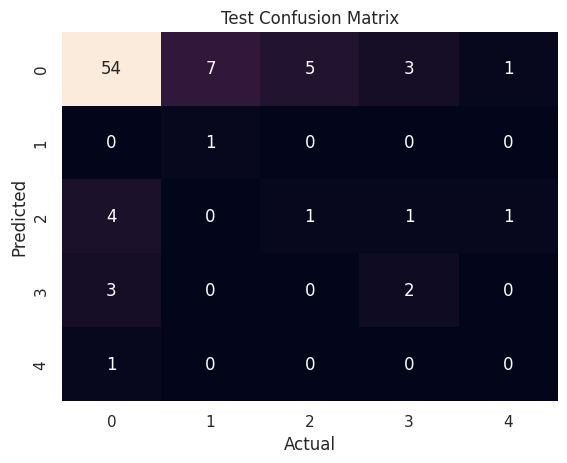

Classification report
              precision    recall  f1-score   support

           0       0.77      0.87      0.82        62
           1       1.00      0.12      0.22         8
           2       0.14      0.17      0.15         6
           3       0.40      0.33      0.36         6
           4       0.00      0.00      0.00         2

    accuracy                           0.69        84
   macro avg       0.46      0.30      0.31        84
weighted avg       0.70      0.69      0.66        84



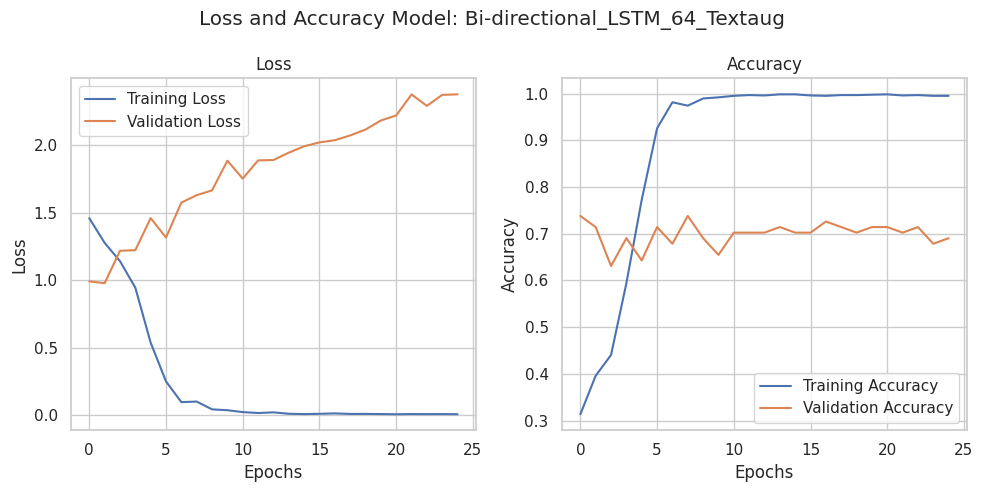

In [ ]:
result=function_model("Bi-directional_LSTM_64_Textaug",model, history, X_train,y_train,X_test,y_test)
lstm_model_summary=lstm_model_summary.append(result)
lstm_model_summary.reset_index(drop=True, inplace=True)

### Lets try Bidirectional LSTM 128 with dense layers text augmentation

In [ ]:
#preparing model_bi_lstm

tf.keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model_bi_lstm = tf.keras.Sequential()

model_bi_lstm.add(tf.keras.layers.Embedding(desired_vocab_size + 1, #Vocablury size
                  embedding_vector_length, #Embedding size
                  #weights=[embedding_matrix], #Embeddings taken from pre-trained model_bi_lstm
                  #trainable=False, #As embeddings are already available, we will not train this layer. It will act as lookup layer.
                  input_length=max_review_length) #Number of words in each review
      )

model_bi_lstm.add(tf.keras.layers.Dropout(0.3))

model_bi_lstm.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128), merge_mode='sum'))
#model_bi_lstm.add(tf.keras.layers.LSTM(256, return_sequences=True)) #RNN State - size of cell state and hidden state
model_bi_lstm.add(tf.keras.layers.Dropout(0.3))


#model_bi_lstm.add(tf.keras.layers.Dense(256, activation='relu'))
#model_bi_lstm.add(tf.keras.layers.Dropout(0.3))

#model_bi_lstm.add(tf.keras.layers.Dense(128, activation='relu'))
#model_bi_lstm.add(tf.keras.layers.Dropout(0.5))
#model_bi_lstm.add(tf.keras.layers.BatchNormalization())

model_bi_lstm.add(tf.keras.layers.Dense(64, activation='relu'))
model_bi_lstm.add(tf.keras.layers.Dropout(0.3))
#model_bi_lstm.add(tf.keras.layers.BatchNormalization())

model_bi_lstm.add(tf.keras.layers.Dense(32, activation='relu'))
model_bi_lstm.add(tf.keras.layers.Dropout(0.3))
#model_bi_lstm.add(tf.keras.layers.BatchNormalization())

model_bi_lstm.add(tf.keras.layers.Dense(16, activation='relu'))
model_bi_lstm.add(tf.keras.layers.Dropout(0.3))
#model_bi_lstm.add(tf.keras.layers.BatchNormalization())

model_bi_lstm.add(tf.keras.layers.Dense(5, activation='softmax')) #output


#model_bi_lstm summary
model_bi_lstm.summary()


#Compile the model_bi_lstm
model_bi_lstm.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history_bi_lstm=model_bi_lstm.fit(X_train,y_train, validation_data=(X_test,y_test),
            epochs=30,
            batch_size=16,
            verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 215, 200)          2000200   
                                                                 
 dropout (Dropout)           (None, 215, 200)          0         
                                                                 
 bidirectional (Bidirection  (None, 128)               336896    
 al)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                        

Model:  Bi-directional_LSTM_128_dense_Textaug
3/3 [==============================] - 1s 12ms/step
Train Accuracy score:  0.9765561819076538
Test Accuracy score:  0.6428571343421936


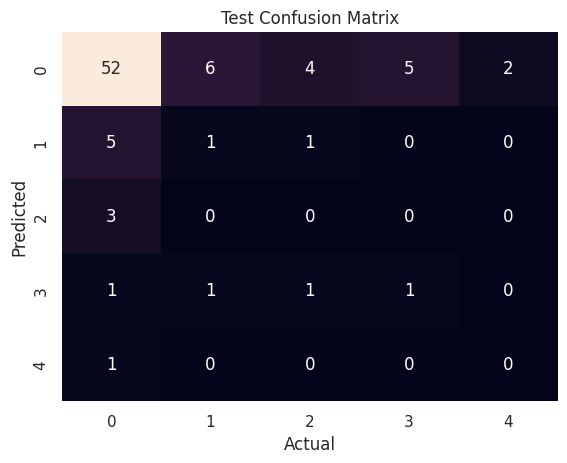

Classification report
              precision    recall  f1-score   support

           0       0.75      0.84      0.79        62
           1       0.14      0.12      0.13         8
           2       0.00      0.00      0.00         6
           3       0.25      0.17      0.20         6
           4       0.00      0.00      0.00         2

    accuracy                           0.64        84
   macro avg       0.23      0.23      0.23        84
weighted avg       0.59      0.64      0.61        84



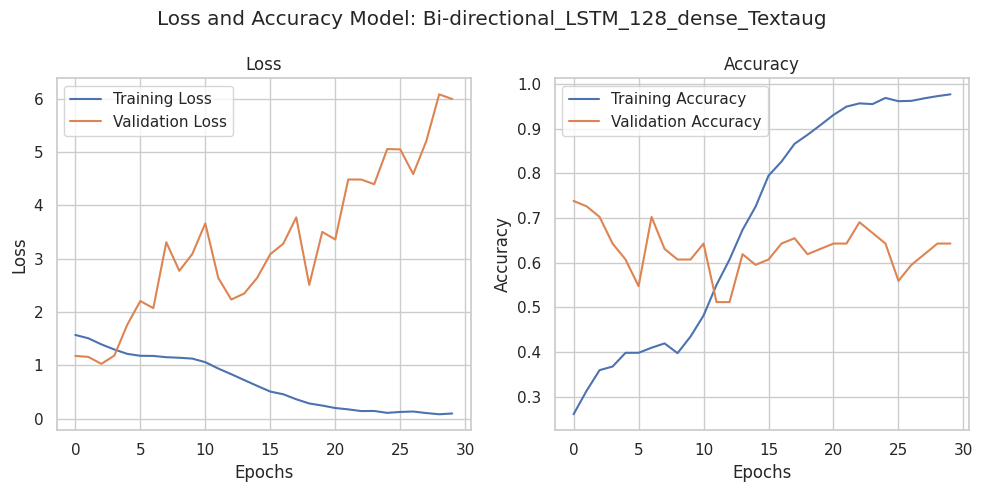

In [ ]:
result=function_model("Bi-directional_LSTM_128_dense_Textaug",model_bi_lstm, history_bi_lstm, X_train,y_train,X_test,y_test)
lstm_model_summary=lstm_model_summary.append(result)
lstm_model_summary.reset_index(drop=True, inplace=True)

### Lets try Bidirectional LSTM 256 with dense layers text augmentation

In [ ]:
#preparing model_bi_lstm256

tf.keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model_bi_lstm256 = tf.keras.Sequential()

model_bi_lstm256.add(tf.keras.layers.Embedding(desired_vocab_size + 1, #Vocablury size
                  embedding_vector_length, #Embedding size
                  #weights=[embedding_matrix], #Embeddings taken from pre-trained model_bi_lstm256
                  #trainable=False, #As embeddings are already available, we will not train this layer. It will act as lookup layer.
                  input_length=max_review_length) #Number of words in each review
      )

model_bi_lstm256.add(tf.keras.layers.Dropout(0.3))

model_bi_lstm256.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256)))
#model_bi_lstm256.add(tf.keras.layers.LSTM(256, return_sequences=True)) #RNN State - size of cell state and hidden state
model_bi_lstm256.add(tf.keras.layers.Dropout(0.3))


#model_bi_lstm256.add(tf.keras.layers.Dense(256, activation='relu'))
#model_bi_lstm256.add(tf.keras.layers.Dropout(0.3))

#model_bi_lstm256.add(tf.keras.layers.Dense(128, activation='relu'))
#model_bi_lstm256.add(tf.keras.layers.Dropout(0.5))
#model_bi_lstm256.add(tf.keras.layers.BatchNormalization())

model_bi_lstm256.add(tf.keras.layers.Dense(64, activation='relu'))
model_bi_lstm256.add(tf.keras.layers.Dropout(0.3))
#model_bi_lstm256.add(tf.keras.layers.BatchNormalization())

model_bi_lstm256.add(tf.keras.layers.Dense(32, activation='relu'))
model_bi_lstm256.add(tf.keras.layers.Dropout(0.3))
#model_bi_lstm256.add(tf.keras.layers.BatchNormalization())

model_bi_lstm256.add(tf.keras.layers.Dense(16, activation='relu'))
model_bi_lstm256.add(tf.keras.layers.Dropout(0.3))
#model_bi_lstm256.add(tf.keras.layers.BatchNormalization())

model_bi_lstm256.add(tf.keras.layers.Dense(5, activation='softmax')) #output


#model_bi_lstm256 summary
model_bi_lstm256.summary()


#Compile the model_bi_lstm256
model_bi_lstm256.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history_bi_lstm_256=model_bi_lstm256.fit(X_train,y_train, validation_data=(X_test,y_test),
            epochs=60,
            batch_size=32,
            verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 215, 200)          2000200   
                                                                 
 dropout (Dropout)           (None, 215, 200)          0         
                                                                 
 bidirectional (Bidirection  (None, 512)               935936    
 al)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense (Dense)               (None, 64)                32832     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                        

Model:  Bi-directional_LSTM_256_Textaug
3/3 [==============================] - 1s 22ms/step
Train Accuracy score:  0.9741309881210327
Test Accuracy score:  0.5357142686843872


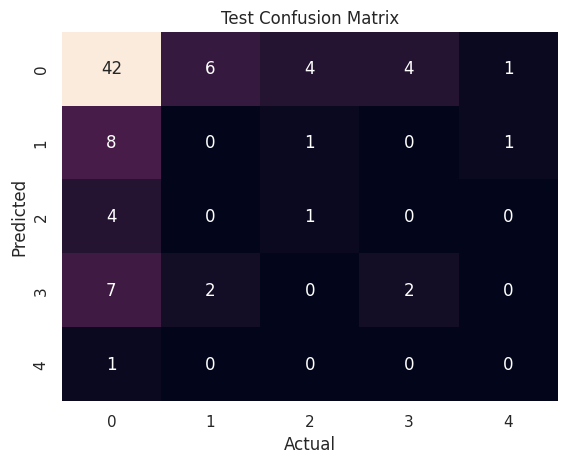

Classification report
              precision    recall  f1-score   support

           0       0.74      0.68      0.71        62
           1       0.00      0.00      0.00         8
           2       0.20      0.17      0.18         6
           3       0.18      0.33      0.24         6
           4       0.00      0.00      0.00         2

    accuracy                           0.54        84
   macro avg       0.22      0.24      0.22        84
weighted avg       0.57      0.54      0.55        84



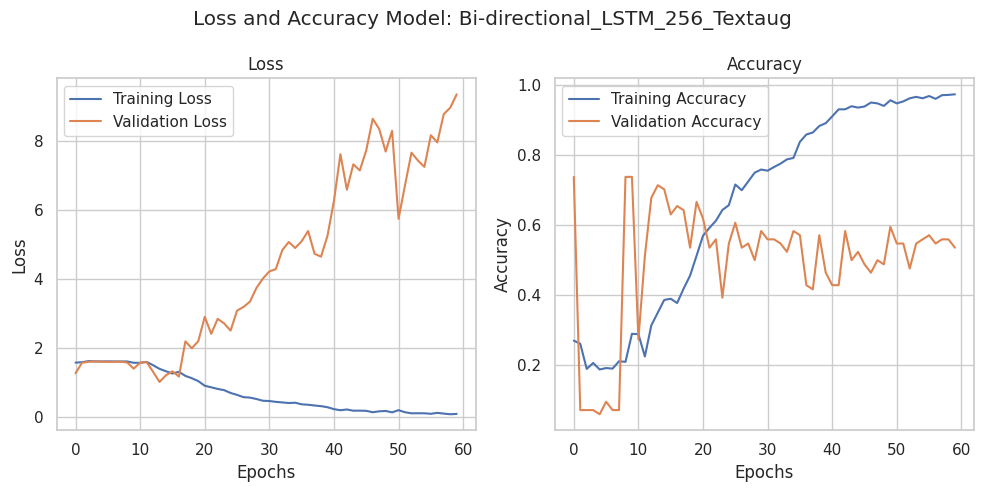

In [ ]:
result=function_model("Bi-directional_LSTM_256_Textaug",model_bi_lstm256, history_bi_lstm_256, X_train,y_train,X_test,y_test)
lstm_model_summary=lstm_model_summary.append(result)
lstm_model_summary.reset_index(drop=True, inplace=True)

In [ ]:
lstm_model_summary

Model  Train Accuracy  \
0                                            LSTM_128            0.93   
1                                            LSTM_128            0.99   
2                                            LSTM_256            1.00   
3                                   LSTM_128_droupout            0.98   
4                                   LSTM_256_droupout            0.99   
5                             LSTM_256_droupout_dense            0.82   
6                     LSTM_256_droupout_dense_dropout            0.81   
7                  LSTM_256_droupout_dense_dropout_BN            0.74   
8                                         stackedLSTM            0.74   
9                                 Bi-directional_LSTM            0.74   
10           Bi-directional_LSTM_early_stop_reducedLR            0.74   
11  Bi-directional_LSTM_ea_reducedLR_no_embeeding_...            0.74   
12                      SMOTE_ANN_5_Layers_BN_dropout            0.42   
13     Smote_Bi-directional_LSTM_early_stop_reducedLR            0.21   
14                     Bi-directional_LSTM_64_Textaug            1.00   
15              Bi-directional_LSTM_128_dense_Textaug            0.98   
16                    Bi-directional_LSTM_256_Textaug            0.97   

    Test Accuracy  Precision  recall  f1 score  
0            0.58       0.57    0.58      0.57  
1            0.60       0.57    0.60      0.58  
2            0.63       0.55    0.63      0.59  
3            0.58       0.53    0.58      0.56  
4            0.55       0.52    0.55      0.53  
5            0.51       0.55    0.51      0.53  
6            0.68       0.56    0.68      0.61  
7            0.74       0.54    0.74      0.63  
8            0.74       0.54    0.74      0.63  
9            0.74       0.54    0.74      0.63  
10           0.74       0.54    0.74      0.63  
11           0.74       0.54    0.74      0.63  
12           0.45       0.54    0.45      0.49  
13           0.02       0.00    0.02      0.00  
14           0.69       0.70    0.69      0.66  
15           0.64       0.59    0.64      0.61  
16           0.54       0.57    0.54      0.55

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
#preparing model_bi_lstm32

tf.keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model_bi_lstm32 = tf.keras.Sequential()

model_bi_lstm32.add(tf.keras.layers.Embedding(desired_vocab_size + 1, #Vocablury size
                  embedding_vector_length, #Embedding size
                  #weights=[embedding_matrix], #Embeddings taken from pre-trained model_bi_lstm32
                  #trainable=False, #As embeddings are already available, we will not train this layer. It will act as lookup layer.
                  input_length=max_review_length) #Number of words in each review
      )

model_bi_lstm32.add(tf.keras.layers.Dropout(0.4))

model_bi_lstm32.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)))
#model_bi_lstm32.add(tf.keras.layers.LSTM(256, return_sequences=True)) #RNN State - size of cell state and hidden state
model_bi_lstm32.add(tf.keras.layers.Dropout(0.4))


#model_bi_lstm32.add(tf.keras.layers.Dense(256, activation='relu'))
#model_bi_lstm32.add(tf.keras.layers.Dropout(0.3))

#model_bi_lstm32.add(tf.keras.layers.Dense(128, activation='relu'))
#model_bi_lstm32.add(tf.keras.layers.Dropout(0.5))
#model_bi_lstm32.add(tf.keras.layers.BatchNormalization())

#model_bi_lstm32.add(tf.keras.layers.Dense(64, activation='relu'))
#model_bi_lstm32.add(tf.keras.layers.Dropout(0.3))
#model_bi_lstm32.add(tf.keras.layers.BatchNormalization())

model_bi_lstm32.add(tf.keras.layers.Dense(32, activation='relu'))
model_bi_lstm32.add(tf.keras.layers.Dropout(0.4))
model_bi_lstm32.add(tf.keras.layers.BatchNormalization())

model_bi_lstm32.add(tf.keras.layers.Dense(16, activation='relu'))
model_bi_lstm32.add(tf.keras.layers.Dropout(0.4))
model_bi_lstm32.add(tf.keras.layers.BatchNormalization())

model_bi_lstm32.add(tf.keras.layers.Dense(5, activation='softmax')) #output


#model_bi_lstm32 summary
model_bi_lstm32.summary()


#Compile the model_bi_lstm32
model_bi_lstm32.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Define model checkpoint callback to save the best model weights
checkpoint = ModelCheckpoint(filepath='model_bi_lstm32_best_weights.h5',
                             monitor='val_accuracy',
                             save_best_only=True,
                             save_weights_only=True,
                             mode='max',
                             verbose=1)


history_bi_lstm32=model_bi_lstm32.fit(X_train,y_train, validation_data=(X_test,y_test),
            epochs=25,
            batch_size=16,
           # callbacks=[early_stopping, checkpoint],
            verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 215, 200)          2000200   
                                                                 
 dropout (Dropout)           (None, 215, 200)          0         
                                                                 
 bidirectional (Bidirection  (None, 64)                59648     
 al)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                        

Model:  Bi-directional_LSTM_32_no_embeeding_weight


3/3 [==============================] - 1s 12ms/step
Train Accuracy score:  0.7219078540802002
Test Accuracy score:  0.6666666865348816


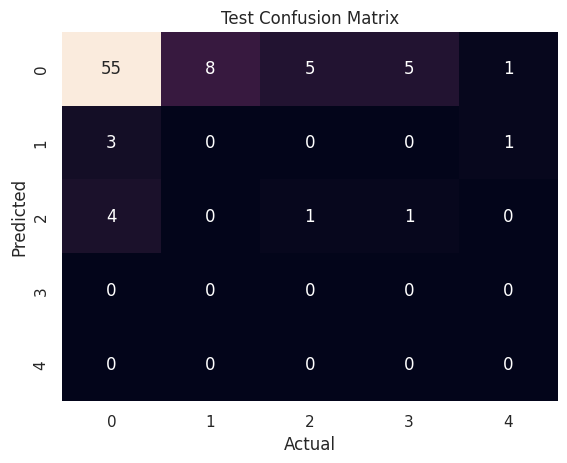

Classification report
              precision    recall  f1-score   support

           0       0.74      0.89      0.81        62
           1       0.00      0.00      0.00         8
           2       0.17      0.17      0.17         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.67        84
   macro avg       0.18      0.21      0.20        84
weighted avg       0.56      0.67      0.61        84



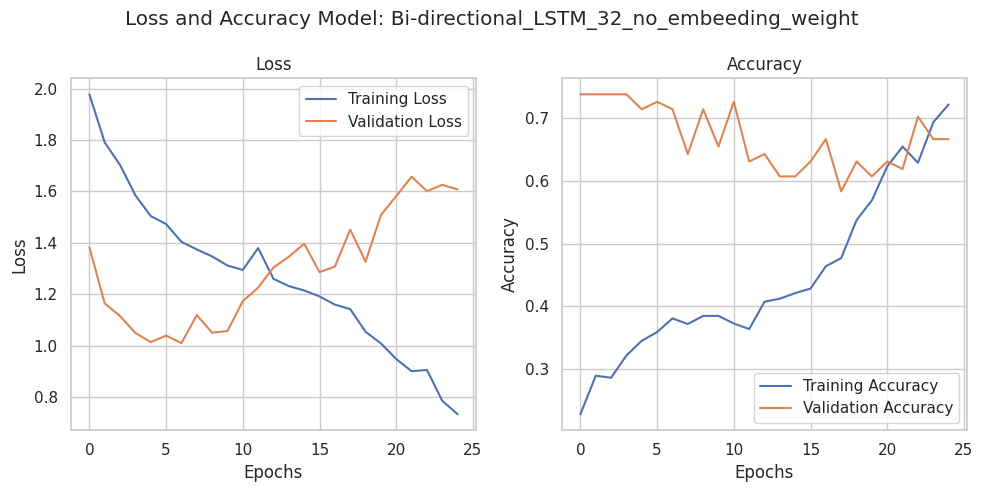

Model  Train Accuracy  Test Accuracy  \
0  Bi-directional_LSTM_32_no_embeeding_weight            0.72           0.67   

   Precision  recall  f1 score  
0       0.56    0.67      0.61

In [ ]:
function_model("Bi-directional_LSTM_32_no_embeeding_weight",model_bi_lstm32, history_bi_lstm32,X_train,y_train,X_test,y_test)

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Embedding(desired_vocab_size + 1, embedding_vector_length, input_length=max_review_length),  # Removed embedding_matrix argument (Optional: see previous explanation for pre-trained embeddings)
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(32, activation='relu'),  # Adjust for number of accident levels
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(16, activation='relu'),  # Adjust for number of accident levels
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(5, activation='softmax')  # Adjust for number of accident levels
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=30, batch_size=16, validation_data=(X_test, y_test), verbose=1)  # Include validation data

Epoch 1/30
78/78 [==============================] - 19s 144ms/step - loss: 1.5371 - accuracy: 0.2975 - val_loss: 1.3383 - val_accuracy: 0.7262
Epoch 2/30
78/78 [==============================] - 8s 96ms/step - loss: 1.4057 - accuracy: 0.3403 - val_loss: 1.0534 - val_accuracy: 0.7262
Epoch 3/30
78/78 [==============================] - 7s 94ms/step - loss: 1.2823 - accuracy: 0.3783 - val_loss: 1.2967 - val_accuracy: 0.6786
Epoch 4/30
78/78 [==============================] - 5s 64ms/step - loss: 1.2354 - accuracy: 0.3654 - val_loss: 1.5681 - val_accuracy: 0.6905
Epoch 5/30
78/78 [==============================] - 5s 61ms/step - loss: 1.1808 - accuracy: 0.4018 - val_loss: 2.3003 - val_accuracy: 0.6310
Epoch 6/30
78/78 [==============================] - 5s 64ms/step - loss: 1.1305 - accuracy: 0.4422 - val_loss: 3.0434 - val_accuracy: 0.7143
Epoch 7/30
78/78 [==============================] - 4s 46ms/step - loss: 0.9946 - accuracy: 0.5271 - val_loss: 2.1801 - val_accuracy: 0.6905
Epoch 8/30


## Step 3: Choose the best performing classifier and pickle it

We tried various model and found that Model: **Bi-directional_LSTM_early_stop_reducedLR**	 seems to be performing well on original data in terms of precision and recall.



In [ ]:
#saving the model as best model
%cp './saved_models/Bi-directional_LSTM_early_stop_reducedLR.h5' './best_model.h5'

**Note**: We are already saving all the models, so copying the model as best_model.h5